In [1]:
import numpy as np
import h5py

import sys
sys.path.append('../')
from copy import deepcopy
import Analysis


def LoadModel(basedir, galprop_tag):
    # Load various diffuse models and run fits.
    print 'Running Analysis for model', galprop_tag
    
    
    #A = Analysis.Analysis(tag='P8R2_PSF3_CLEAN_V6_calore', basepath='/data/GCE_sys/')
    A = Analysis.Analysis(tag='P8R2_CLEAN_V6_calore', basepath='/data/GCE_sys/')
    
    A.GenSquareMask(l_range=[-40.,40.], b_range=[-40.,40.], plane_mask=2.)
    A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')
    # Load 2FGL 
    A.AddPointSourceTemplate(fixNorm=True,pscmap='PSC_' + A.tag + '_fgl3_with_ext.npy')
    A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_' + A.tag + '_fgl3_with_ext.npy',
                        alpha_psc=5., f_psc=0.1)
    
    A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False, isofile='IGRB_ackerman_2014_modA.dat') # External chi^2 used to fix normalization within uncertainties
    
    A.AddFermiBubbleTemplate(template_file='bubble_templates_diskcut30.0.fits', 
                         spec_file='reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False, fixNorm=False)
    
    
    
    A.AddHDF5Template(hdf5file=basedir +'/'+ galprop_tag+'.hdf5',verbosity=1, multiplier=1., bremsfrac=1.25, 
                  E_subsample=2, fixSpectrum=False, separate_ics=False)
    return A


A = LoadModel('/data/GCE_sys/new/','mod_s_42_XCO_P8_corrected')
A2 = LoadModel('/data/GCE_sys/new/','mod_s_46_XCO_P8_corrected')
A3 = LoadModel('/data/GCE_sys/new/','mod_s_46_XCO_P8_corrected')
A4 = LoadModel('/data/GCE_sys/new/','mod_s_47_XCO_P8_corrected')


Running Analysis for model mod_s_42_XCO_P8_corrected
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
Running Analysis for model mod_s_46_XCO_P8_corrected
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
Running Analysis for model mod_s_46_XCO_P8_corrected
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
Running Analysis for model mod_s_47_XCO_P8_corrected
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...


In [2]:

# Restore back to normal mask
A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.05, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]


A2.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=.65, 
              r_s=20.0, axesratio=1.9, offset=(0., 0.), spec_file=None,size=25)

print 'DM generated'
A2.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A2.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]



A3.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.05, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A3.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A3.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]


A4.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=.65, 
              r_s=20.0, axesratio=2.6, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A4.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A4.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]



# AddFitMetadata(basedir +'/'+ galprop_tag+'.hdf5', h5_path='/fit_results/bubbles_split/', A=A)

DM generated
Masking completed in 1.4514e-01 s
Write likelihood tempfile to  /tmp/tmpWzSf7S
Code generation completed in 1.1420e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -602483.42542 
 TOTAL NCALL = 159 
 NCALLS = 159 
 
 
 EDM = 2.39242819333e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 9.712367e-01 
 9.659596e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.026549e+00 
 7.255772e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.077451e+00 
 1.113674e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.250972e-01 
 1.990576e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 6.258844e-01 
 1.639747e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 9.712e-01 & 9.660e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.027e+00 & 7.256e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.077e+00 & 1.114e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.251e-01 & 1.991e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 6.259e-01 & 1.640e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.01e-01 s
Masking completed in 1.4466e-01 s
Write likelihood tempfile to  /tmp/tmpSmugP5
Code generation completed in 1.0691e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -476096.157605 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 0.000130252163444 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.006470e+00 
 1.133984e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.050652e+00 
 7.743557e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.088422e+00 
 1.185801e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.171408e-01 
 2.100482e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 5.682991e-01 
 1.578375e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.006e+00 & 1.134e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.051e+00 & 7.744e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.088e+00 & 1.186e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.171e-01 & 2.100e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 5.683e-01 & 1.578e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.75e-01 s
Masking completed in 1.4495e-01 s
Write likelihood tempfile to  /tmp/tmpPjwQ4_
Code generation completed in 1.0450e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -373795.629248 
 TOTAL NCALL = 159 
 NCALLS = 159 
 
 
 EDM = 1.47014013903e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.041044e+00 
 1.236107e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.073499e+00 
 8.424744e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 8.865507e-01 
 1.242326e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.671800e-01 
 2.273071e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 7.105344e-01 
 1.548504e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.041e+00 & 1.236e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.073e+00 & 8.425e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 8.866e-01 & 1.242e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.672e-01 & 2.273e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 7.105e-01 & 1.549e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.86e-01 s
Masking completed in 1.4457e-01 s
Write likelihood tempfile to  /tmp/tmp28nK5P
Code generation completed in 1.0440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -286058.414053 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 0.00421430623641 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.083873e+00 
 1.208757e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.079642e+00 
 9.026824e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 8.977283e-01 
 1.263359e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.385088e-01 
 2.391241e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 7.943565e-01 
 1.579935e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.084e+00 & 1.209e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.080e+00 & 9.027e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 8.977e-01 & 1.263e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.385e-01 & 2.391e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 7.944e-01 & 1.580e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.4448e-01 s
Write likelihood tempfile to  /tmp/tmpsrRv14
Code generation completed in 1.0381e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -275833.072356 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 0.00102366696645 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 1.088628e+00 
 1.328770e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.070938e+00 
 9.046772e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 9.141771e-01 
 1.190502e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 8.842430e-01 
 2.359845e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 5.891702e-01 
 1.445979e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 1.089e+00 & 1.329e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.071e+00 & 9.047e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 9.142e-01 & 1.191e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 8.842e-01 & 2.360e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 5.892e-01 & 1.446e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.4433e-01 s
Write likelihood tempfile to  /tmp/tmp6Lry4c
Code generation completed in 1.0531e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -273997.743038 
 TOTAL NCALL = 161 
 NCALLS = 161 
 
 
 EDM = 1.22894836582e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 1.119208e+00 
 9.079485e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.129899e+00 
 9.200440e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 8.837622e-01 
 1.084849e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.104944e-01 
 2.355803e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 5.235267e-01 
 1.306368e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 1.119e+00 & 9.079e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.130e+00 & 9.200e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 8.838e-01 & 1.085e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.105e-01 & 2.356e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 5.235e-01 & 1.306e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.89e-01 s
Masking completed in 1.4475e-01 s
Write likelihood tempfile to  /tmp/tmpPADO7e
Code generation completed in 1.0440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -263471.831272 
 TOTAL NCALL = 158 
 NCALLS = 158 
 
 
 EDM = 4.16216743926e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.149916e+00 
 1.047633e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.113197e+00 
 8.999581e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 8.669471e-01 
 9.721525e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 7.928142e-01 
 2.246491e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 6.042919e-01 
 1.216945e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.150e+00 & 1.048e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.113e+00 & 9.000e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 8.669e-01 & 9.722e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 7.928e-01 & 2.246e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 6.043e-01 & 1.217e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.85e-01 s
Masking completed in 1.4425e-01 s
Write likelihood tempfile to  /tmp/tmpqbUNmX
Code generation completed in 1.0691e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -244998.342021 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.0043656465027 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.151747e+00 
 8.464166e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.147679e+00 
 9.302974e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 9.140075e-01 
 9.559197e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.422528e-01 
 2.304793e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 7.266040e-01 
 1.130305e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.152e+00 & 8.464e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.148e+00 & 9.303e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 9.140e-01 & 9.559e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.423e-01 & 2.305e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 7.266e-01 & 1.130e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.4454e-01 s
Write likelihood tempfile to  /tmp/tmpEBkNLu
Code generation completed in 1.0378e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -230397.41495 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.00232400065964 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 1.182570e+00 
 8.770628e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.105693e+00 
 9.218438e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 7.746249e-01 
 9.593156e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.014301e-01 
 2.248836e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 6.503533e-01 
 1.095477e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 1.183e+00 & 8.771e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.106e+00 & 9.218e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 7.746e-01 & 9.593e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.014e-01 & 2.249e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 6.504e-01 & 1.095e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.4472e-01 s
Write likelihood tempfile to  /tmp/tmpMpjT4c
Code generation completed in 1.0469e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -206672.07534 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.00162391949876 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.189668e+00 
 8.246388e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.134943e+00 
 9.600075e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.407180e-01 
 9.648978e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.704912e-01 
 2.307060e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 6.345846e-01 
 1.108628e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.190e+00 & 8.246e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.135e+00 & 9.600e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.407e-01 & 9.649e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.705e-01 & 2.307e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 6.346e-01 & 1.109e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4456e-01 s
Write likelihood tempfile to  /tmp/tmpvz_tIO
Code generation completed in 1.0872e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188815.78104 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 5.307380171e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 1.195704e+00 
 6.467401e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.118689e+00 
 9.654396e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 9.603526e-01 
 1.015614e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.117274e-01 
 2.261758e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 5.587220e-01 
 1.026444e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 1.196e+00 & 6.467e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.119e+00 & 9.654e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 9.604e-01 & 1.016e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.117e-01 & 2.262e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 5.587e-01 & 1.026e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.4415e-01 s
Write likelihood tempfile to  /tmp/tmpZwgLsd
Code generation completed in 1.0519e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -155145.68379 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.00271942754683 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 1.235200e+00 
 6.144966e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.120403e+00 
 1.017970e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 9.793687e-01 
 1.068573e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 6.963023e-01 
 2.327002e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.164304e-01 
 1.032908e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 1.235e+00 & 6.145e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.120e+00 & 1.018e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 9.794e-01 & 1.069e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 6.963e-01 & 2.327e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.164e-01 & 1.033e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.46e-01 s
Masking completed in 1.4495e-01 s
Write likelihood tempfile to  /tmp/tmpyK6_Z1
Code generation completed in 1.0490e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -122773.218911 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00347387878443 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 1.216668e+00 
 6.386555e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.144461e+00 
 1.089613e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.459795e-01 
 1.146165e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 6.437358e-01 
 2.388541e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 7.984961e-01 
 9.530175e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 1.217e+00 & 6.387e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.144e+00 & 1.090e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.460e-01 & 1.146e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 6.437e-01 & 2.389e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 7.985e-01 & 9.530e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.4444e-01 s
Write likelihood tempfile to  /tmp/tmpy_fjJE
Code generation completed in 1.0569e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -89059.9786048 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00658763961076 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.227813e+00 
 5.794164e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.100790e+00 
 1.158519e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 8.118908e-01 
 1.206767e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 6.548778e-01 
 2.415121e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 6.674662e-01 
 9.178709e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.228e+00 & 5.794e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.101e+00 & 1.159e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 8.119e-01 & 1.207e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 6.549e-01 & 2.415e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 6.675e-01 & 9.179e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.4478e-01 s
Write likelihood tempfile to  /tmp/tmp5cmQLl
Code generation completed in 1.0810e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -61115.3516382 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000821726417798 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.258265e+00 
 6.319409e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.164051e+00 
 1.294684e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 8.052091e-01 
 1.094429e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.216211e-01 
 2.496310e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 5.575326e-01 
 8.171847e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.258e+00 & 6.319e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.164e+00 & 1.295e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 8.052e-01 & 1.094e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.216e-01 & 2.496e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 5.575e-01 & 8.172e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4481e-01 s
Write likelihood tempfile to  /tmp/tmpsrNprh
Code generation completed in 1.0900e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -32916.3843325 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.00725213737864 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 1.259441e+00 
 5.885711e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.150340e+00 
 1.493288e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 8.563955e-01 
 1.056654e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 6.481971e-01 
 2.666211e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 5.212894e-01 
 7.906299e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 1.259e+00 & 5.886e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.150e+00 & 1.493e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 8.564e-01 & 1.057e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 6.482e-01 & 2.666e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 5.213e-01 & 7.906e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.47e-01 s
Masking completed in 1.4450e-01 s
Write likelihood tempfile to  /tmp/tmpOB3JfB
Code generation completed in 1.6905e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10207.4096487 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.002057688096 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 1.264857e+00 
 5.868689e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.185175e+00 
 1.789701e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 8.624781e-01 
 1.226579e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 6.287942e-01 
 2.928578e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 6.387925e-01 
 8.775804e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 1.265e+00 & 5.869e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.185e+00 & 1.790e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 8.625e-01 & 1.227e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 6.288e-01 & 2.929e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 6.388e-01 & 8.776e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.97e-01 s
Masking completed in 1.4575e-01 s
Write likelihood tempfile to  /tmp/tmp3xRhVT
Code generation completed in 1.0250e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7662.86798071 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00698151042466 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 1.283264e+00 
 6.873529e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.224535e+00 
 2.184570e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.139614e-01 
 1.450935e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 6.178987e-01 
 3.269213e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 7.249136e-01 
 8.981761e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 1.283e+00 & 6.874e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.225e+00 & 2.185e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.140e-01 & 1.451e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 6.179e-01 & 3.269e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 7.249e-01 & 8.982e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.44e-01 s
Masking completed in 1.4490e-01 s
Write likelihood tempfile to  /tmp/tmpgj4Q5u
Code generation completed in 1.0622e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17775.8262765 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000826628502618 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 1.310835e+00 
 9.344403e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.269228e+00 
 2.740826e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.409000e-01 
 1.482894e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.245670e-01 
 3.645275e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.894989e-01 
 7.767187e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 1.311e+00 & 9.344e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.269e+00 & 2.741e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.409e-01 & 1.483e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.246e-01 & 3.645e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.895e-01 & 7.767e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.57e-01 s
Masking completed in 1.4445e-01 s
Write likelihood tempfile to  /tmp/tmpmoLgwe
Code generation completed in 1.0200e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 21439.0563348 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000746161129862 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.267852e+00 
 8.785340e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.279143e+00 
 3.558172e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.856473e-01 
 1.298750e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 5.389156e-01 
 4.163542e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 6.108150e-01 
 6.975046e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.268e+00 & 8.785e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.279e+00 & 3.558e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.856e-01 & 1.299e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 5.389e-01 & 4.164e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 6.108e-01 & 6.975e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.45e-01 s
Masking completed in 1.4446e-01 s
Write likelihood tempfile to  /tmp/tmpXBqDWx
Code generation completed in 1.0140e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20555.0230828 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 1.07411763618e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 1.316675e+00 
 1.732279e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.244821e+00 
 5.057691e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.081944e-01 
 1.263491e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 7.534151e-01 
 5.200338e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.345793e-01 
 7.164067e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 1.317e+00 & 1.732e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.245e+00 & 5.058e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.082e-01 & 1.263e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 7.534e-01 & 5.200e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.346e-01 & 7.164e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.42e-01 s
Masking completed in 1.4500e-01 s
Write likelihood tempfile to  /tmp/tmphHrCoy
Code generation completed in 1.0250e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16557.3506264 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00129115986157 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 1.279036e+00 
 1.510611e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.231620e+00 
 7.289398e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.683011e-01 
 1.196544e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 7.027986e-01 
 6.634050e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 8.402186e-01 
 7.496271e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 1.279e+00 & 1.511e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.232e+00 & 7.289e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.683e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 7.028e-01 & 6.634e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 8.402e-01 & 7.496e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.45e-01 s
Masking completed in 1.4477e-01 s
Write likelihood tempfile to  /tmp/tmp0Vzpfj
Code generation completed in 1.0509e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10282.4082549 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 0.000662645441458 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.147042e+00 
 2.038932e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.767425e+00 
 1.393167e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.097285e-01 
 1.239357e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 6.863709e-01 
 1.135178e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.344551e-01 
 7.711638e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.147e+00 & 2.039e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.767e+00 & 1.393e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.097e-01 & 1.239e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 6.864e-01 & 1.135e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.345e-01 & 7.712e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.42e-01 s
Masking completed in 1.4496e-01 s
Write likelihood tempfile to  /tmp/tmpPCXwwK
Code generation completed in 1.0569e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3839.1088283 
 TOTAL NCALL = 117 
 NCALLS = 117 
 
 
 EDM = 3.44478265394e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 1.041276e+00 
 4.395253e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 2.064267e+00 
 3.731578e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.076557e-01 
 2.208208e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.393859e+00 
 3.375843e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.445529e-01 
 1.321642e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 1.041e+00 & 4.395e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 2.064e+00 & 3.732e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.077e-01 & 2.208e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.394e+00 & 3.376e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.446e-01 & 1.322e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.40e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 9.712367e-01 
 9.659575e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.026549e+00 
 7.255765e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.077451e+00 
 1.113671e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.250972e-01 
 1.990572e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 6.258844e-01 
 1.639742e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 9.712e-01 & 9.660e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.027e+00 & 7.256e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.077e+00 & 1.114e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.251e-01 & 1.991e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 6.259e-01 & 1.640e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.16
 
 
 
 0.27
 
 
 
 -0.63
 
 
 
 -0.49
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.62
 
 
 
 -0.07
 
 
 
 
 
 Isotropic_0 
 
 
 0.27
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.66
 
 
 
 -0.78
 
 
 
 
 
 ICS_0 
 
 
 -0.63
 
 
 
 -0.62
 
 
 
 -0.66
 
 
 
 1.00
 
 
 
 0.46
 
 
 
 
 
 Bubbles_0 
 
 
 -0.49
 
 
 
 -0.07
 
 
 
 -0.78
 
 
 
 0.46
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{208,187,152} -0.49\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{170,244,181} -0.07\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{235,147,132} -0.78\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{205,191,154} 0.46\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{205,191,154} 0.46 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.006470e+00 
 1.133995e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.050652e+00 
 7.743605e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.088422e+00 
 1.185823e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.171408e-01 
 2.100519e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 5.682991e-01 
 1.578398e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.006e+00 & 1.134e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.051e+00 & 7.744e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.088e+00 & 1.186e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.171e-01 & 2.101e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 5.683e-01 & 1.578e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.27
 
 
 
 -0.63
 
 
 
 -0.47
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.63
 
 
 
 -0.07
 
 
 
 
 
 Isotropic_1 
 
 
 0.27
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.65
 
 
 
 -0.77
 
 
 
 
 
 ICS_1 
 
 
 -0.63
 
 
 
 -0.63
 
 
 
 -0.65
 
 
 
 1.00
 
 
 
 0.44
 
 
 
 
 
 Bubbles_1 
 
 
 -0.47
 
 
 
 -0.07
 
 
 
 -0.77
 
 
 
 0.44
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{187,218,168} 0.27 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{206,189,153} -0.47\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{170,244,181} -0.07\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{187,218,168} 0.27 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{223,164,141} -0.65 & \cellcolor[RGB]{234,148,133} -0.77\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{223,164,141} -0.65 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{206,189,153} -0.47 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.041044e+00 
 1.236112e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.073499e+00 
 8.424760e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 8.865507e-01 
 1.242334e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.671800e-01 
 2.273085e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 7.105344e-01 
 1.548513e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.041e+00 & 1.236e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.073e+00 & 8.425e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 8.866e-01 & 1.242e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.672e-01 & 2.273e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 7.105e-01 & 1.549e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.25
 
 
 
 -0.62
 
 
 
 -0.46
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.63
 
 
 
 -0.07
 
 
 
 
 
 Isotropic_2 
 
 
 0.25
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.64
 
 
 
 -0.76
 
 
 
 
 
 ICS_2 
 
 
 -0.62
 
 
 
 -0.63
 
 
 
 -0.64
 
 
 
 1.00
 
 
 
 0.41
 
 
 
 
 
 Bubbles_2 
 
 
 -0.46
 
 
 
 -0.07
 
 
 
 -0.76
 
 
 
 0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{186,219,169} 0.25 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{205,192,155} -0.46\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{186,219,169} 0.25 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{233,150,134} -0.76\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} 0.41\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{205,192,155} -0.46 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{201,197,157} 0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.083873e+00 
 1.208760e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.079642e+00 
 9.026811e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 8.977283e-01 
 1.263329e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.385088e-01 
 2.391221e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 7.943565e-01 
 1.579908e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.084e+00 & 1.209e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.080e+00 & 9.027e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 8.977e-01 & 1.263e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.385e-01 & 2.391e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 7.944e-01 & 1.580e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.22
 
 
 
 -0.61
 
 
 
 -0.43
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 -0.64
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_3 
 
 
 0.22
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 -0.62
 
 
 
 -0.73
 
 
 
 
 
 ICS_3 
 
 
 -0.61
 
 
 
 -0.64
 
 
 
 -0.62
 
 
 
 1.00
 
 
 
 0.37
 
 
 
 
 
 Bubbles_3 
 
 
 -0.43
 
 
 
 -0.05
 
 
 
 -0.73
 
 
 
 0.37
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,235,177} 0.14 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{203,195,156} -0.43\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{175,235,177} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{230,154,136} -0.73\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,203,160} 0.37\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{197,203,160} 0.37 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 1.088628e+00 
 1.328775e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.070938e+00 
 9.046771e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 9.141771e-01 
 1.190486e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 8.842430e-01 
 2.359839e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 5.891702e-01 
 1.445966e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 1.089e+00 & 1.329e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.071e+00 & 9.047e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 9.142e-01 & 1.190e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 8.842e-01 & 2.360e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 5.892e-01 & 1.446e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.13
 
 
 
 0.21
 
 
 
 -0.60
 
 
 
 -0.42
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 -0.64
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_4 
 
 
 0.21
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 -0.60
 
 
 
 -0.71
 
 
 
 
 
 ICS_4 
 
 
 -0.60
 
 
 
 -0.64
 
 
 
 -0.60
 
 
 
 1.00
 
 
 
 0.34
 
 
 
 
 
 Bubbles_4 
 
 
 -0.42
 
 
 
 -0.04
 
 
 
 -0.71
 
 
 
 0.34
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{201,197,157} -0.42\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{228,157,137} -0.71\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} 0.34\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{194,208,163} 0.34 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 1.119208e+00 
 9.079519e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.129899e+00 
 9.200459e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 8.837622e-01 
 1.084855e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.104944e-01 
 2.355817e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 5.235267e-01 
 1.306374e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 1.119e+00 & 9.080e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.130e+00 & 9.200e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 8.838e-01 & 1.085e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.105e-01 & 2.356e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 5.235e-01 & 1.306e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.11
 
 
 
 0.20
 
 
 
 -0.59
 
 
 
 -0.41
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.11
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 -0.65
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_5 
 
 
 0.20
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 -0.57
 
 
 
 -0.68
 
 
 
 
 
 ICS_5 
 
 
 -0.59
 
 
 
 -0.65
 
 
 
 -0.57
 
 
 
 1.00
 
 
 
 0.29
 
 
 
 
 
 Bubbles_5 
 
 
 -0.41
 
 
 
 -0.03
 
 
 
 -0.68
 
 
 
 0.29
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{200,198,158} -0.41\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{165,250,184} -0.03\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{216,176,147} -0.57 & \cellcolor[RGB]{226,161,139} -0.68\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{216,176,147} -0.57 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} 0.29\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{200,198,158} -0.41 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.149916e+00 
 1.047636e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.113197e+00 
 8.999596e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 8.669471e-01 
 9.721561e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 7.928142e-01 
 2.246501e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 6.042919e-01 
 1.216949e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.150e+00 & 1.048e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.113e+00 & 9.000e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 8.669e-01 & 9.722e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 7.928e-01 & 2.247e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 6.043e-01 & 1.217e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.10
 
 
 
 0.17
 
 
 
 -0.59
 
 
 
 -0.39
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.10
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.65
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_6 
 
 
 0.17
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.64
 
 
 
 
 
 ICS_6 
 
 
 -0.59
 
 
 
 -0.65
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 0.23
 
 
 
 
 
 Bubbles_6 
 
 
 -0.39
 
 
 
 -0.01
 
 
 
 -0.64
 
 
 
 0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{217,174,146} -0.59 & \cellcolor[RGB]{199,201,159} -0.39\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{223,164,141} -0.65 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{212,180,149} -0.54 & \cellcolor[RGB]{222,166,142} -0.64\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{217,174,146} -0.59 & \cellcolor[RGB]{223,164,141} -0.65 & \cellcolor[RGB]{212,180,149} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} 0.23\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.151747e+00 
 8.464200e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.147679e+00 
 9.302960e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 9.140075e-01 
 9.559123e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.422528e-01 
 2.304787e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 7.266040e-01 
 1.130301e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.152e+00 & 8.464e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.148e+00 & 9.303e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 9.140e-01 & 9.559e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.423e-01 & 2.305e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 7.266e-01 & 1.130e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.09
 
 
 
 0.16
 
 
 
 -0.58
 
 
 
 -0.38
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.09
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.66
 
 
 
 0.00
 
 
 
 
 
 Isotropic_7 
 
 
 0.16
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.51
 
 
 
 -0.62
 
 
 
 
 
 ICS_7 
 
 
 -0.58
 
 
 
 -0.66
 
 
 
 -0.51
 
 
 
 1.00
 
 
 
 0.19
 
 
 
 
 
 Bubbles_7 
 
 
 -0.38
 
 
 
 0.00
 
 
 
 -0.62
 
 
 
 0.19
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{198,202,160} -0.38\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{220,170,143} -0.62\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,173} 0.19\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{220,170,143} -0.62 & \cellcolor[RGB]{181,227,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 1.182570e+00 
 8.770631e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.105693e+00 
 9.218425e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 7.746249e-01 
 9.593129e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.014301e-01 
 2.248832e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 6.503533e-01 
 1.095475e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 1.183e+00 & 8.771e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.106e+00 & 9.218e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 7.746e-01 & 9.593e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.014e-01 & 2.249e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 6.504e-01 & 1.095e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.07
 
 
 
 0.15
 
 
 
 -0.57
 
 
 
 -0.37
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.66
 
 
 
 0.02
 
 
 
 
 
 Isotropic_8 
 
 
 0.15
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.49
 
 
 
 -0.59
 
 
 
 
 
 ICS_8 
 
 
 -0.57
 
 
 
 -0.66
 
 
 
 -0.49
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 
 
 Bubbles_8 
 
 
 -0.37
 
 
 
 0.02
 
 
 
 -0.59
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{216,175,146} -0.57 & \cellcolor[RGB]{197,204,161} -0.37\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{164,252,185} 0.02\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{218,173,145} -0.59\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{216,175,146} -0.57 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} 0.16\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{177,233,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.189668e+00 
 8.246395e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.134943e+00 
 9.600063e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.407180e-01 
 9.648955e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.704912e-01 
 2.307057e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 6.345846e-01 
 1.108626e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.190e+00 & 8.246e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.135e+00 & 9.600e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.407e-01 & 9.649e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.705e-01 & 2.307e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 6.346e-01 & 1.109e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.07
 
 
 
 0.14
 
 
 
 -0.57
 
 
 
 -0.36
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.67
 
 
 
 0.02
 
 
 
 
 
 Isotropic_9 
 
 
 0.14
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.47
 
 
 
 -0.57
 
 
 
 
 
 ICS_9 
 
 
 -0.57
 
 
 
 -0.67
 
 
 
 -0.47
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_9 
 
 
 -0.36
 
 
 
 0.02
 
 
 
 -0.57
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{196,205,161} -0.36\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,238,178} 0.11 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{165,251,184} 0.02\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{173,238,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{215,176,147} -0.57\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} 0.12\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 1.195704e+00 
 6.467069e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.118689e+00 
 9.653094e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 9.603526e-01 
 1.013008e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.117274e-01 
 2.261989e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 5.587220e-01 
 1.025902e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 1.196e+00 & 6.467e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.119e+00 & 9.653e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 9.604e-01 & 1.013e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.117e-01 & 2.262e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 5.587e-01 & 1.026e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.05
 
 
 
 0.14
 
 
 
 -0.55
 
 
 
 -0.35
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.05
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.67
 
 
 
 0.03
 
 
 
 
 
 Isotropic_10 
 
 
 0.14
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.45
 
 
 
 -0.55
 
 
 
 
 
 ICS_10 
 
 
 -0.55
 
 
 
 -0.67
 
 
 
 -0.45
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_10 
 
 
 -0.35
 
 
 
 0.03
 
 
 
 -0.55
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{214,178,148} -0.55\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 1.235200e+00 
 6.144988e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.120403e+00 
 1.017972e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 9.793687e-01 
 1.068593e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 6.963023e-01 
 2.327026e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.164304e-01 
 1.032927e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 1.235e+00 & 6.145e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.120e+00 & 1.018e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 9.794e-01 & 1.069e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 6.963e-01 & 2.327e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.164e-01 & 1.033e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.04
 
 
 
 0.13
 
 
 
 -0.55
 
 
 
 -0.35
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.67
 
 
 
 0.04
 
 
 
 
 
 Isotropic_11 
 
 
 0.13
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 -0.53
 
 
 
 
 
 ICS_11 
 
 
 -0.55
 
 
 
 -0.67
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_11 
 
 
 -0.35
 
 
 
 0.04
 
 
 
 -0.53
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{212,181,149} -0.53\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{212,181,149} -0.53 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 1.216668e+00 
 6.386539e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.144461e+00 
 1.089612e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.459795e-01 
 1.146163e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 6.437358e-01 
 2.388534e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 7.984961e-01 
 9.530160e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 1.217e+00 & 6.387e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.144e+00 & 1.090e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.460e-01 & 1.146e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 6.437e-01 & 2.389e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 7.985e-01 & 9.530e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.13
 
 
 
 -0.53
 
 
 
 -0.34
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.67
 
 
 
 0.05
 
 
 
 
 
 Isotropic_12 
 
 
 0.13
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 -0.52
 
 
 
 
 
 ICS_12 
 
 
 -0.53
 
 
 
 -0.67
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_12 
 
 
 -0.34
 
 
 
 0.05
 
 
 
 -0.52
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{212,181,149} -0.53 & \cellcolor[RGB]{194,208,163} -0.34\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{168,247,183} 0.05\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,197,157} -0.42 & \cellcolor[RGB]{211,183,150} -0.52\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{212,181,149} -0.53 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{202,197,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,249,183} 0.04\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{194,208,163} -0.34 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.227813e+00 
 5.794137e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.100790e+00 
 1.158518e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 8.118908e-01 
 1.206765e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 6.548778e-01 
 2.415112e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 6.674662e-01 
 9.178692e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.228e+00 & 5.794e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.101e+00 & 1.159e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 8.119e-01 & 1.207e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 6.549e-01 & 2.415e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 6.675e-01 & 9.179e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.12
 
 
 
 -0.52
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.67
 
 
 
 0.06
 
 
 
 
 
 Isotropic_13 
 
 
 0.12
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.40
 
 
 
 -0.50
 
 
 
 
 
 ICS_13 
 
 
 -0.52
 
 
 
 -0.67
 
 
 
 -0.40
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 
 
 Bubbles_13 
 
 
 -0.32
 
 
 
 0.06
 
 
 
 -0.50
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{211,182,150} -0.52 & \cellcolor[RGB]{193,209,164} -0.32\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{225,162,139} -0.67 & \cellcolor[RGB]{168,246,182} 0.06\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{209,186,152} -0.50\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{211,182,150} -0.52 & \cellcolor[RGB]{225,162,139} -0.67 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{193,209,164} -0.32 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.258265e+00 
 6.319401e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.164051e+00 
 1.294683e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 8.052091e-01 
 1.094429e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.216211e-01 
 2.496306e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 5.575326e-01 
 8.171841e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.258e+00 & 6.319e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.164e+00 & 1.295e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 8.052e-01 & 1.094e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.216e-01 & 2.496e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 5.575e-01 & 8.172e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 0.10
 
 
 
 -0.51
 
 
 
 -0.31
 
 
 
 
 
 Pi0_Brems_14 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.68
 
 
 
 0.08
 
 
 
 
 
 Isotropic_14 
 
 
 0.10
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 -0.44
 
 
 
 
 
 ICS_14 
 
 
 -0.51
 
 
 
 -0.68
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 
 
 Bubbles_14 
 
 
 -0.31
 
 
 
 0.08
 
 
 
 -0.44
 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{191,212,165} -0.31\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{226,160,139} -0.68 & \cellcolor[RGB]{171,243,180} 0.08\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{226,160,139} -0.68 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 1.259441e+00 
 5.885706e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.150340e+00 
 1.493289e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 8.563955e-01 
 1.056655e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 6.481971e-01 
 2.666214e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 5.212894e-01 
 7.906303e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 1.259e+00 & 5.886e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.150e+00 & 1.493e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 8.564e-01 & 1.057e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 6.482e-01 & 2.666e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 5.213e-01 & 7.906e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.08
 
 
 
 -0.50
 
 
 
 -0.30
 
 
 
 
 
 Pi0_Brems_15 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.69
 
 
 
 0.09
 
 
 
 
 
 Isotropic_15 
 
 
 0.08
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.32
 
 
 
 -0.39
 
 
 
 
 
 ICS_15 
 
 
 -0.50
 
 
 
 -0.69
 
 
 
 -0.32
 
 
 
 1.00
 
 
 
 -0.10
 
 
 
 
 
 Bubbles_15 
 
 
 -0.30
 
 
 
 0.09
 
 
 
 -0.39
 
 
 
 -0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{190,213,166} -0.30\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{199,201,159} -0.39\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} -0.10\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{190,213,166} -0.30 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 1.264857e+00 
 5.868683e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.185175e+00 
 1.789703e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 8.624781e-01 
 1.226580e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 6.287942e-01 
 2.928581e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 6.387925e-01 
 8.775809e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 1.265e+00 & 5.869e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.185e+00 & 1.790e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 8.625e-01 & 1.227e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 6.288e-01 & 2.929e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 6.388e-01 & 8.776e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.08
 
 
 
 -0.49
 
 
 
 -0.29
 
 
 
 
 
 Pi0_Brems_16 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.69
 
 
 
 0.10
 
 
 
 
 
 Isotropic_16 
 
 
 0.08
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.32
 
 
 
 -0.39
 
 
 
 
 
 ICS_16 
 
 
 -0.49
 
 
 
 -0.69
 
 
 
 -0.32
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 
 
 Bubbles_16 
 
 
 -0.29
 
 
 
 0.10
 
 
 
 -0.39
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{172,241,179} 0.10\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{199,200,159} -0.39\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} -0.11\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 1.283264e+00 
 6.873521e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.224535e+00 
 2.184571e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.139614e-01 
 1.450937e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 6.178987e-01 
 3.269214e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 7.249136e-01 
 8.981772e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 1.283e+00 & 6.874e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.225e+00 & 2.185e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.140e-01 & 1.451e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 6.179e-01 & 3.269e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 7.249e-01 & 8.982e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.09
 
 
 
 -0.48
 
 
 
 -0.29
 
 
 
 
 
 Pi0_Brems_17 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.69
 
 
 
 0.08
 
 
 
 
 
 Isotropic_17 
 
 
 0.09
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.34
 
 
 
 -0.40
 
 
 
 
 
 ICS_17 
 
 
 -0.48
 
 
 
 -0.69
 
 
 
 -0.34
 
 
 
 1.00
 
 
 
 -0.09
 
 
 
 
 
 Bubbles_17 
 
 
 -0.29
 
 
 
 0.08
 
 
 
 -0.40
 
 
 
 -0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{171,243,180} 0.08\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} -0.34 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{194,208,163} -0.34 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 1.310835e+00 
 9.344389e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.269228e+00 
 2.740824e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.409000e-01 
 1.482894e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.245670e-01 
 3.645268e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.894989e-01 
 7.767185e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 1.311e+00 & 9.344e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.269e+00 & 2.741e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.409e-01 & 1.483e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.246e-01 & 3.645e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.895e-01 & 7.767e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.07
 
 
 
 -0.48
 
 
 
 -0.28
 
 
 
 
 
 Pi0_Brems_18 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.70
 
 
 
 0.09
 
 
 
 
 
 Isotropic_18 
 
 
 0.07
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.32
 
 
 
 -0.37
 
 
 
 
 
 ICS_18 
 
 
 -0.48
 
 
 
 -0.70
 
 
 
 -0.32
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 
 
 Bubbles_18 
 
 
 -0.28
 
 
 
 0.09
 
 
 
 -0.37
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{189,216,167} -0.28\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} -0.11\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{189,216,167} -0.28 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.267852e+00 
 8.785346e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.279143e+00 
 3.558178e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.856473e-01 
 1.298752e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 5.389156e-01 
 4.163558e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 6.108150e-01 
 6.975059e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.268e+00 & 8.785e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.279e+00 & 3.558e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.856e-01 & 1.299e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 5.389e-01 & 4.164e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 6.108e-01 & 6.975e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.06
 
 
 
 -0.48
 
 
 
 -0.28
 
 
 
 
 
 Pi0_Brems_19 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.71
 
 
 
 0.08
 
 
 
 
 
 Isotropic_19 
 
 
 0.06
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 -0.33
 
 
 
 
 
 ICS_19 
 
 
 -0.48
 
 
 
 -0.71
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 
 
 Bubbles_19 
 
 
 -0.28
 
 
 
 0.08
 
 
 
 -0.33
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{189,216,167} -0.28\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{171,243,180} 0.08\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{193,209,164} -0.33\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,238,178} -0.11\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{189,216,167} -0.28 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{193,209,164} -0.33 & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 1.316675e+00 
 1.727701e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.244821e+00 
 5.057503e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.081944e-01 
 1.263142e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 7.534151e-01 
 5.193722e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.345793e-01 
 7.161168e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 1.317e+00 & 1.728e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.245e+00 & 5.058e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.082e-01 & 1.263e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 7.534e-01 & 5.194e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.346e-01 & 7.161e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.04
 
 
 
 -0.48
 
 
 
 -0.26
 
 
 
 
 
 Pi0_Brems_20 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.72
 
 
 
 0.09
 
 
 
 
 
 Isotropic_20 
 
 
 0.04
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 -0.25
 
 
 
 
 
 ICS_20 
 
 
 -0.48
 
 
 
 -0.72
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 
 
 Bubbles_20 
 
 
 -0.26
 
 
 
 0.09
 
 
 
 -0.25
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{187,219,168} -0.26\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{186,220,169} -0.25\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} -0.16\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{187,219,168} -0.26 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 1.279036e+00 
 1.510571e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.231620e+00 
 7.289296e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.683011e-01 
 1.196486e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 7.027986e-01 
 6.633879e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 8.402186e-01 
 7.494506e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 1.279e+00 & 1.511e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.232e+00 & 7.289e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.683e-01 & 1.196e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 7.028e-01 & 6.634e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 8.402e-01 & 7.495e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.02
 
 
 
 -0.49
 
 
 
 -0.26
 
 
 
 
 
 Pi0_Brems_21 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.73
 
 
 
 0.08
 
 
 
 
 
 Isotropic_21 
 
 
 0.02
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.19
 
 
 
 -0.18
 
 
 
 
 
 ICS_21 
 
 
 -0.49
 
 
 
 -0.73
 
 
 
 -0.19
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 
 
 Bubbles_21 
 
 
 -0.26
 
 
 
 0.08
 
 
 
 -0.18
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{171,243,180} 0.08\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} -0.19 & \cellcolor[RGB]{179,230,174} -0.18\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{180,228,173} -0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.15\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{176,234,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.147042e+00 
 2.038953e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.767425e+00 
 1.393242e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.097285e-01 
 1.239342e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 6.863709e-01 
 1.135249e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.344551e-01 
 7.710661e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.147e+00 & 2.039e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.767e+00 & 1.393e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.097e-01 & 1.239e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 6.864e-01 & 1.135e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.345e-01 & 7.711e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.49
 
 
 
 -0.23
 
 
 
 
 
 Pi0_Brems_22 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.75
 
 
 
 0.08
 
 
 
 
 
 Isotropic_22 
 
 
 0.00
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.12
 
 
 
 
 
 ICS_22 
 
 
 -0.49
 
 
 
 -0.75
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 
 
 Bubbles_22 
 
 
 -0.23
 
 
 
 0.08
 
 
 
 -0.12
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{184,222,170} -0.23\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{171,243,180} 0.08\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{174,238,178} -0.12\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 1.041276e+00 
 4.393671e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 2.064267e+00 
 3.695398e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.076557e-01 
 2.207886e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.393859e+00 
 3.320068e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.445529e-01 
 1.320596e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 1.041e+00 & 4.394e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 2.064e+00 & 3.695e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.077e-01 & 2.208e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.394e+00 & 3.320e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.446e-01 & 1.321e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 -0.51
 
 
 
 -0.17
 
 
 
 
 
 Pi0_Brems_23 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.77
 
 
 
 0.09
 
 
 
 
 
 Isotropic_23 
 
 
 -0.00
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.09
 
 
 
 -0.06
 
 
 
 
 
 ICS_23 
 
 
 -0.51
 
 
 
 -0.77
 
 
 
 -0.09
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 
 
 Bubbles_23 
 
 
 -0.17
 
 
 
 0.09
 
 
 
 -0.06
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{179,230,174} -0.17\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,241,180} -0.09 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{171,241,180} -0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} -0.14\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{176,235,177} -0.14 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 1.4492e-01 s
Write likelihood tempfile to  /tmp/tmpy4ct4F
Code generation completed in 1.1261e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


/tmp/tmpy4ct4F:51: RuntimeWarning: invalid value encountered in log
  neg_loglikelihood = np.sum(self.psc_weights*(model-self.data*np.log(model)))
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -0.886849
            PSC = +1.000000
    Pi0_Brems_0 = +0.743265
    Isotropic_0 = -1.338688
          ICS_0 = +0.568996
      Bubbles_0 = -3.545792

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -0.981191
            PSC = +1.000000
    Pi0_Brems_0 = +0.730428
    Isotropic_0 = -1.455623
          ICS_0 = +0.547446
      Bubbles_0 = -3.773082

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -0.985908
            PSC = +1.000000
    Pi0_Brems_0 = +0.729787
    Isotropic_0 = -1.461469
          ICS_0 = +0.54

FCN = -602520.021445 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 5.49022523087e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -2.842157e-02 
 6.656128e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.606818e-01 
 7.201741e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.140214e+00 
 1.042138e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 7.451952e-01 
 1.794675e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 6.133878e-01 
 1.934136e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -2.842e-02 & 6.656e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.607e-01 & 7.202e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.140e+00 & 1.042e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 7.452e-01 & 1.795e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 6.134e-01 & 1.934e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.20e-01 s
Masking completed in 1.4440e-01 s
Write likelihood tempfile to  /tmp/tmpOvQ5io
Code generation completed in 1.0571e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -0.982676
            PSC = +1.000000
    Pi0_Brems_1 = +0.776480
    Isotropic_1 = -1.173972
          ICS_1 = +0.608688
      Bubbles_1 = -2.837817

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -1.081810
            PSC = +1.000000
    Pi0_Brems_1 = +0.765304
    Isotropic_1 = -1.282671
          ICS_1 = +0.589122
      Bubbles_1 = -3.029708

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -1.086766
            PSC = +1.000000
    Pi0_Brems_1 = +0.764745
    Isotropic_1 = -1.288106
          ICS_1 = +0.588144
      Bubbles_1 = -3.039303

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -476137.493476 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 4.0437874729e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -2.893164e-02 
 8.296332e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.844570e-01 
 7.657151e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.183870e+00 
 1.106206e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 7.241758e-01 
 1.897898e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 5.378004e-01 
 1.872602e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -2.893e-02 & 8.296e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.845e-01 & 7.657e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.184e+00 & 1.106e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 7.242e-01 & 1.898e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 5.378e-01 & 1.873e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.20e-01 s
Masking completed in 1.4425e-01 s
Write likelihood tempfile to  /tmp/tmpZifL1n
Code generation completed in 1.0610e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -373821.672096 
 TOTAL NCALL = 151 
 NCALLS = 151 
 
 
 EDM = 0.000218461158143 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.309960e-02 
 8.829084e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.007949e+00 
 7.806903e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.992776e+00 
 1.097598e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 7.625919e-01 
 1.919079e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 6.538593e-01 
 1.743712e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.310e-02 & 8.829e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.008e+00 & 7.807e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.993e+00 & 1.098e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 7.626e-01 & 1.919e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 6.539e-01 & 1.744e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.77e-01 s
Masking completed in 1.4426e-01 s
Write likelihood tempfile to  /tmp/tmp2VbIo0
Code generation completed in 1.0359e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -286071.221834 
 TOTAL NCALL = 153 
 NCALLS = 153 
 
 
 EDM = 4.90727354134e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 8.327503e-02 
 8.760532e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.012757e+00 
 8.384503e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.881460e+00 
 1.128675e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 7.501003e-01 
 2.052563e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 8.111500e-01 
 1.789057e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 8.328e-02 & 8.761e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.013e+00 & 8.385e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.881e+00 & 1.129e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 7.501e-01 & 2.053e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 8.112e-01 & 1.789e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.79e-01 s
Masking completed in 1.4482e-01 s
Write likelihood tempfile to  /tmp/tmpMPWsas
Code generation completed in 1.0371e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -275839.54069 
 TOTAL NCALL = 153 
 NCALLS = 153 
 
 
 EDM = 0.000251819457198 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -5.224161e-02 
 9.949275e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.004551e+00 
 8.429900e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.855322e+00 
 1.074975e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 8.007314e-01 
 2.068085e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 7.721466e-01 
 1.665678e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -5.224e-02 & 9.949e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.005e+00 & 8.430e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.855e+00 & 1.075e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 8.007e-01 & 2.068e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 7.721e-01 & 1.666e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.80e-01 s
Masking completed in 1.4394e-01 s
Write likelihood tempfile to  /tmp/tmppLGyPp
Code generation completed in 1.0562e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -274006.941585 
 TOTAL NCALL = 154 
 NCALLS = 154 
 
 
 EDM = 5.96103166665e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 1.680502e-01 
 6.934529e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.054683e+00 
 8.607711e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.546868e+00 
 9.879491e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 7.757827e-01 
 2.117864e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 7.395331e-01 
 1.533464e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 1.681e-01 & 6.935e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.055e+00 & 8.608e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.547e+00 & 9.879e-02 & & & & & \\
\hline
5 & $ICS_{5}$ & 7.758e-01 & 2.118e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 7.395e-01 & 1.533e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.81e-01 s
Masking completed in 1.4432e-01 s
Write likelihood tempfile to  /tmp/tmprlaPRu
Code generation completed in 1.0140e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -263475.365523 
 TOTAL NCALL = 156 
 NCALLS = 156 
 
 
 EDM = 6.00444048406e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.066714e-01 
 8.261775e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.041311e+00 
 8.444894e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.460043e+00 
 8.973101e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 7.524347e-01 
 2.067230e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 9.313477e-01 
 1.456608e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.067e-01 & 8.262e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.041e+00 & 8.445e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.460e+00 & 8.973e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 7.524e-01 & 2.067e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 9.313e-01 & 1.457e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.83e-01 s
Masking completed in 1.4433e-01 s
Write likelihood tempfile to  /tmp/tmpzLqmwg
Code generation completed in 1.0729e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -244994.50736 
 TOTAL NCALL = 151 
 NCALLS = 151 
 
 
 EDM = 7.11759120145e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 2.082036e-01 
 6.798261e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.070399e+00 
 8.759321e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.371274e+00 
 8.892906e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.371867e-01 
 2.167325e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.045219e+00 
 1.374727e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 2.082e-01 & 6.798e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.070e+00 & 8.759e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.371e+00 & 8.893e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.372e-01 & 2.167e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.045e+00 & 1.375e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.77e-01 s
Masking completed in 1.4441e-01 s
Write likelihood tempfile to  /tmp/tmp4_oY8_
Code generation completed in 1.0350e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -230399.942003 
 TOTAL NCALL = 147 
 NCALLS = 147 
 
 
 EDM = 7.53873620999e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 2.214871e-01 
 7.229010e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.034160e+00 
 8.714270e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.246526e+00 
 8.992319e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 7.891305e-01 
 2.150046e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 9.817302e-01 
 1.344062e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 2.215e-01 & 7.229e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.034e+00 & 8.714e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.247e+00 & 8.992e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 7.891e-01 & 2.150e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 9.817e-01 & 1.344e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.73e-01 s
Masking completed in 1.4410e-01 s
Write likelihood tempfile to  /tmp/tmp7WcnJM
Code generation completed in 1.0190e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -206678.011984 
 TOTAL NCALL = 157 
 NCALLS = 157 
 
 
 EDM = 1.01699814656e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 3.870120e-01 
 6.870035e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.066271e+00 
 9.112703e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.251546e+00 
 9.096961e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.486778e-01 
 2.241086e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 8.109189e-01 
 1.368310e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 3.870e-01 & 6.870e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.066e+00 & 9.113e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.252e+00 & 9.097e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.487e-01 & 2.241e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 8.109e-01 & 1.368e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.84e-01 s
Masking completed in 1.4432e-01 s
Write likelihood tempfile to  /tmp/tmpytmEfu
Code generation completed in 1.0729e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -0.279581
             PSC = +1.000000
    Pi0_Brems_10 = +0.803340
    Isotropic_10 = -1.444306
          ICS_10 = +0.579912
      Bubbles_10 = -2.165214

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -0.343560
             PSC = +1.000000
    Pi0_Brems_10 = +0.793507
    Isotropic_10 = -1.566521
          ICS_10 = +0.558908
      Bubbles_10 = -2.323474

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -0.346759
             PSC = +1.000000
    Pi0_Brems_10 = +0.793015
    Isotropic_10 = -1.572632
          ICS_10 = +0.557858
      Bubbles_10 = -2.331387

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -188809.871678 
 TOTAL NCALL = 89 
 NCALLS = 89 
 
 
 EDM = 0.00722901969589 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 3.796082e-01 
 6.162104e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.045197e+00 
 9.877426e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.272145e+00 
 9.893425e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.438126e-01 
 2.479740e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.790999e-01 
 1.414583e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 3.796e-01 & 6.162e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.045e+00 & 9.877e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.272e+00 & 9.893e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.438e-01 & 2.480e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.791e-01 & 1.415e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.07e-01 s
Masking completed in 1.4431e-01 s
Write likelihood tempfile to  /tmp/tmpsgi55e
Code generation completed in 1.0440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -0.195440
             PSC = +1.000000
    Pi0_Brems_11 = +0.799303
    Isotropic_11 = -1.596906
          ICS_11 = +0.572987
      Bubbles_11 = -2.242090

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -0.255212
             PSC = +1.000000
    Pi0_Brems_11 = +0.789269
    Isotropic_11 = -1.726751
          ICS_11 = +0.551637
      Bubbles_11 = -2.404195

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -0.258201
             PSC = +1.000000
    Pi0_Brems_11 = +0.788767
    Isotropic_11 = -1.733244
          ICS_11 = +0.550569
      Bubbles_11 = -2.412300

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -155134.22451 
 TOTAL NCALL = 89 
 NCALLS = 89 
 
 
 EDM = 0.00725716534617 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.132318e-01 
 6.099662e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.050556e+00 
 1.047853e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.239903e+00 
 1.046258e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.261704e-01 
 2.609199e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.550216e-01 
 1.469308e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.132e-01 & 6.100e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.051e+00 & 1.048e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.240e+00 & 1.046e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.262e-01 & 2.609e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.550e-01 & 1.469e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.06e-01 s
Masking completed in 1.4432e-01 s
Write likelihood tempfile to  /tmp/tmpCQGlDh
Code generation completed in 1.0490e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.211886
             PSC = +1.000000
    Pi0_Brems_12 = +0.799004
    Isotropic_12 = -1.667947
          ICS_12 = +0.571063
      Bubbles_12 = -1.753998

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.272481
             PSC = +1.000000
    Pi0_Brems_12 = +0.788955
    Isotropic_12 = -1.801345
          ICS_12 = +0.549616
      Bubbles_12 = -1.891698

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.275510
             PSC = +1.000000
    Pi0_Brems_12 = +0.788452
    Isotropic_12 = -1.808014
          ICS_12 = +0.548544
      Bubbles_12 = -1.898583

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -122770.155674 
 TOTAL NCALL = 89 
 NCALLS = 89 
 
 
 EDM = 0.009759778797 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 4.458336e-01 
 6.488364e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.069710e+00 
 1.122157e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.167599e+00 
 1.126178e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 6.963907e-01 
 2.731090e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 9.356984e-01 
 1.369951e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 4.458e-01 & 6.488e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.070e+00 & 1.122e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.168e+00 & 1.126e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 6.964e-01 & 2.731e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 9.357e-01 & 1.370e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.06e-01 s
Masking completed in 1.4421e-01 s
Write likelihood tempfile to  /tmp/tmpBZeFu6
Code generation completed in 1.0512e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.335988
             PSC = +1.000000
    Pi0_Brems_13 = +0.733587
    Isotropic_13 = -2.431739
          ICS_13 = +0.480390
      Bubbles_13 = -2.287101

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.402787
             PSC = +1.000000
    Pi0_Brems_13 = +0.720266
    Isotropic_13 = -2.603326
          ICS_13 = +0.454410
      Bubbles_13 = -2.451456

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.406127
             PSC = +1.000000
    Pi0_Brems_13 = +0.719600
    Isotropic_13 = -2.611905
          ICS_13 = +0.453111
      Bubbles_13 = -2.459674

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -89063.8899133 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 2.2377432303e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 4.547184e-01 
 6.143566e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.025279e+00 
 1.167360e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.793731e-01 
 1.192313e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 7.422006e-01 
 2.672900e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 7.705253e-01 
 1.328790e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 4.547e-01 & 6.144e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.025e+00 & 1.167e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.794e-01 & 1.192e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 7.422e-01 & 2.673e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 7.705e-01 & 1.329e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.19e-01 s
Masking completed in 1.4444e-01 s
Write likelihood tempfile to  /tmp/tmpu7BwPK
Code generation completed in 1.0562e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.301885
             PSC = +1.000000
    Pi0_Brems_14 = +0.770102
    Isotropic_14 = -1.813171
          ICS_14 = +0.538689
      Bubbles_14 = -1.726947

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.366979
             PSC = +1.000000
    Pi0_Brems_14 = +0.758607
    Isotropic_14 = -1.953830
          ICS_14 = +0.515624
      Bubbles_14 = -1.863295

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.370234
             PSC = +1.000000
    Pi0_Brems_14 = +0.758032
    Isotropic_14 = -1.960862
          ICS_14 = +0.514471
      Bubbles_14 = -1.870112

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -61116.2204597 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 3.47814414128e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 5.093167e-01 
 6.948135e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.088604e+00 
 1.269373e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.234797e-01 
 1.083622e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.974289e-01 
 2.841295e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 6.173190e-01 
 1.212262e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 5.093e-01 & 6.948e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.089e+00 & 1.269e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.235e-01 & 1.084e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.974e-01 & 2.841e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 6.173e-01 & 1.212e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.20e-01 s
Masking completed in 1.4415e-01 s
Write likelihood tempfile to  /tmp/tmpENY7fG
Code generation completed in 2.0130e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_15 = -0.159956
             PSC = +1.000000
    Pi0_Brems_15 = +0.757299
    Isotropic_15 = -1.507967
          ICS_15 = +0.548963
      Bubbles_15 = -1.574611

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_15 = -0.217953
             PSC = +1.000000
    Pi0_Brems_15 = +0.745164
    Isotropic_15 = -1.633366
          ICS_15 = +0.526411
      Bubbles_15 = -1.703342

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_15 = -0.220853
             PSC = +1.000000
    Pi0_Brems_15 = +0.744557
    Isotropic_15 = -1.639636
          ICS_15 = +0.525284
      Bubbles_15 = -1.709778

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -32918.353627 
 TOTAL NCALL = 87 
 NCALLS = 87 
 
 
 EDM = 0.00784035117377 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 5.002456e-01 
 6.550492e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.071003e+00 
 1.588336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 9.230142e-01 
 1.046696e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 7.674969e-01 
 3.306855e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 5.606400e-01 
 1.177948e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 5.002e-01 & 6.550e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.071e+00 & 1.588e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 9.230e-01 & 1.047e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 7.675e-01 & 3.307e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 5.606e-01 & 1.178e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.04e-01 s
Masking completed in 1.4435e-01 s
Write likelihood tempfile to  /tmp/tmp1w5gN3
Code generation completed in 1.0691e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10199.8247504 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.00115442991548 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 5.030206e-01 
 5.834682e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.098877e+00 
 1.740562e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 8.900877e-01 
 1.196755e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.831263e-01 
 3.239096e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 6.463610e-01 
 1.155643e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 5.030e-01 & 5.835e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.099e+00 & 1.741e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 8.901e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.831e-01 & 3.239e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 6.464e-01 & 1.156e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.4407e-01 s
Write likelihood tempfile to  /tmp/tmp3i6a2X
Code generation completed in 1.0369e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7682.14995396 
 TOTAL NCALL = 150 
 NCALLS = 150 
 
 
 EDM = 1.93028308745e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 5.046654e-01 
 6.920462e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.133847e+00 
 2.123137e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.343595e-01 
 1.411177e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 7.731145e-01 
 3.622032e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 7.570941e-01 
 1.182641e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 5.047e-01 & 6.920e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.134e+00 & 2.123e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.344e-01 & 1.411e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 7.731e-01 & 3.622e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 7.571e-01 & 1.183e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.77e-01 s
Masking completed in 1.4459e-01 s
Write likelihood tempfile to  /tmp/tmpL_8IYU
Code generation completed in 1.7062e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17783.8494599 
 TOTAL NCALL = 145 
 NCALLS = 145 
 
 
 EDM = 1.75717375499e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 6.622953e-01 
 9.233641e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.198549e+00 
 2.675288e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.018996e+00 
 1.447079e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.928245e-01 
 4.083669e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.351049e-01 
 9.921190e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 6.623e-01 & 9.234e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.199e+00 & 2.675e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.019e+00 & 1.447e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.928e-01 & 4.084e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.351e-01 & 9.921e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.80e-01 s
Masking completed in 1.4619e-01 s
Write likelihood tempfile to  /tmp/tmphjp7cF
Code generation completed in 1.0619e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_19 = -0.174953
             PSC = +1.000000
    Pi0_Brems_19 = +0.675674
    Isotropic_19 = -0.860023
          ICS_19 = +0.549158
      Bubbles_19 = -0.536999

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_19 = -0.233700
             PSC = +1.000000
    Pi0_Brems_19 = +0.659457
    Isotropic_19 = -0.953025
          ICS_19 = +0.526616
      Bubbles_19 = -0.613848

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_19 = -0.236638
             PSC = +1.000000
    Pi0_Brems_19 = +0.658647
    Isotropic_19 = -0.957675
          ICS_19 = +0.525489
      Bubbles_19 = -0.617691

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = 21451.0899162 
 TOTAL NCALL = 87 
 NCALLS = 87 
 
 
 EDM = 0.00609772824091 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 5.942159e-01 
 9.733335e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.192868e+00 
 3.865763e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.733296e-01 
 1.293047e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 6.796974e-01 
 5.495752e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 5.548063e-01 
 1.008243e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 5.942e-01 & 9.733e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.193e+00 & 3.866e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.733e-01 & 1.293e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 6.797e-01 & 5.496e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 5.548e-01 & 1.008e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.04e-01 s
Masking completed in 1.4522e-01 s
Write likelihood tempfile to  /tmp/tmpPKhfdE
Code generation completed in 1.0700e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20552.6347232 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 7.25848707704e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 7.142476e-01 
 1.729748e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.194027e+00 
 4.955704e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.675299e-01 
 1.250038e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 7.930341e-01 
 6.039675e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.296839e-01 
 9.089200e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 7.142e-01 & 1.730e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.194e+00 & 4.956e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.675e-01 & 1.250e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 7.930e-01 & 6.040e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.297e-01 & 9.089e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.58e-01 s
Masking completed in 1.4486e-01 s
Write likelihood tempfile to  /tmp/tmpaKHV9Z
Code generation completed in 1.0469e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16555.2159814 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 7.90850131802e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 7.600965e-01 
 1.407269e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.164984e+00 
 7.194248e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.674899e-01 
 1.189915e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 8.008083e-01 
 7.877687e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 7.624802e-01 
 9.116957e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 7.601e-01 & 1.407e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.165e+00 & 7.194e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.675e-01 & 1.190e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 8.008e-01 & 7.878e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 7.625e-01 & 9.117e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.4525e-01 s
Write likelihood tempfile to  /tmp/tmp9e9j9d
Code generation completed in 1.0281e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10282.023857 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 0.00278176369187 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 3.662448e-01 
 1.810867e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.584326e+00 
 1.369919e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.047201e-01 
 1.237596e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 9.818926e-01 
 1.386807e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.744958e-01 
 8.918738e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 3.662e-01 & 1.811e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.584e+00 & 1.370e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.047e-01 & 1.238e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 9.819e-01 & 1.387e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.745e-01 & 8.919e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.44e-01 s
Masking completed in 1.4541e-01 s
Write likelihood tempfile to  /tmp/tmpoHLakv
Code generation completed in 1.0600e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3836.82992872 
 TOTAL NCALL = 132 
 NCALLS = 132 
 
 
 EDM = 0.00276705140102 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 8.413148e-02 
 3.723150e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.805452e+00 
 3.657552e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.353779e-01 
 2.210042e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 2.031885e+00 
 4.221732e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 7.201828e-01 
 1.449876e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 8.413e-02 & 3.723e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.805e+00 & 3.658e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.354e-01 & 2.210e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 2.032e+00 & 4.222e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 7.202e-01 & 1.450e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.58e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -2.842157e-02 
 6.196935e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.606818e-01 
 6.695730e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.140214e+00 
 9.769377e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 7.451952e-01 
 1.620091e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 6.133878e-01 
 1.806384e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -2.842e-02 & 6.197e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.607e-01 & 6.696e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.140e+00 & 9.769e-02 & & & & & \\
\hline
5 & $ICS_{0}$ & 7.452e-01 & 1.620e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 6.134e-01 & 1.806e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.21
 
 
 
 0.09
 
 
 
 -0.55
 
 
 
 -0.63
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.21
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.67
 
 
 
 -0.07
 
 
 
 
 
 Isotropic_0 
 
 
 0.09
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.51
 
 
 
 -0.66
 
 
 
 
 
 ICS_0 
 
 
 -0.55
 
 
 
 -0.67
 
 
 
 -0.51
 
 
 
 1.00
 
 
 
 0.42
 
 
 
 
 
 Bubbles_0 
 
 
 -0.63
 
 
 
 -0.07
 
 
 
 -0.66
 
 
 
 0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,172} 0.21 & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{214,179,148} -0.55 & \cellcolor[RGB]{221,168,143} -0.63\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{182,225,172} 0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{169,244,181} -0.07\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{224,164,141} -0.66\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{214,179,148} -0.55 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} 0.42\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{169,244,181} -0.07 & \cellcolor[RGB]{224,164,141} -0.66 & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -2.893164e-02 
 7.750263e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.844570e-01 
 7.154372e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.183870e+00 
 1.042419e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 7.241758e-01 
 1.739963e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 5.378004e-01 
 1.760687e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -2.893e-02 & 7.750e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.845e-01 & 7.154e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.184e+00 & 1.042e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 7.242e-01 & 1.740e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 5.378e-01 & 1.761e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.08
 
 
 
 -0.56
 
 
 
 -0.63
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.68
 
 
 
 -0.08
 
 
 
 
 
 Isotropic_1 
 
 
 0.08
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.49
 
 
 
 -0.64
 
 
 
 
 
 ICS_1 
 
 
 -0.56
 
 
 
 -0.68
 
 
 
 -0.49
 
 
 
 1.00
 
 
 
 0.42
 
 
 
 
 
 Bubbles_1 
 
 
 -0.63
 
 
 
 -0.08
 
 
 
 -0.64
 
 
 
 0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{221,168,143} -0.63\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{170,243,180} -0.08\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{208,186,152} -0.49 & \cellcolor[RGB]{222,167,142} -0.64\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{208,186,152} -0.49 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} 0.42\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{170,243,180} -0.08 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.309960e-02 
 8.829085e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.007949e+00 
 7.806911e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.992776e+00 
 1.097612e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 7.625919e-01 
 1.919092e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 6.538593e-01 
 1.743724e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.310e-02 & 8.829e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.008e+00 & 7.807e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.993e+00 & 1.098e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 7.626e-01 & 1.919e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 6.539e-01 & 1.744e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.06
 
 
 
 -0.57
 
 
 
 -0.63
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.69
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_2 
 
 
 0.06
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.48
 
 
 
 -0.62
 
 
 
 
 
 ICS_2 
 
 
 -0.57
 
 
 
 -0.69
 
 
 
 -0.48
 
 
 
 1.00
 
 
 
 0.42
 
 
 
 
 
 Bubbles_2 
 
 
 -0.63
 
 
 
 -0.09
 
 
 
 -0.62
 
 
 
 0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{221,168,143} -0.63\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{220,169,143} -0.62\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} 0.42\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 8.327503e-02 
 8.760530e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.012757e+00 
 8.384506e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.881460e+00 
 1.128684e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 7.501003e-01 
 2.052571e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 8.111500e-01 
 1.789065e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 8.328e-02 & 8.761e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.013e+00 & 8.385e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.881e+00 & 1.129e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 7.501e-01 & 2.053e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 8.112e-01 & 1.789e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.03
 
 
 
 -0.57
 
 
 
 -0.62
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.69
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_3 
 
 
 0.03
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.45
 
 
 
 -0.58
 
 
 
 
 
 ICS_3 
 
 
 -0.57
 
 
 
 -0.69
 
 
 
 -0.45
 
 
 
 1.00
 
 
 
 0.40
 
 
 
 
 
 Bubbles_3 
 
 
 -0.62
 
 
 
 -0.09
 
 
 
 -0.58
 
 
 
 0.40
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{220,169,143} -0.62\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{217,174,146} -0.58\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,200,159} 0.40\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{200,200,159} 0.40 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -5.224161e-02 
 9.949355e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.004551e+00 
 8.429920e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.855322e+00 
 1.074986e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 8.007314e-01 
 2.068103e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 7.721466e-01 
 1.665695e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -5.224e-02 & 9.949e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.005e+00 & 8.430e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.855e+00 & 1.075e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 8.007e-01 & 2.068e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 7.721e-01 & 1.666e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.02
 
 
 
 -0.58
 
 
 
 -0.63
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.70
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_4 
 
 
 0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 -0.56
 
 
 
 
 
 ICS_4 
 
 
 -0.58
 
 
 
 -0.70
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 0.39
 
 
 
 
 
 Bubbles_4 
 
 
 -0.63
 
 
 
 -0.09
 
 
 
 -0.56
 
 
 
 0.39
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{221,168,143} -0.63\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{172,241,180} -0.09\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{215,177,147} -0.56\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,201,159} 0.39\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{172,241,180} -0.09 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{199,201,159} 0.39 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 1.680502e-01 
 6.934523e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.054683e+00 
 8.607710e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.546868e+00 
 9.879479e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 7.757827e-01 
 2.117862e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 7.395331e-01 
 1.533463e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 1.681e-01 & 6.935e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.055e+00 & 8.608e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.547e+00 & 9.879e-02 & & & & & \\
\hline
5 & $ICS_{5}$ & 7.758e-01 & 2.118e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 7.395e-01 & 1.533e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.03
 
 
 
 -0.58
 
 
 
 -0.64
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.71
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_5 
 
 
 0.03
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 -0.55
 
 
 
 
 
 ICS_5 
 
 
 -0.58
 
 
 
 -0.71
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 0.38
 
 
 
 
 
 Bubbles_5 
 
 
 -0.64
 
 
 
 -0.09
 
 
 
 -0.55
 
 
 
 0.38
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{222,167,142} -0.64\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{171,241,180} -0.09\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{213,179,148} -0.55\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,203,160} 0.38\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{171,241,180} -0.09 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{198,203,160} 0.38 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.066714e-01 
 8.261861e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.041311e+00 
 8.444917e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.460043e+00 
 8.973165e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 7.524347e-01 
 2.067245e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 9.313477e-01 
 1.456627e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.067e-01 & 8.262e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.041e+00 & 8.445e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.460e+00 & 8.973e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 7.524e-01 & 2.067e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 9.313e-01 & 1.457e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.02
 
 
 
 -0.59
 
 
 
 -0.64
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.72
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_6 
 
 
 0.02
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.38
 
 
 
 -0.51
 
 
 
 
 
 ICS_6 
 
 
 -0.59
 
 
 
 -0.72
 
 
 
 -0.38
 
 
 
 1.00
 
 
 
 0.36
 
 
 
 
 
 Bubbles_6 
 
 
 -0.64
 
 
 
 -0.09
 
 
 
 -0.51
 
 
 
 0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{222,166,142} -0.64\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{229,156,137} -0.72 & \cellcolor[RGB]{172,241,180} -0.09\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,201,159} -0.38 & \cellcolor[RGB]{210,184,151} -0.51\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{229,156,137} -0.72 & \cellcolor[RGB]{198,201,159} -0.38 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,205,161} 0.36\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{172,241,180} -0.09 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{196,205,161} 0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 2.082036e-01 
 6.798255e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.070399e+00 
 8.759360e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.371274e+00 
 8.892907e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.371867e-01 
 2.167335e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.045219e+00 
 1.374724e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 2.082e-01 & 6.798e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.070e+00 & 8.759e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.371e+00 & 8.893e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.372e-01 & 2.167e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.045e+00 & 1.375e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.02
 
 
 
 -0.60
 
 
 
 -0.65
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.72
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_7 
 
 
 0.02
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.37
 
 
 
 -0.49
 
 
 
 
 
 ICS_7 
 
 
 -0.60
 
 
 
 -0.72
 
 
 
 -0.37
 
 
 
 1.00
 
 
 
 0.35
 
 
 
 
 
 Bubbles_7 
 
 
 -0.65
 
 
 
 -0.10
 
 
 
 -0.49
 
 
 
 0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,223,171} 0.22 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{223,164,141} -0.65\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{183,223,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,203,161} -0.37 & \cellcolor[RGB]{208,187,152} -0.49\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{197,203,161} -0.37 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} 0.35\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{223,164,141} -0.65 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 2.214871e-01 
 7.229018e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.034160e+00 
 8.714267e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.246526e+00 
 8.992316e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 7.891305e-01 
 2.150048e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 9.817302e-01 
 1.344062e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 2.215e-01 & 7.229e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.034e+00 & 8.714e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.247e+00 & 8.992e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 7.891e-01 & 2.150e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 9.817e-01 & 1.344e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.02
 
 
 
 -0.60
 
 
 
 -0.66
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.73
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_8 
 
 
 0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 -0.47
 
 
 
 
 
 ICS_8 
 
 
 -0.60
 
 
 
 -0.73
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 0.34
 
 
 
 
 
 Bubbles_8 
 
 
 -0.66
 
 
 
 -0.10
 
 
 
 -0.47
 
 
 
 0.34
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{218,171,144} -0.60 & \cellcolor[RGB]{223,164,141} -0.66\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{230,155,136} -0.73 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,207,162} -0.35 & \cellcolor[RGB]{206,190,154} -0.47\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{218,171,144} -0.60 & \cellcolor[RGB]{230,155,136} -0.73 & \cellcolor[RGB]{195,207,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} 0.34\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{223,164,141} -0.66 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{194,208,163} 0.34 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 3.870120e-01 
 6.869982e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.066271e+00 
 9.112734e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.251546e+00 
 9.096963e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.486778e-01 
 2.241086e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 8.109189e-01 
 1.368304e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 3.870e-01 & 6.870e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.066e+00 & 9.113e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.252e+00 & 9.097e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.487e-01 & 2.241e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 8.109e-01 & 1.368e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.01
 
 
 
 -0.60
 
 
 
 -0.66
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.73
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_9 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.44
 
 
 
 
 
 ICS_9 
 
 
 -0.60
 
 
 
 -0.73
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 0.33
 
 
 
 
 
 Bubbles_9 
 
 
 -0.66
 
 
 
 -0.10
 
 
 
 -0.44
 
 
 
 0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{224,164,140} -0.66\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} 0.33\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 3.796082e-01 
 5.609096e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.045197e+00 
 9.191906e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.272145e+00 
 9.583530e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.438126e-01 
 2.245758e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.790999e-01 
 1.292983e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 3.796e-01 & 5.609e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.045e+00 & 9.192e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.272e+00 & 9.584e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.438e-01 & 2.246e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.791e-01 & 1.293e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.21
 
 
 
 0.03
 
 
 
 -0.61
 
 
 
 -0.67
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.21
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.73
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_10 
 
 
 0.03
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.44
 
 
 
 
 
 ICS_10 
 
 
 -0.61
 
 
 
 -0.73
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 0.33
 
 
 
 
 
 Bubbles_10 
 
 
 -0.67
 
 
 
 -0.10
 
 
 
 -0.44
 
 
 
 0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{225,162,140} -0.67\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{172,240,179} -0.10\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{204,193,155} -0.44\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} 0.33\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{194,208,163} 0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.132318e-01 
 5.460926e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.050556e+00 
 9.732919e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.239903e+00 
 1.016238e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.261704e-01 
 2.349409e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.550216e-01 
 1.326397e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.132e-01 & 5.461e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.051e+00 & 9.733e-03 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.240e+00 & 1.016e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.262e-01 & 2.349e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.550e-01 & 1.326e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.21
 
 
 
 0.05
 
 
 
 -0.62
 
 
 
 -0.69
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.21
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.73
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_11 
 
 
 0.05
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.32
 
 
 
 -0.43
 
 
 
 
 
 ICS_11 
 
 
 -0.62
 
 
 
 -0.73
 
 
 
 -0.32
 
 
 
 1.00
 
 
 
 0.33
 
 
 
 
 
 Bubbles_11 
 
 
 -0.69
 
 
 
 -0.10
 
 
 
 -0.43
 
 
 
 0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{220,170,144} -0.62 & \cellcolor[RGB]{226,160,138} -0.69\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{231,153,135} -0.73 & \cellcolor[RGB]{172,240,179} -0.10\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{202,195,157} -0.43\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{220,170,144} -0.62 & \cellcolor[RGB]{231,153,135} -0.73 & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} 0.33\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{202,195,157} -0.43 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 4.458336e-01 
 5.851776e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.069710e+00 
 1.046168e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.167599e+00 
 1.094197e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 6.963907e-01 
 2.461539e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 9.356984e-01 
 1.235781e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 4.458e-01 & 5.852e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.070e+00 & 1.046e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.168e+00 & 1.094e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 6.964e-01 & 2.462e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 9.357e-01 & 1.236e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.05
 
 
 
 -0.62
 
 
 
 -0.69
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.74
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_12 
 
 
 0.05
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 -0.42
 
 
 
 
 
 ICS_12 
 
 
 -0.62
 
 
 
 -0.74
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 0.33
 
 
 
 
 
 Bubbles_12 
 
 
 -0.69
 
 
 
 -0.10
 
 
 
 -0.42
 
 
 
 0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{227,159,138} -0.69\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{173,240,179} -0.10\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{201,197,157} -0.42\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} 0.33\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{173,240,179} -0.10 & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 4.547184e-01 
 5.412570e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.025279e+00 
 1.115101e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.793731e-01 
 1.157656e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 7.422006e-01 
 2.526905e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 7.705253e-01 
 1.190436e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 4.547e-01 & 5.413e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.025e+00 & 1.115e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.794e-01 & 1.158e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 7.422e-01 & 2.527e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 7.705e-01 & 1.190e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.21
 
 
 
 0.04
 
 
 
 -0.62
 
 
 
 -0.69
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.21
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.74
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_13 
 
 
 0.04
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 -0.40
 
 
 
 
 
 ICS_13 
 
 
 -0.62
 
 
 
 -0.74
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 0.32
 
 
 
 
 
 Bubbles_13 
 
 
 -0.69
 
 
 
 -0.10
 
 
 
 -0.40
 
 
 
 0.32
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{226,160,138} -0.69\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{172,240,179} -0.10\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} 0.32\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{192,211,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 5.093167e-01 
 6.087947e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.088604e+00 
 1.250804e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.234797e-01 
 1.060930e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.974289e-01 
 2.669085e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 6.173190e-01 
 1.075939e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 5.093e-01 & 6.088e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.089e+00 & 1.251e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.235e-01 & 1.061e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.974e-01 & 2.669e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 6.173e-01 & 1.076e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.21
 
 
 
 0.03
 
 
 
 -0.62
 
 
 
 -0.70
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.21
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.75
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_14 
 
 
 0.03
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 -0.35
 
 
 
 
 
 ICS_14 
 
 
 -0.62
 
 
 
 -0.75
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 0.30
 
 
 
 
 
 Bubbles_14 
 
 
 -0.70
 
 
 
 -0.09
 
 
 
 -0.35
 
 
 
 0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{220,168,143} -0.62 & \cellcolor[RGB]{227,158,138} -0.70\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{232,152,134} -0.75 & \cellcolor[RGB]{172,241,180} -0.09\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{196,206,162} -0.35\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{220,168,143} -0.62 & \cellcolor[RGB]{232,152,134} -0.75 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} 0.30\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{172,241,180} -0.09 & \cellcolor[RGB]{196,206,162} -0.35 & \cellcolor[RGB]{190,214,166} 0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 5.002456e-01 
 5.772064e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.071003e+00 
 1.449565e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 9.230142e-01 
 1.030802e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 7.674969e-01 
 2.912982e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 5.606400e-01 
 1.042324e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 5.002e-01 & 5.772e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.071e+00 & 1.450e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 9.230e-01 & 1.031e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 7.675e-01 & 2.913e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 5.606e-01 & 1.042e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.02
 
 
 
 -0.63
 
 
 
 -0.70
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.75
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_15 
 
 
 0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.22
 
 
 
 -0.31
 
 
 
 
 
 ICS_15 
 
 
 -0.63
 
 
 
 -0.75
 
 
 
 -0.22
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 
 
 Bubbles_15 
 
 
 -0.70
 
 
 
 -0.10
 
 
 
 -0.31
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{227,159,138} -0.70\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{172,240,179} -0.10\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{192,211,164} -0.31\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.28\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{192,211,164} -0.31 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 5.030206e-01 
 5.834671e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.098877e+00 
 1.740564e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 8.900877e-01 
 1.196756e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.831263e-01 
 3.239099e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 6.463610e-01 
 1.155642e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 5.030e-01 & 5.835e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.099e+00 & 1.741e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 8.901e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.831e-01 & 3.239e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 6.464e-01 & 1.156e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.20
 
 
 
 0.03
 
 
 
 -0.62
 
 
 
 -0.69
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.20
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.76
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_16 
 
 
 0.03
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.22
 
 
 
 -0.32
 
 
 
 
 
 ICS_16 
 
 
 -0.62
 
 
 
 -0.76
 
 
 
 -0.22
 
 
 
 1.00
 
 
 
 0.27
 
 
 
 
 
 Bubbles_16 
 
 
 -0.69
 
 
 
 -0.09
 
 
 
 -0.32
 
 
 
 0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{227,159,138} -0.69\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,171} -0.22 & \cellcolor[RGB]{192,210,164} -0.32\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{184,223,171} -0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} 0.27\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{188,216,167} 0.27 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 5.046654e-01 
 6.920471e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.133847e+00 
 2.123140e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.343595e-01 
 1.411178e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 7.731145e-01 
 3.622039e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 7.570941e-01 
 1.182642e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 5.047e-01 & 6.920e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.134e+00 & 2.123e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.344e-01 & 1.411e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 7.731e-01 & 3.622e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 7.571e-01 & 1.183e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.20
 
 
 
 0.03
 
 
 
 -0.62
 
 
 
 -0.69
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.20
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.75
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_17 
 
 
 0.03
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.24
 
 
 
 -0.33
 
 
 
 
 
 ICS_17 
 
 
 -0.62
 
 
 
 -0.75
 
 
 
 -0.24
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 
 
 Bubbles_17 
 
 
 -0.69
 
 
 
 -0.09
 
 
 
 -0.33
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{227,159,138} -0.69\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{171,241,180} -0.09\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{193,209,164} -0.33\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.28\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{171,241,180} -0.09 & \cellcolor[RGB]{193,209,164} -0.33 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 6.622953e-01 
 9.233657e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.198549e+00 
 2.675295e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.018996e+00 
 1.447079e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.928245e-01 
 4.083681e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.351049e-01 
 9.921200e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 6.623e-01 & 9.234e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.199e+00 & 2.675e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.019e+00 & 1.447e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.928e-01 & 4.084e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.351e-01 & 9.921e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.20
 
 
 
 0.01
 
 
 
 -0.61
 
 
 
 -0.67
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.20
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.76
 
 
 
 -0.08
 
 
 
 
 
 Isotropic_18 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.22
 
 
 
 -0.30
 
 
 
 
 
 ICS_18 
 
 
 -0.61
 
 
 
 -0.76
 
 
 
 -0.22
 
 
 
 1.00
 
 
 
 0.26
 
 
 
 
 
 Bubbles_18 
 
 
 -0.67
 
 
 
 -0.08
 
 
 
 -0.30
 
 
 
 0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{225,162,140} -0.67\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{170,243,180} -0.08\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,171} -0.22 & \cellcolor[RGB]{191,213,165} -0.30\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{184,223,171} -0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,219,168} 0.26\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{170,243,180} -0.08 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{187,219,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 5.942159e-01 
 8.688925e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.192868e+00 
 3.495226e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.733296e-01 
 1.272582e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 6.796974e-01 
 4.781788e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 5.548063e-01 
 8.942356e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 5.942e-01 & 8.689e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.193e+00 & 3.495e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.733e-01 & 1.273e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 6.797e-01 & 4.782e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 5.548e-01 & 8.942e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.21
 
 
 
 -0.01
 
 
 
 -0.62
 
 
 
 -0.67
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.21
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.77
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_19 
 
 
 -0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.25
 
 
 
 
 
 ICS_19 
 
 
 -0.62
 
 
 
 -0.77
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 0.26
 
 
 
 
 
 Bubbles_19 
 
 
 -0.67
 
 
 
 -0.09
 
 
 
 -0.25
 
 
 
 0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} 0.21 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{224,163,140} -0.67\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{182,226,172} 0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{172,241,180} -0.09\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{186,219,169} -0.25\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} 0.26\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{172,241,180} -0.09 & \cellcolor[RGB]{186,219,169} -0.25 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 7.142476e-01 
 1.729718e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.194027e+00 
 4.955737e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.675299e-01 
 1.249942e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 7.930341e-01 
 6.039637e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.296839e-01 
 9.088991e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 7.142e-01 & 1.730e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.194e+00 & 4.956e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.675e-01 & 1.250e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 7.930e-01 & 6.040e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.297e-01 & 9.089e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.20
 
 
 
 -0.04
 
 
 
 -0.62
 
 
 
 -0.66
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.20
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.78
 
 
 
 -0.08
 
 
 
 
 
 Isotropic_20 
 
 
 -0.04
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.18
 
 
 
 
 
 ICS_20 
 
 
 -0.62
 
 
 
 -0.78
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 0.23
 
 
 
 
 
 Bubbles_20 
 
 
 -0.66
 
 
 
 -0.08
 
 
 
 -0.18
 
 
 
 0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{224,163,140} -0.66\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{170,243,180} -0.08\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{179,230,174} -0.18\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.23\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{170,243,180} -0.08 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 7.600965e-01 
 1.407261e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.164984e+00 
 7.194267e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.674899e-01 
 1.189886e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 8.008083e-01 
 7.877674e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 7.624802e-01 
 9.116897e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 7.601e-01 & 1.407e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.165e+00 & 7.194e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.675e-01 & 1.190e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 8.008e-01 & 7.878e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 7.625e-01 & 9.117e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.18
 
 
 
 -0.05
 
 
 
 -0.60
 
 
 
 -0.62
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.78
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_21 
 
 
 -0.05
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.12
 
 
 
 
 
 ICS_21 
 
 
 -0.60
 
 
 
 -0.78
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.19
 
 
 
 
 
 Bubbles_21 
 
 
 -0.62
 
 
 
 -0.06
 
 
 
 -0.12
 
 
 
 0.19
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,174} 0.18 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{220,169,143} -0.62\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{180,229,174} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{169,246,182} -0.06\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{174,237,178} -0.12\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} 0.19\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{174,237,178} -0.12 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 3.662448e-01 
 1.810855e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.584326e+00 
 1.369957e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.047201e-01 
 1.237587e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 9.818926e-01 
 1.386849e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.744958e-01 
 8.918640e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 3.662e-01 & 1.811e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.584e+00 & 1.370e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.047e-01 & 1.238e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 9.819e-01 & 1.387e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.745e-01 & 8.919e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 0.18
 
 
 
 -0.07
 
 
 
 -0.60
 
 
 
 -0.55
 
 
 
 
 
 Pi0_Brems_22 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.80
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_22 
 
 
 -0.07
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.08
 
 
 
 -0.07
 
 
 
 
 
 ICS_22 
 
 
 -0.60
 
 
 
 -0.80
 
 
 
 -0.08
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 
 
 Bubbles_22 
 
 
 -0.55
 
 
 
 -0.05
 
 
 
 -0.07
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{214,179,148} -0.55\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{168,247,183} -0.05\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} -0.08 & \cellcolor[RGB]{170,244,181} -0.07\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{170,243,181} -0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} 0.15\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{214,179,148} -0.55 & \cellcolor[RGB]{168,247,183} -0.05 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 8.413148e-02 
 3.722266e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.805452e+00 
 3.657076e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.353779e-01 
 2.210038e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 2.031885e+00 
 4.220890e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 7.201828e-01 
 1.449570e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 8.413e-02 & 3.722e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.805e+00 & 3.657e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.354e-01 & 2.210e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 2.032e+00 & 4.221e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 7.202e-01 & 1.450e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 0.20
 
 
 
 -0.07
 
 
 
 -0.62
 
 
 
 -0.46
 
 
 
 
 
 Pi0_Brems_23 
 
 
 0.20
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.81
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_23 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.04
 
 
 
 -0.03
 
 
 
 
 
 ICS_23 
 
 
 -0.62
 
 
 
 -0.81
 
 
 
 -0.04
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_23 
 
 
 -0.46
 
 
 
 -0.03
 
 
 
 -0.03
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{205,191,154} -0.46\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{237,143,130} -0.81 & \cellcolor[RGB]{165,250,184} -0.03\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{237,143,130} -0.81 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 1.4634e-01 s
Write likelihood tempfile to  /tmp/tmpwrMYjv
Code generation completed in 1.1370e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -602523.779413 
 TOTAL NCALL = 172 
 NCALLS = 172 
 
 
 EDM = 2.71682462677e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -3.477725e-01 
 1.203743e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.547587e-01 
 6.893999e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.040229e+00 
 1.026791e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 7.903809e-01 
 2.147423e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 8.286715e-01 
 1.667938e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -3.478e-01 & 1.204e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.548e-01 & 6.894e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.040e+00 & 1.027e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 7.904e-01 & 2.147e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 8.287e-01 & 1.668e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.01e-01 s
Masking completed in 1.4591e-01 s
Write likelihood tempfile to  /tmp/tmppmU91m
Code generation completed in 1.0490e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -476144.124085 
 TOTAL NCALL = 171 
 NCALLS = 171 
 
 
 EDM = 3.19346309915e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -5.406254e-01 
 1.426123e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.756877e-01 
 7.359586e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.041242e+00 
 1.096644e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 7.893975e-01 
 2.287183e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 8.259303e-01 
 1.608088e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -5.406e-01 & 1.426e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.757e-01 & 7.360e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.041e+00 & 1.097e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 7.894e-01 & 2.287e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 8.259e-01 & 1.608e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.00e-01 s
Masking completed in 1.4607e-01 s
Write likelihood tempfile to  /tmp/tmpaUhFaa
Code generation completed in 1.0390e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -373830.97345 
 TOTAL NCALL = 151 
 NCALLS = 151 
 
 
 EDM = 0.00171114688094 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -7.001151e-01 
 1.564985e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.959038e-01 
 8.019597e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.813971e+00 
 1.154152e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.527270e-01 
 2.501445e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 1.042019e+00 
 1.580630e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -7.001e-01 & 1.565e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.959e-01 & 8.020e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.814e+00 & 1.154e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.527e-01 & 2.501e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 1.042e+00 & 1.581e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.76e-01 s
Masking completed in 1.4626e-01 s
Write likelihood tempfile to  /tmp/tmpCDmrTb
Code generation completed in 1.0312e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -286075.745808 
 TOTAL NCALL = 150 
 NCALLS = 150 
 
 
 EDM = 0.000808985559645 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -4.964498e-01 
 1.528893e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.001887e+00 
 8.598254e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.760019e+00 
 1.179240e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.287815e-01 
 2.653864e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.177014e+00 
 1.613266e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -4.964e-01 & 1.529e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.002e+00 & 8.598e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.760e+00 & 1.179e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.288e-01 & 2.654e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.177e+00 & 1.613e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.76e-01 s
Masking completed in 1.4671e-01 s
Write likelihood tempfile to  /tmp/tmptyM53n
Code generation completed in 1.0591e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -275851.279847 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 5.70830314732e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -8.428423e-01 
 1.724920e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.915098e-01 
 8.719491e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.688290e+00 
 1.133258e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 8.979655e-01 
 2.727019e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 1.077584e+00 
 1.496014e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -8.428e-01 & 1.725e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.915e-01 & 8.719e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.688e+00 & 1.133e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 8.980e-01 & 2.727e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 1.078e+00 & 1.496e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.74e-01 s
Masking completed in 1.4618e-01 s
Write likelihood tempfile to  /tmp/tmpDAGQ2o
Code generation completed in 1.0641e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -274004.773498 
 TOTAL NCALL = 156 
 NCALLS = 156 
 
 
 EDM = 8.38522753096e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.331868e-01 
 1.151281e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.046693e+00 
 8.796290e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.503166e+00 
 1.026890e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.303073e-01 
 2.673137e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 1.051678e+00 
 1.337086e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.332e-01 & 1.151e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.047e+00 & 8.796e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.503e+00 & 1.027e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.303e-01 & 2.673e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 1.052e+00 & 1.337e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.83e-01 s
Masking completed in 1.4610e-01 s
Write likelihood tempfile to  /tmp/tmpk7mTgg
Code generation completed in 1.0321e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -263478.389047 
 TOTAL NCALL = 155 
 NCALLS = 155 
 
 
 EDM = 0.000116862462488 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -3.767671e-01 
 1.332380e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.031242e+00 
 8.613159e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.387670e+00 
 9.269686e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 8.248535e-01 
 2.576644e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 1.211472e+00 
 1.244748e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -3.768e-01 & 1.332e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.031e+00 & 8.613e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.388e+00 & 9.270e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 8.249e-01 & 2.577e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 1.211e+00 & 1.245e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.82e-01 s
Masking completed in 1.4592e-01 s
Write likelihood tempfile to  /tmp/tmpGZuxb1
Code generation completed in 1.0259e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -244989.997627 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 9.54263235027e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 6.399263e-03 
 1.074476e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.064336e+00 
 8.920563e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.363757e+00 
 9.167080e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.763589e-01 
 2.667300e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.320545e+00 
 1.154950e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 6.399e-03 & 1.074e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.064e+00 & 8.921e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.364e+00 & 9.167e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.764e-01 & 2.667e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.321e+00 & 1.155e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.75e-01 s
Masking completed in 1.4618e-01 s
Write likelihood tempfile to  /tmp/tmp3nn2Df
Code generation completed in 1.0550e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -230396.396684 
 TOTAL NCALL = 157 
 NCALLS = 157 
 
 
 EDM = 1.96872775083e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -1.602527e-01 
 1.115411e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.024270e+00 
 8.852245e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.208764e+00 
 9.244085e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.583083e-01 
 2.621726e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.323242e+00 
 1.117711e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -1.603e-01 & 1.115e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.024e+00 & 8.852e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.209e+00 & 9.244e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.583e-01 & 2.622e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.323e+00 & 1.118e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.85e-01 s
Masking completed in 1.4567e-01 s
Write likelihood tempfile to  /tmp/tmpV8bLyp
Code generation completed in 1.0531e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -206662.74794 
 TOTAL NCALL = 157 
 NCALLS = 157 
 
 
 EDM = 1.34031328467e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.538980e-02 
 1.046815e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.054761e+00 
 9.239532e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.248658e+00 
 9.331017e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 8.232607e-01 
 2.707299e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.318401e+00 
 1.128874e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.539e-02 & 1.047e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.055e+00 & 9.240e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.249e+00 & 9.331e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 8.233e-01 & 2.707e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.318e+00 & 1.129e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.85e-01 s
Masking completed in 1.4619e-01 s
Write likelihood tempfile to  /tmp/tmpjmBUiT
Code generation completed in 1.0569e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188793.884794 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 3.39401285454e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 2.895499e-01 
 8.232973e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.039776e+00 
 9.307260e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.329061e+00 
 9.837437e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.679735e-01 
 2.675659e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 1.220751e+00 
 1.043564e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 2.895e-01 & 8.233e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.040e+00 & 9.307e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.329e+00 & 9.837e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.680e-01 & 2.676e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 1.221e+00 & 1.044e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.75e-01 s
Masking completed in 1.4638e-01 s
Write likelihood tempfile to  /tmp/tmplnJTUd
Code generation completed in 1.0462e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -155106.438219 
 TOTAL NCALL = 155 
 NCALLS = 155 
 
 
 EDM = 2.14693405769e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 4.250198e-01 
 7.817114e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.043967e+00 
 9.838266e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.323843e+00 
 1.041824e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.514720e-01 
 2.771396e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 1.192253e+00 
 1.048923e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 4.250e-01 & 7.817e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.044e+00 & 9.838e-03 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.324e+00 & 1.042e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.515e-01 & 2.771e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 1.192e+00 & 1.049e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.81e-01 s
Masking completed in 1.4581e-01 s
Write likelihood tempfile to  /tmp/tmp1B_UfA
Code generation completed in 1.0450e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -122754.969326 
 TOTAL NCALL = 151 
 NCALLS = 151 
 
 
 EDM = 4.93448981838e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 4.119345e-01 
 8.129036e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.065162e+00 
 1.055311e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.251015e+00 
 1.120134e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.069454e-01 
 2.864950e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.401691e+00 
 9.651847e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 4.119e-01 & 8.129e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.065e+00 & 1.055e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.251e+00 & 1.120e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.069e-01 & 2.865e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.402e+00 & 9.652e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.77e-01 s
Masking completed in 1.4621e-01 s
Write likelihood tempfile to  /tmp/tmpgelSzD
Code generation completed in 1.0519e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -89051.2183532 
 TOTAL NCALL = 152 
 NCALLS = 152 
 
 
 EDM = 1.72026255832e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 4.848744e-01 
 7.377108e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.023789e+00 
 1.123635e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.100774e+00 
 1.182641e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 7.321609e-01 
 2.916946e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 1.248122e+00 
 9.267516e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 4.849e-01 & 7.377e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.024e+00 & 1.124e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.101e+00 & 1.183e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 7.322e-01 & 2.917e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 1.248e+00 & 9.268e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.79e-01 s
Masking completed in 1.4647e-01 s
Write likelihood tempfile to  /tmp/tmpyFZN6n
Code generation completed in 1.0459e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -61101.9089563 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 1.68180317678e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 5.051891e-01 
 8.058927e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.085732e+00 
 1.259221e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.014740e+00 
 1.078323e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.969780e-01 
 3.044536e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 1.083408e+00 
 8.182485e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 5.052e-01 & 8.059e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.086e+00 & 1.259e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.015e+00 & 1.078e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.970e-01 & 3.045e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 1.083e+00 & 8.182e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.76e-01 s
Masking completed in 1.4595e-01 s
Write likelihood tempfile to  /tmp/tmpRai7gD
Code generation completed in 1.0662e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -32911.0980649 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00220512182951 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 5.692334e-01 
 7.517305e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.069843e+00 
 1.456448e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.034379e+00 
 1.044326e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 7.456486e-01 
 3.286338e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 1.008048e+00 
 7.880069e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 5.692e-01 & 7.517e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.070e+00 & 1.456e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.034e+00 & 1.044e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 7.456e-01 & 3.286e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 1.008e+00 & 7.880e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4600e-01 s
Write likelihood tempfile to  /tmp/tmpGPufD3
Code generation completed in 1.0612e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10202.9747275 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.00419793133317 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 6.572673e-01 
 7.473113e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.105521e+00 
 1.749865e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.038132e+00 
 1.212891e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.233966e-01 
 3.633756e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.118810e+00 
 8.736094e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 6.573e-01 & 7.473e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.106e+00 & 1.750e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.038e+00 & 1.213e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.234e-01 & 3.634e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.119e+00 & 8.736e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.58e-01 s
Masking completed in 1.4615e-01 s
Write likelihood tempfile to  /tmp/tmpjKAB3w
Code generation completed in 1.0221e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7677.39711076 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.00455706574155 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 6.783754e-01 
 8.749412e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.143590e+00 
 2.138250e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.101282e+00 
 1.432415e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 7.067496e-01 
 4.069695e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.147501e+00 
 8.965916e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 6.784e-01 & 8.749e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.144e+00 & 2.138e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.101e+00 & 1.432e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 7.067e-01 & 4.070e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.148e+00 & 8.966e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.4637e-01 s
Write likelihood tempfile to  /tmp/tmpzTVQCX
Code generation completed in 1.0619e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17794.5927084 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00218236617832 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 6.247199e-01 
 1.179808e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.192713e+00 
 2.685618e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.135684e+00 
 1.465079e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.015414e-01 
 4.547040e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 9.996520e-01 
 7.723737e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 6.247e-01 & 1.180e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.193e+00 & 2.686e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.136e+00 & 1.465e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.015e-01 & 4.547e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 9.997e-01 & 7.724e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.57e-01 s
Masking completed in 1.4638e-01 s
Write likelihood tempfile to  /tmp/tmpgko6YJ
Code generation completed in 1.0190e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 21447.4364335 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000818458309913 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 7.866505e-01 
 1.096578e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.199304e+00 
 3.496811e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.113462e+00 
 1.284657e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 6.159787e-01 
 5.233662e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 8.239595e-01 
 6.930679e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 7.867e-01 & 1.097e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.199e+00 & 3.497e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.113e+00 & 1.285e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 6.160e-01 & 5.234e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 8.240e-01 & 6.931e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.4587e-01 s
Write likelihood tempfile to  /tmp/tmpiiaK4h
Code generation completed in 1.0550e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20559.3950671 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 7.37523076355e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 3.819615e-01 
 2.147385e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.170326e+00 
 4.963085e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.005708e+00 
 1.254522e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.692300e-01 
 6.550977e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 1.046521e+00 
 7.069380e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 3.820e-01 & 2.147e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.170e+00 & 4.963e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.006e+00 & 1.255e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.692e-01 & 6.551e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 1.047e+00 & 7.069e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.4616e-01 s
Write likelihood tempfile to  /tmp/tmpvQk4Uf
Code generation completed in 1.0471e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16559.952398 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 0.00130460829696 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 7.817282e-01 
 1.807644e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.155393e+00 
 7.161055e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.030998e+00 
 1.190861e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 8.137506e-01 
 8.372151e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.881492e-01 
 7.405902e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 7.817e-01 & 1.808e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.155e+00 & 7.161e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.031e+00 & 1.191e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 8.138e-01 & 8.372e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.881e-01 & 7.406e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.44e-01 s
Masking completed in 1.4650e-01 s
Write likelihood tempfile to  /tmp/tmpDbbaiQ
Code generation completed in 1.0302e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10279.2693735 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 0.000544696734946 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 7.345309e-01 
 2.389024e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.622284e+00 
 1.364697e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.388208e-01 
 1.235345e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 8.508878e-01 
 1.444603e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 7.180625e-01 
 7.625933e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 7.345e-01 & 2.389e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.622e+00 & 1.365e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.388e-01 & 1.235e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 8.509e-01 & 1.445e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 7.181e-01 & 7.626e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.44e-01 s
Masking completed in 1.4647e-01 s
Write likelihood tempfile to  /tmp/tmpvHBhON
Code generation completed in 1.0619e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3836.10104339 
 TOTAL NCALL = 117 
 NCALLS = 117 
 
 
 EDM = 4.2446771189e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 6.068436e-01 
 4.996923e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.873637e+00 
 3.695774e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.267363e-01 
 2.204858e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.747646e+00 
 4.324392e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 7.072331e-01 
 1.307697e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 6.068e-01 & 4.997e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.874e+00 & 3.696e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.267e-01 & 2.205e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.748e+00 & 4.324e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 7.072e-01 & 1.308e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.40e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -3.477725e-01 
 1.203741e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.547587e-01 
 6.894008e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.040229e+00 
 1.026797e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 7.903809e-01 
 2.147426e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 8.286715e-01 
 1.667944e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -3.478e-01 & 1.204e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.548e-01 & 6.894e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.040e+00 & 1.027e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 7.904e-01 & 2.147e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 8.287e-01 & 1.668e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.32
 
 
 
 0.33
 
 
 
 -0.78
 
 
 
 -0.54
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.32
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.65
 
 
 
 -0.11
 
 
 
 
 
 Isotropic_0 
 
 
 0.33
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.58
 
 
 
 -0.79
 
 
 
 
 
 ICS_0 
 
 
 -0.78
 
 
 
 -0.65
 
 
 
 -0.58
 
 
 
 1.00
 
 
 
 0.48
 
 
 
 
 
 Bubbles_0 
 
 
 -0.54
 
 
 
 -0.11
 
 
 
 -0.79
 
 
 
 0.48
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} 0.32 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{213,180,149} -0.54\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{192,211,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{173,240,179} -0.11\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{236,146,131} -0.79\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,188,153} 0.48\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{173,240,179} -0.11 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{207,188,153} 0.48 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -5.406254e-01 
 1.426122e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.756877e-01 
 7.359593e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.041242e+00 
 1.096647e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 7.893975e-01 
 2.287184e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 8.259303e-01 
 1.608090e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -5.406e-01 & 1.426e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.757e-01 & 7.360e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.041e+00 & 1.097e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 7.894e-01 & 2.287e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 8.259e-01 & 1.608e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.32
 
 
 
 0.33
 
 
 
 -0.78
 
 
 
 -0.53
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.32
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.66
 
 
 
 -0.11
 
 
 
 
 
 Isotropic_1 
 
 
 0.33
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.58
 
 
 
 -0.78
 
 
 
 
 
 ICS_1 
 
 
 -0.78
 
 
 
 -0.66
 
 
 
 -0.58
 
 
 
 1.00
 
 
 
 0.47
 
 
 
 
 
 Bubbles_1 
 
 
 -0.53
 
 
 
 -0.11
 
 
 
 -0.78
 
 
 
 0.47
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{211,182,150} -0.53\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{223,164,141} -0.66 & \cellcolor[RGB]{173,239,179} -0.11\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{235,147,132} -0.78\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{223,164,141} -0.66 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{206,190,154} 0.47\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{211,182,150} -0.53 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{206,190,154} 0.47 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -7.001151e-01 
 1.565008e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.959038e-01 
 8.019657e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.813971e+00 
 1.154177e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.527270e-01 
 2.501502e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 1.042019e+00 
 1.580658e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -7.001e-01 & 1.565e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.959e-01 & 8.020e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.814e+00 & 1.154e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.527e-01 & 2.502e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 1.042e+00 & 1.581e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.32
 
 
 
 0.32
 
 
 
 -0.78
 
 
 
 -0.51
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.32
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.66
 
 
 
 -0.11
 
 
 
 
 
 Isotropic_2 
 
 
 0.32
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.57
 
 
 
 -0.77
 
 
 
 
 
 ICS_2 
 
 
 -0.78
 
 
 
 -0.66
 
 
 
 -0.57
 
 
 
 1.00
 
 
 
 0.45
 
 
 
 
 
 Bubbles_2 
 
 
 -0.51
 
 
 
 -0.11
 
 
 
 -0.77
 
 
 
 0.45
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{210,184,151} -0.51\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{173,239,178} -0.11\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{234,148,133} -0.77\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,192,155} 0.45\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{204,192,155} 0.45 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -4.964498e-01 
 1.528926e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.001887e+00 
 8.598349e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.760019e+00 
 1.179273e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.287815e-01 
 2.653947e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.177014e+00 
 1.613303e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -4.964e-01 & 1.529e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.002e+00 & 8.598e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.760e+00 & 1.179e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.288e-01 & 2.654e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.177e+00 & 1.613e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.32
 
 
 
 0.29
 
 
 
 -0.77
 
 
 
 -0.49
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.32
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.67
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_3 
 
 
 0.29
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.55
 
 
 
 -0.75
 
 
 
 
 
 ICS_3 
 
 
 -0.77
 
 
 
 -0.67
 
 
 
 -0.55
 
 
 
 1.00
 
 
 
 0.42
 
 
 
 
 
 Bubbles_3 
 
 
 -0.49
 
 
 
 -0.10
 
 
 
 -0.75
 
 
 
 0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} 0.32 & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{208,187,152} -0.49\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{192,211,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{172,240,179} -0.10\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{232,152,135} -0.75\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} 0.42\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{232,152,135} -0.75 & \cellcolor[RGB]{201,197,157} 0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -8.428423e-01 
 1.684986e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.915098e-01 
 8.627254e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.688290e+00 
 1.118306e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 8.979655e-01 
 2.645248e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 1.077584e+00 
 1.478330e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -8.428e-01 & 1.685e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.915e-01 & 8.627e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.688e+00 & 1.118e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 8.980e-01 & 2.645e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 1.078e+00 & 1.478e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.31
 
 
 
 0.28
 
 
 
 -0.77
 
 
 
 -0.48
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.31
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.67
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_4 
 
 
 0.28
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.53
 
 
 
 -0.73
 
 
 
 
 
 ICS_4 
 
 
 -0.77
 
 
 
 -0.67
 
 
 
 -0.53
 
 
 
 1.00
 
 
 
 0.39
 
 
 
 
 
 Bubbles_4 
 
 
 -0.48
 
 
 
 -0.10
 
 
 
 -0.73
 
 
 
 0.39
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,165} 0.31 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{207,189,153} -0.48\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{192,211,165} 0.31 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{212,182,150} -0.53 & \cellcolor[RGB]{230,154,136} -0.73\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{212,182,150} -0.53 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,200,159} 0.39\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{199,200,159} 0.39 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.331868e-01 
 1.151285e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.046693e+00 
 8.796306e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.503166e+00 
 1.026895e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.303073e-01 
 2.673151e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 1.051678e+00 
 1.337091e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.332e-01 & 1.151e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.047e+00 & 8.796e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.503e+00 & 1.027e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.303e-01 & 2.673e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 1.052e+00 & 1.337e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.30
 
 
 
 0.27
 
 
 
 -0.77
 
 
 
 -0.46
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.30
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.68
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_5 
 
 
 0.27
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.51
 
 
 
 -0.71
 
 
 
 
 
 ICS_5 
 
 
 -0.77
 
 
 
 -0.68
 
 
 
 -0.51
 
 
 
 1.00
 
 
 
 0.36
 
 
 
 
 
 Bubbles_5 
 
 
 -0.46
 
 
 
 -0.09
 
 
 
 -0.71
 
 
 
 0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} 0.30 & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{206,190,154} -0.46\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{191,213,165} 0.30 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{228,157,137} -0.71\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,205,161} 0.36\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{206,190,154} -0.46 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{196,205,161} 0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -3.767671e-01 
 1.332384e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.031242e+00 
 8.613174e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.387670e+00 
 9.269707e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 8.248535e-01 
 2.576653e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 1.211472e+00 
 1.244752e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -3.768e-01 & 1.332e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.031e+00 & 8.613e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.388e+00 & 9.270e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 8.249e-01 & 2.577e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 1.211e+00 & 1.245e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.30
 
 
 
 0.25
 
 
 
 -0.76
 
 
 
 -0.44
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.30
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.69
 
 
 
 -0.08
 
 
 
 
 
 Isotropic_6 
 
 
 0.25
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.48
 
 
 
 -0.67
 
 
 
 
 
 ICS_6 
 
 
 -0.76
 
 
 
 -0.69
 
 
 
 -0.48
 
 
 
 1.00
 
 
 
 0.32
 
 
 
 
 
 Bubbles_6 
 
 
 -0.44
 
 
 
 -0.08
 
 
 
 -0.67
 
 
 
 0.32
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,213,165} 0.30 & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{204,193,155} -0.44\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{190,213,165} 0.30 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{170,244,181} -0.08\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{225,162,140} -0.67\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} 0.32\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{170,244,181} -0.08 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{192,211,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 6.399263e-03 
 1.074497e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.064336e+00 
 8.920678e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.363757e+00 
 9.167234e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.763589e-01 
 2.667369e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.320545e+00 
 1.154968e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 6.399e-03 & 1.074e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.064e+00 & 8.921e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.364e+00 & 9.167e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.764e-01 & 2.667e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.321e+00 & 1.155e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.29
 
 
 
 0.24
 
 
 
 -0.76
 
 
 
 -0.43
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.29
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.69
 
 
 
 -0.07
 
 
 
 
 
 Isotropic_7 
 
 
 0.24
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.46
 
 
 
 -0.65
 
 
 
 
 
 ICS_7 
 
 
 -0.76
 
 
 
 -0.69
 
 
 
 -0.46
 
 
 
 1.00
 
 
 
 0.29
 
 
 
 
 
 Bubbles_7 
 
 
 -0.43
 
 
 
 -0.07
 
 
 
 -0.65
 
 
 
 0.29
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{185,221,170} 0.24 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{203,195,156} -0.43\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{169,244,181} -0.07\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{185,221,170} 0.24 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{223,165,141} -0.65\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,215,166} 0.29\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{169,244,181} -0.07 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{190,215,166} 0.29 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -1.602527e-01 
 1.115420e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.024270e+00 
 8.852292e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.208764e+00 
 9.244149e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.583083e-01 
 2.621755e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.323242e+00 
 1.117718e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -1.603e-01 & 1.115e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.024e+00 & 8.852e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.209e+00 & 9.244e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.583e-01 & 2.622e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.323e+00 & 1.118e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.28
 
 
 
 0.23
 
 
 
 -0.76
 
 
 
 -0.42
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.28
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.69
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_8 
 
 
 0.23
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.44
 
 
 
 -0.63
 
 
 
 
 
 ICS_8 
 
 
 -0.76
 
 
 
 -0.69
 
 
 
 -0.44
 
 
 
 1.00
 
 
 
 0.26
 
 
 
 
 
 Bubbles_8 
 
 
 -0.42
 
 
 
 -0.06
 
 
 
 -0.63
 
 
 
 0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{202,197,157} -0.42\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{169,246,182} -0.06\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{221,168,142} -0.63\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} 0.26\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{202,197,157} -0.42 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.538980e-02 
 1.046827e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.054761e+00 
 9.239610e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.248658e+00 
 9.331099e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 8.232607e-01 
 2.707342e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.318401e+00 
 1.128883e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.539e-02 & 1.047e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.055e+00 & 9.240e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.249e+00 & 9.331e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 8.233e-01 & 2.707e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.318e+00 & 1.129e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.28
 
 
 
 0.21
 
 
 
 -0.75
 
 
 
 -0.41
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.28
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.70
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_9 
 
 
 0.21
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 -0.60
 
 
 
 
 
 ICS_9 
 
 
 -0.75
 
 
 
 -0.70
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 0.23
 
 
 
 
 
 Bubbles_9 
 
 
 -0.41
 
 
 
 -0.06
 
 
 
 -0.60
 
 
 
 0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{219,171,144} -0.60\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.23\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 2.895499e-01 
 8.233077e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.039776e+00 
 9.307345e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.329061e+00 
 9.837533e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.679735e-01 
 2.675706e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 1.220751e+00 
 1.043574e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 2.895e-01 & 8.233e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.040e+00 & 9.307e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.329e+00 & 9.838e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.680e-01 & 2.676e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 1.221e+00 & 1.044e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.27
 
 
 
 0.22
 
 
 
 -0.75
 
 
 
 -0.40
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.27
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.70
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_10 
 
 
 0.22
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 -0.60
 
 
 
 
 
 ICS_10 
 
 
 -0.75
 
 
 
 -0.70
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 0.22
 
 
 
 
 
 Bubbles_10 
 
 
 -0.40
 
 
 
 -0.05
 
 
 
 -0.60
 
 
 
 0.22
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{218,172,145} -0.60\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 4.250198e-01 
 7.817188e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.043967e+00 
 9.838337e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.323843e+00 
 1.041831e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.514720e-01 
 2.771433e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 1.192253e+00 
 1.048929e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 4.250e-01 & 7.817e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.044e+00 & 9.838e-03 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.324e+00 & 1.042e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.515e-01 & 2.771e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 1.192e+00 & 1.049e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.26
 
 
 
 0.21
 
 
 
 -0.74
 
 
 
 -0.40
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.26
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.70
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_11 
 
 
 0.21
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.40
 
 
 
 -0.58
 
 
 
 
 
 ICS_11 
 
 
 -0.74
 
 
 
 -0.70
 
 
 
 -0.40
 
 
 
 1.00
 
 
 
 0.20
 
 
 
 
 
 Bubbles_11 
 
 
 -0.40
 
 
 
 -0.05
 
 
 
 -0.58
 
 
 
 0.20
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{232,152,135} -0.74 & \cellcolor[RGB]{200,200,159} -0.40\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{167,248,183} -0.05\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,200,159} -0.40 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{232,152,135} -0.74 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{200,200,159} -0.40 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,172} 0.20\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{200,200,159} -0.40 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 4.119345e-01 
 8.129117e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.065162e+00 
 1.055319e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.251015e+00 
 1.120142e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.069454e-01 
 2.864991e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.401691e+00 
 9.651910e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 4.119e-01 & 8.129e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.065e+00 & 1.055e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.251e+00 & 1.120e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.069e-01 & 2.865e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.402e+00 & 9.652e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.26
 
 
 
 0.21
 
 
 
 -0.74
 
 
 
 -0.38
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.26
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.70
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_12 
 
 
 0.21
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 -0.56
 
 
 
 
 
 ICS_12 
 
 
 -0.74
 
 
 
 -0.70
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 
 
 Bubbles_12 
 
 
 -0.38
 
 
 
 -0.04
 
 
 
 -0.56
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,219,168} 0.26 & \cellcolor[RGB]{182,225,172} 0.21 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{198,201,160} -0.38\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{187,219,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{228,157,137} -0.70 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{182,225,172} 0.21 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{215,177,147} -0.56\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{228,157,137} -0.70 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.17\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{198,201,160} -0.38 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 4.848744e-01 
 7.377153e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.023789e+00 
 1.123639e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.100774e+00 
 1.182646e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 7.321609e-01 
 2.916970e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 1.248122e+00 
 9.267556e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 4.849e-01 & 7.377e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.024e+00 & 1.124e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.101e+00 & 1.183e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 7.322e-01 & 2.917e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 1.248e+00 & 9.268e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.25
 
 
 
 0.20
 
 
 
 -0.73
 
 
 
 -0.37
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.25
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.71
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_13 
 
 
 0.20
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.37
 
 
 
 -0.54
 
 
 
 
 
 ICS_13 
 
 
 -0.73
 
 
 
 -0.71
 
 
 
 -0.37
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 
 
 Bubbles_13 
 
 
 -0.37
 
 
 
 -0.03
 
 
 
 -0.54
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{197,204,161} -0.37\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{213,180,149} -0.54\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} 0.15\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 5.051891e-01 
 8.058932e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.085732e+00 
 1.259223e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.014740e+00 
 1.078323e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.969780e-01 
 3.044541e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 1.083408e+00 
 8.182491e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 5.052e-01 & 8.059e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.086e+00 & 1.259e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.015e+00 & 1.078e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.970e-01 & 3.045e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 1.083e+00 & 8.182e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.25
 
 
 
 0.17
 
 
 
 -0.73
 
 
 
 -0.34
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.25
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.71
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_14 
 
 
 0.17
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.49
 
 
 
 
 
 ICS_14 
 
 
 -0.73
 
 
 
 -0.71
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 
 
 Bubbles_14 
 
 
 -0.34
 
 
 
 -0.01
 
 
 
 -0.49
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{194,207,163} -0.34\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,164} -0.33 & \cellcolor[RGB]{208,188,153} -0.49\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{193,209,164} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{194,207,163} -0.34 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{208,188,153} -0.49 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 5.692334e-01 
 7.517237e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.069843e+00 
 1.456439e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.034379e+00 
 1.044326e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 7.456486e-01 
 3.286302e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 1.008048e+00 
 7.880084e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 5.692e-01 & 7.517e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.070e+00 & 1.456e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.034e+00 & 1.044e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 7.456e-01 & 3.286e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 1.008e+00 & 7.880e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.25
 
 
 
 0.15
 
 
 
 -0.73
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.25
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.72
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_15 
 
 
 0.15
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 -0.44
 
 
 
 
 
 ICS_15 
 
 
 -0.73
 
 
 
 -0.72
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 Bubbles_15 
 
 
 -0.32
 
 
 
 -0.01
 
 
 
 -0.44
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{230,155,136} -0.73 & \cellcolor[RGB]{193,210,164} -0.32\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{230,155,136} -0.73 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{193,210,164} -0.32 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 6.572673e-01 
 7.473065e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.105521e+00 
 1.749856e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.038132e+00 
 1.212892e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.233966e-01 
 3.633726e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.118810e+00 
 8.736104e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 6.573e-01 & 7.473e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.106e+00 & 1.750e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.038e+00 & 1.213e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.234e-01 & 3.634e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.119e+00 & 8.736e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.24
 
 
 
 0.16
 
 
 
 -0.72
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.24
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.73
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_16 
 
 
 0.16
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 -0.44
 
 
 
 
 
 ICS_16 
 
 
 -0.72
 
 
 
 -0.73
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_16 
 
 
 -0.32
 
 
 
 -0.00
 
 
 
 -0.44
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{177,233,175} 0.16 & \cellcolor[RGB]{229,156,137} -0.72 & \cellcolor[RGB]{192,210,164} -0.32\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{230,155,136} -0.73 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{177,233,175} 0.16 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{229,156,137} -0.72 & \cellcolor[RGB]{230,155,136} -0.73 & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 6.783754e-01 
 8.749363e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.143590e+00 
 2.138240e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.101282e+00 
 1.432416e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 7.067496e-01 
 4.069663e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.147501e+00 
 8.965929e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 6.784e-01 & 8.749e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.144e+00 & 2.138e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.101e+00 & 1.432e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 7.067e-01 & 4.070e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.148e+00 & 8.966e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.24
 
 
 
 0.16
 
 
 
 -0.71
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.24
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.73
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_17 
 
 
 0.16
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.32
 
 
 
 -0.45
 
 
 
 
 
 ICS_17 
 
 
 -0.71
 
 
 
 -0.73
 
 
 
 -0.32
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_17 
 
 
 -0.32
 
 
 
 -0.01
 
 
 
 -0.45
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{193,210,164} -0.32\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{230,155,136} -0.73 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{204,192,155} -0.45\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{230,155,136} -0.73 & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{193,210,164} -0.32 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 6.247199e-01 
 1.179788e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.192713e+00 
 2.685585e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.135684e+00 
 1.465080e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.015414e-01 
 4.546943e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 9.996520e-01 
 7.723757e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 6.247e-01 & 1.180e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.193e+00 & 2.686e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.136e+00 & 1.465e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.015e-01 & 4.547e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 9.997e-01 & 7.724e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.23
 
 
 
 0.14
 
 
 
 -0.70
 
 
 
 -0.31
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.23
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.73
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_18 
 
 
 0.14
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 -0.42
 
 
 
 
 
 ICS_18 
 
 
 -0.70
 
 
 
 -0.73
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_18 
 
 
 -0.31
 
 
 
 -0.00
 
 
 
 -0.42
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{228,158,137} -0.70 & \cellcolor[RGB]{191,212,165} -0.31\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{228,158,137} -0.70 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,249,183} 0.04\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 7.866505e-01 
 1.096556e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.199304e+00 
 3.496748e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.113462e+00 
 1.284656e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 6.159787e-01 
 5.233511e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 8.239595e-01 
 6.930690e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 7.867e-01 & 1.097e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.199e+00 & 3.497e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.113e+00 & 1.285e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 6.160e-01 & 5.234e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 8.240e-01 & 6.931e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.23
 
 
 
 0.12
 
 
 
 -0.70
 
 
 
 -0.30
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.23
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.74
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_19 
 
 
 0.12
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 -0.37
 
 
 
 
 
 ICS_19 
 
 
 -0.70
 
 
 
 -0.74
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 
 
 Bubbles_19 
 
 
 -0.30
 
 
 
 -0.01
 
 
 
 -0.37
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{191,213,165} -0.30\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} -0.28 & \cellcolor[RGB]{197,203,161} -0.37\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{188,216,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{197,203,161} -0.37 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 3.819615e-01 
 2.147370e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.170326e+00 
 4.963070e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.005708e+00 
 1.254419e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.692300e-01 
 6.550863e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 1.046521e+00 
 7.069220e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 3.820e-01 & 2.147e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.170e+00 & 4.963e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.006e+00 & 1.254e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.692e-01 & 6.551e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 1.047e+00 & 7.069e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.23
 
 
 
 0.08
 
 
 
 -0.69
 
 
 
 -0.28
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.23
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.75
 
 
 
 0.01
 
 
 
 
 
 Isotropic_20 
 
 
 0.08
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 -0.28
 
 
 
 
 
 ICS_20 
 
 
 -0.69
 
 
 
 -0.75
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 
 
 Bubbles_20 
 
 
 -0.28
 
 
 
 0.01
 
 
 
 -0.28
 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{226,159,138} -0.69 & \cellcolor[RGB]{189,216,167} -0.28\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{164,253,186} 0.01\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,225,171} -0.21 & \cellcolor[RGB]{189,216,167} -0.28\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{226,159,138} -0.69 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{183,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} -0.02\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{189,216,167} -0.28 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{189,216,167} -0.28 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 7.817282e-01 
 1.807582e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.155393e+00 
 7.160988e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.030998e+00 
 1.190798e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 8.137506e-01 
 8.372063e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.881492e-01 
 7.404266e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 7.817e-01 & 1.808e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.155e+00 & 7.161e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.031e+00 & 1.191e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 8.138e-01 & 8.372e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.881e-01 & 7.404e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.20
 
 
 
 0.05
 
 
 
 -0.66
 
 
 
 -0.28
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.20
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.76
 
 
 
 0.01
 
 
 
 
 
 Isotropic_21 
 
 
 0.05
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.20
 
 
 
 
 
 ICS_21 
 
 
 -0.66
 
 
 
 -0.76
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 
 
 Bubbles_21 
 
 
 -0.28
 
 
 
 0.01
 
 
 
 -0.20
 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,173} 0.20 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{189,216,167} -0.28\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{181,227,173} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} -0.17 & \cellcolor[RGB]{182,226,172} -0.20\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{179,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,250,184} -0.03\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{189,216,167} -0.28 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 7.345309e-01 
 2.389144e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.622284e+00 
 1.364806e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.388208e-01 
 1.235328e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 8.508878e-01 
 1.444776e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 7.180625e-01 
 7.625032e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 7.345e-01 & 2.389e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.622e+00 & 1.365e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.388e-01 & 1.235e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 8.509e-01 & 1.445e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 7.181e-01 & 7.625e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.02
 
 
 
 -0.65
 
 
 
 -0.25
 
 
 
 
 
 Pi0_Brems_22 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.78
 
 
 
 0.02
 
 
 
 
 
 Isotropic_22 
 
 
 0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 -0.14
 
 
 
 
 
 ICS_22 
 
 
 -0.65
 
 
 
 -0.78
 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 -0.04
 
 
 
 
 
 Bubbles_22 
 
 
 -0.25
 
 
 
 0.02
 
 
 
 -0.14
 
 
 
 -0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{222,166,141} -0.65 & \cellcolor[RGB]{186,220,169} -0.25\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{165,251,185} 0.02\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{175,235,177} -0.14\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{222,166,141} -0.65 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 6.068436e-01 
 4.947649e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.873637e+00 
 3.628877e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.267363e-01 
 2.204734e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.747646e+00 
 4.236709e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 7.072331e-01 
 1.307928e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 6.068e-01 & 4.948e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.874e+00 & 3.629e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.267e-01 & 2.205e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.748e+00 & 4.237e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 7.072e-01 & 1.308e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 0.16
 
 
 
 -0.00
 
 
 
 -0.62
 
 
 
 -0.19
 
 
 
 
 
 Pi0_Brems_23 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.79
 
 
 
 0.04
 
 
 
 
 
 Isotropic_23 
 
 
 -0.00
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.08
 
 
 
 -0.07
 
 
 
 
 
 ICS_23 
 
 
 -0.62
 
 
 
 -0.79
 
 
 
 -0.08
 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 
 
 Bubbles_23 
 
 
 -0.19
 
 
 
 0.04
 
 
 
 -0.07
 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{181,228,173} -0.19\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{236,146,132} -0.79 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} -0.08 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{236,146,132} -0.79 & \cellcolor[RGB]{170,243,181} -0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 1.4760e-01 s
Write likelihood tempfile to  /tmp/tmp1TPCCm
Code generation completed in 1.1420e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -0.873390
            PSC = +1.000000
    Pi0_Brems_0 = +0.749730
    Isotropic_0 = -1.147638
          ICS_0 = +0.563230
      Bubbles_0 = -3.357954

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -0.967060
            PSC = +1.000000
    Pi0_Brems_0 = +0.737216
    Isotropic_0 = -1.255020
          ICS_0 = +0.541391
      Bubbles_0 = -3.575852

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -0.971743
            PSC = +1.000000
    Pi0_Brems_0 = +0.736591
    Isotropic_0 = -1.260389
          ICS_0 = +0.540299
      Bubbles_0 = -3.586747

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -602515.582716 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000282645394267 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -4.058583e-02 
 3.829892e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.396144e-01 
 7.037276e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.404507e+00 
 1.037836e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 7.209660e-01 
 1.653422e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 5.142083e-01 
 1.776663e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -4.059e-02 & 3.830e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.396e-01 & 7.037e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.405e+00 & 1.038e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 7.210e-01 & 1.653e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 5.142e-01 & 1.777e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.20e-01 s
Masking completed in 1.4733e-01 s
Write likelihood tempfile to  /tmp/tmpS55jto
Code generation completed in 1.0221e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -0.962239
            PSC = +1.000000
    Pi0_Brems_1 = +0.778047
    Isotropic_1 = -1.021539
          ICS_1 = +0.597263
      Bubbles_1 = -2.719900

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -1.060351
            PSC = +1.000000
    Pi0_Brems_1 = +0.766949
    Isotropic_1 = -1.122616
          ICS_1 = +0.577127
      Bubbles_1 = -2.905895

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -1.065257
            PSC = +1.000000
    Pi0_Brems_1 = +0.766394
    Isotropic_1 = -1.127669
          ICS_1 = +0.576120
      Bubbles_1 = -2.915195

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -476132.864836 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.00019891676933 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -3.239490e-02 
 4.811224e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.633548e-01 
 7.426660e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.458997e+00 
 1.104076e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 6.962859e-01 
 1.741203e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 4.363453e-01 
 1.726969e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -3.239e-02 & 4.811e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.634e-01 & 7.427e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.459e+00 & 1.104e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 6.963e-01 & 1.741e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 4.363e-01 & 1.727e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.21e-01 s
Masking completed in 1.4680e-01 s
Write likelihood tempfile to  /tmp/tmpKAVP7T
Code generation completed in 1.0610e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -373811.72444 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 0.0018470362783 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -1.257804e-02 
 5.273720e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.868399e-01 
 7.493776e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 2.281059e+00 
 1.102546e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 7.345944e-01 
 1.756093e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 5.838732e-01 
 1.632572e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -1.258e-02 & 5.274e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.868e-01 & 7.494e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 2.281e+00 & 1.103e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 7.346e-01 & 1.756e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 5.839e-01 & 1.633e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.76e-01 s
Masking completed in 1.4667e-01 s
Write likelihood tempfile to  /tmp/tmpbPKIQy
Code generation completed in 1.0309e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -286059.991179 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 0.00105626976512 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 6.875520e-02 
 5.286619e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.924133e-01 
 8.055833e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 2.179133e+00 
 1.128406e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 7.205979e-01 
 1.880496e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 7.145375e-01 
 1.674505e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 6.876e-02 & 5.287e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.924e-01 & 8.056e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 2.179e+00 & 1.128e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 7.206e-01 & 1.880e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 7.145e-01 & 1.675e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.74e-01 s
Masking completed in 1.4733e-01 s
Write likelihood tempfile to  /tmp/tmpJTOWe5
Code generation completed in 1.0371e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -275823.650571 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 0.00522320373842 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -1.079113e-01 
 6.007433e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.832124e-01 
 8.095074e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 2.071760e+00 
 1.073693e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 7.790040e-01 
 1.883475e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 8.263403e-01 
 1.553620e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -1.079e-01 & 6.007e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.832e-01 & 8.095e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 2.072e+00 & 1.074e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 7.790e-01 & 1.883e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 8.263e-01 & 1.554e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.64e-01 s
Masking completed in 1.4689e-01 s
Write likelihood tempfile to  /tmp/tmp50yM8J
Code generation completed in 1.0610e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -273990.437171 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 0.000456385541029 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 6.652550e-02 
 4.205471e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.030746e+00 
 8.269402e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.783536e+00 
 9.877655e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 7.664288e-01 
 1.920582e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 8.264825e-01 
 1.417274e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 6.653e-02 & 4.205e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.031e+00 & 8.269e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.784e+00 & 9.878e-02 & & & & & \\
\hline
5 & $ICS_{5}$ & 7.664e-01 & 1.921e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 8.265e-01 & 1.417e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.75e-01 s
Masking completed in 1.4693e-01 s
Write likelihood tempfile to  /tmp/tmpkgAsF7
Code generation completed in 1.0579e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -263454.700302 
 TOTAL NCALL = 152 
 NCALLS = 152 
 
 
 EDM = 0.000176017758968 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 4.032964e-02 
 5.033052e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.019214e+00 
 8.112753e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.656133e+00 
 8.953165e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 7.356760e-01 
 1.864653e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 9.960423e-01 
 1.336503e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 4.033e-02 & 5.033e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.019e+00 & 8.113e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.656e+00 & 8.953e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 7.357e-01 & 1.865e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 9.960e-01 & 1.337e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.79e-01 s
Masking completed in 1.4714e-01 s
Write likelihood tempfile to  /tmp/tmpuiehP0
Code generation completed in 1.0900e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -244974.440692 
 TOTAL NCALL = 154 
 NCALLS = 154 
 
 
 EDM = 0.000163929415331 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 9.392414e-02 
 4.154700e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.045923e+00 
 8.415919e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.561184e+00 
 8.877520e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.349027e-01 
 1.947089e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.181638e+00 
 1.252333e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 9.392e-02 & 4.155e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.046e+00 & 8.416e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.561e+00 & 8.878e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.349e-01 & 1.947e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.182e+00 & 1.252e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.82e-01 s
Masking completed in 1.4687e-01 s
Write likelihood tempfile to  /tmp/tmpP28MN2
Code generation completed in 1.0760e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -230375.777278 
 TOTAL NCALL = 156 
 NCALLS = 156 
 
 
 EDM = 3.24332533499e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 8.918028e-02 
 4.425520e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.011250e+00 
 8.376981e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.436324e+00 
 8.971978e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 7.896191e-01 
 1.926084e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.147181e+00 
 1.220951e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 8.918e-02 & 4.426e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.011e+00 & 8.377e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.436e+00 & 8.972e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 7.896e-01 & 1.926e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.147e+00 & 1.221e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.85e-01 s
Masking completed in 1.4660e-01 s
Write likelihood tempfile to  /tmp/tmplSqqrZ
Code generation completed in 1.0440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -206649.111491 
 TOTAL NCALL = 158 
 NCALLS = 158 
 
 
 EDM = 3.11924812246e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.381323e-01 
 4.205608e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.039531e+00 
 8.755901e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.442157e+00 
 9.075200e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.760702e-01 
 2.002281e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.138150e+00 
 1.239564e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.381e-01 & 4.206e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.040e+00 & 8.756e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.442e+00 & 9.075e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.761e-01 & 2.002e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.138e+00 & 1.240e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.87e-01 s
Masking completed in 1.4696e-01 s
Write likelihood tempfile to  /tmp/tmpdxca1G
Code generation completed in 1.0531e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -0.323833
             PSC = +1.000000
    Pi0_Brems_10 = +0.813927
    Isotropic_10 = -1.144987
          ICS_10 = +0.586233
      Bubbles_10 = -1.977622

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -0.390025
             PSC = +1.000000
    Pi0_Brems_10 = +0.804624
    Isotropic_10 = -1.252236
          ICS_10 = +0.565544
      Bubbles_10 = -2.126503

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -0.393335
             PSC = +1.000000
    Pi0_Brems_10 = +0.804159
    Isotropic_10 = -1.257599
          ICS_10 = +0.564510
      Bubbles_10 = -2.133947

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -188785.114413 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 2.95821160097e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 1.694298e-01 
 3.593186e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.017940e+00 
 9.267832e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.471737e+00 
 9.851232e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.790746e-01 
 2.164468e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 1.087073e+00 
 1.199107e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 1.694e-01 & 3.593e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.018e+00 & 9.268e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.472e+00 & 9.851e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.791e-01 & 2.164e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 1.087e+00 & 1.199e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.21e-01 s
Masking completed in 1.4710e-01 s
Write likelihood tempfile to  /tmp/tmpZWUEGB
Code generation completed in 1.0250e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -0.235793
             PSC = +1.000000
    Pi0_Brems_11 = +0.813123
    Isotropic_11 = -1.250688
          ICS_11 = +0.585197
      Bubbles_11 = -2.025414

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -0.297582
             PSC = +1.000000
    Pi0_Brems_11 = +0.803779
    Isotropic_11 = -1.363222
          ICS_11 = +0.564457
      Bubbles_11 = -2.176685

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -0.300672
             PSC = +1.000000
    Pi0_Brems_11 = +0.803311
    Isotropic_11 = -1.368849
          ICS_11 = +0.563420
      Bubbles_11 = -2.184249

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -155104.476831 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 2.60070493701e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 2.424531e-01 
 3.489561e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.021226e+00 
 9.868428e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.450928e+00 
 1.043145e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.850302e-01 
 2.266200e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 9.721700e-01 
 1.219373e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 2.425e-01 & 3.490e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.021e+00 & 9.868e-03 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.451e+00 & 1.043e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.850e-01 & 2.266e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 9.722e-01 & 1.219e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.21e-01 s
Masking completed in 1.4689e-01 s
Write likelihood tempfile to  /tmp/tmpJOvrVS
Code generation completed in 1.0281e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.248215
             PSC = +1.000000
    Pi0_Brems_12 = +0.813404
    Isotropic_12 = -1.306801
          ICS_12 = +0.583992
      Bubbles_12 = -1.552966

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.310626
             PSC = +1.000000
    Pi0_Brems_12 = +0.804074
    Isotropic_12 = -1.422141
          ICS_12 = +0.563191
      Bubbles_12 = -1.680614

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.313747
             PSC = +1.000000
    Pi0_Brems_12 = +0.803607
    Isotropic_12 = -1.427908
          ICS_12 = +0.562151
      Bubbles_12 = -1.686997

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -122749.794575 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 2.64821742521e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 2.002649e-01 
 3.743045e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.039850e+00 
 1.043116e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.355988e+00 
 1.120621e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.495661e-01 
 2.328384e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.283030e+00 
 1.133397e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 2.003e-01 & 3.743e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.040e+00 & 1.043e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.356e+00 & 1.121e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.496e-01 & 2.328e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.283e+00 & 1.133e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.21e-01 s
Masking completed in 1.4694e-01 s
Write likelihood tempfile to  /tmp/tmp3OJi9q
Code generation completed in 1.0691e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.348605
             PSC = +1.000000
    Pi0_Brems_13 = +0.755713
    Isotropic_13 = -1.972385
          ICS_13 = +0.502494
      Bubbles_13 = -2.027956

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.416036
             PSC = +1.000000
    Pi0_Brems_13 = +0.743499
    Isotropic_13 = -2.121004
          ICS_13 = +0.477619
      Bubbles_13 = -2.179354

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.419407
             PSC = +1.000000
    Pi0_Brems_13 = +0.742888
    Isotropic_13 = -2.128435
          ICS_13 = +0.476375
      Bubbles_13 = -2.186924

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -89051.8402419 
 TOTAL NCALL = 103 
 NCALLS = 103 
 
 
 EDM = 3.20004540675e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 2.234856e-01 
 3.520659e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 9.973167e-01 
 1.147847e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.179814e+00 
 1.183548e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.013916e-01 
 2.464690e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 1.112330e+00 
 1.099539e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 2.235e-01 & 3.521e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 9.973e-01 & 1.148e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.180e+00 & 1.184e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.014e-01 & 2.465e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 1.112e+00 & 1.100e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.23e-01 s
Masking completed in 1.4716e-01 s
Write likelihood tempfile to  /tmp/tmpEpFLs8
Code generation completed in 1.0309e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.306210
             PSC = +1.000000
    Pi0_Brems_14 = +0.790954
    Isotropic_14 = -1.448242
          ICS_14 = +0.559386
      Bubbles_14 = -1.517092

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.371521
             PSC = +1.000000
    Pi0_Brems_14 = +0.780502
    Isotropic_14 = -1.570654
          ICS_14 = +0.537355
      Bubbles_14 = -1.642947

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.374787
             PSC = +1.000000
    Pi0_Brems_14 = +0.779979
    Isotropic_14 = -1.576774
          ICS_14 = +0.536254
      Bubbles_14 = -1.649240

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -61107.0717811 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 7.76663858475e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 2.728010e-01 
 3.985268e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.060160e+00 
 1.267794e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.080255e+00 
 1.077409e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.560278e-01 
 2.568730e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 9.171856e-01 
 1.004660e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 2.728e-01 & 3.985e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.060e+00 & 1.268e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.080e+00 & 1.077e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.560e-01 & 2.569e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 9.172e-01 & 1.005e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.21e-01 s
Masking completed in 1.4691e-01 s
Write likelihood tempfile to  /tmp/tmpPTxcSy
Code generation completed in 1.0350e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_15 = -0.183358
             PSC = +1.000000
    Pi0_Brems_15 = +0.788041
    Isotropic_15 = -1.117758
          ICS_15 = +0.584402
      Bubbles_15 = -1.333752

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_15 = -0.242526
             PSC = +1.000000
    Pi0_Brems_15 = +0.777443
    Isotropic_15 = -1.223646
          ICS_15 = +0.563622
      Bubbles_15 = -1.450440

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_15 = -0.245484
             PSC = +1.000000
    Pi0_Brems_15 = +0.776913
    Isotropic_15 = -1.228940
          ICS_15 = +0.562583
      Bubbles_15 = -1.456274

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -32914.1547712 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 1.6563801373e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.618215e-01 
 3.776984e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.039566e+00 
 1.499318e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.058776e+00 
 1.040710e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.458019e-01 
 2.823445e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 8.698434e-01 
 9.721099e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.618e-01 & 3.777e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.040e+00 & 1.499e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.059e+00 & 1.041e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.458e-01 & 2.823e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 8.698e-01 & 9.721e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.22e-01 s
Masking completed in 1.4678e-01 s
Write likelihood tempfile to  /tmp/tmppJYeZk
Code generation completed in 1.0321e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10204.0225261 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 8.77072181951e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 2.866263e-01 
 3.616169e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.067796e+00 
 1.671837e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.039203e+00 
 1.195007e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 8.638242e-01 
 2.847044e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 9.473659e-01 
 1.008536e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 2.866e-01 & 3.616e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.068e+00 & 1.672e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.039e+00 & 1.195e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 8.638e-01 & 2.847e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 9.474e-01 & 1.009e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.75e-01 s
Masking completed in 1.4696e-01 s
Write likelihood tempfile to  /tmp/tmphKfBRZ
Code generation completed in 7.5161e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7680.13386236 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00532558727639 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 2.981836e-01 
 4.333197e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.103684e+00 
 2.042062e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.104367e+00 
 1.408560e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.470682e-01 
 3.199069e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 9.953807e-01 
 1.038411e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 2.982e-01 & 4.333e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.104e+00 & 2.042e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.104e+00 & 1.409e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.471e-01 & 3.199e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 9.954e-01 & 1.038e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.58e-01 s
Masking completed in 1.4799e-01 s
Write likelihood tempfile to  /tmp/tmpRyymu5
Code generation completed in 1.0631e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17789.7946165 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00132228619125 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 3.819274e-01 
 5.864278e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.166201e+00 
 2.571614e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.172515e+00 
 1.443228e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.747142e-01 
 3.625723e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.345640e-01 
 8.830930e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 3.819e-01 & 5.864e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.166e+00 & 2.572e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.173e+00 & 1.443e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.747e-01 & 3.626e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.346e-01 & 8.831e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.58e-01 s
Masking completed in 1.4612e-01 s
Write likelihood tempfile to  /tmp/tmppdWwh5
Code generation completed in 1.0309e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 21451.9027563 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 0.000880423037517 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 3.334446e-01 
 5.557772e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.149238e+00 
 3.353696e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.084416e+00 
 1.268907e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 7.890090e-01 
 4.245801e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.274475e-01 
 7.941072e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 3.334e-01 & 5.558e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.149e+00 & 3.354e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.084e+00 & 1.269e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 7.890e-01 & 4.246e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.274e-01 & 7.941e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.58e-01 s
Masking completed in 1.4582e-01 s
Write likelihood tempfile to  /tmp/tmp_QG3fZ
Code generation completed in 1.0309e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20556.3285138 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 7.39142154352e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.172080e-01 
 1.120780e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.168440e+00 
 4.765253e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.036041e+00 
 1.245971e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.692685e-01 
 5.385862e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.444420e-01 
 8.100762e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.172e-01 & 1.121e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.168e+00 & 4.765e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.036e+00 & 1.246e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.693e-01 & 5.386e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.444e-01 & 8.101e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.4604e-01 s
Write likelihood tempfile to  /tmp/tmp4lDbr5
Code generation completed in 1.0390e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16556.1095071 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000899925554805 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 4.735867e-01 
 9.453814e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.119345e+00 
 6.911041e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.014601e+00 
 1.186506e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.449283e-01 
 7.096693e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 8.701539e-01 
 8.325009e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 4.736e-01 & 9.454e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.119e+00 & 6.911e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.015e+00 & 1.187e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.449e-01 & 7.097e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 8.702e-01 & 8.325e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.45e-01 s
Masking completed in 1.4668e-01 s
Write likelihood tempfile to  /tmp/tmp0b8kdU
Code generation completed in 1.0400e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10278.2532271 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 7.70306862152e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 3.727738e-01 
 1.274310e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.556353e+00 
 1.322719e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.259180e-01 
 1.234002e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 1.034572e+00 
 1.275438e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.644575e-01 
 8.429127e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 3.728e-01 & 1.274e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.556e+00 & 1.323e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.259e-01 & 1.234e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 1.035e+00 & 1.275e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.645e-01 & 8.429e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.46e-01 s
Masking completed in 1.4603e-01 s
Write likelihood tempfile to  /tmp/tmpCj7p8N
Code generation completed in 1.0531e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3835.48749749 
 TOTAL NCALL = 117 
 NCALLS = 117 
 
 
 EDM = 5.49019610657e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 3.056005e-01 
 2.746898e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.821598e+00 
 3.642404e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.203583e-01 
 2.206332e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.976322e+00 
 4.060989e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.827216e-01 
 1.412707e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 3.056e-01 & 2.747e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.822e+00 & 3.642e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.204e-01 & 2.206e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.976e+00 & 4.061e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.827e-01 & 1.413e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.40e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -4.058583e-02 
 3.655721e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.396144e-01 
 6.446172e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.404507e+00 
 9.847736e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 7.209660e-01 
 1.498566e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 5.142083e-01 
 1.692690e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -4.059e-02 & 3.656e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.396e-01 & 6.446e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.405e+00 & 9.848e-02 & & & & & \\
\hline
5 & $ICS_{0}$ & 7.210e-01 & 1.499e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 5.142e-01 & 1.693e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.18
 
 
 
 0.24
 
 
 
 -0.42
 
 
 
 -0.56
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.68
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_0 
 
 
 0.24
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.57
 
 
 
 -0.76
 
 
 
 
 
 ICS_0 
 
 
 -0.42
 
 
 
 -0.68
 
 
 
 -0.57
 
 
 
 1.00
 
 
 
 0.31
 
 
 
 
 
 Bubbles_0 
 
 
 -0.56
 
 
 
 -0.02
 
 
 
 -0.76
 
 
 
 0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{214,177,147} -0.56\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{233,150,134} -0.76\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} 0.31\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{214,177,147} -0.56 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{192,211,164} 0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -3.239490e-02 
 4.598726e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.633548e-01 
 6.873744e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.458997e+00 
 1.049110e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 6.962859e-01 
 1.599384e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 4.363453e-01 
 1.649215e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -3.239e-02 & 4.599e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.634e-01 & 6.874e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.459e+00 & 1.049e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 6.963e-01 & 1.599e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 4.363e-01 & 1.649e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.23
 
 
 
 -0.43
 
 
 
 -0.56
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.69
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_1 
 
 
 0.23
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.56
 
 
 
 -0.74
 
 
 
 
 
 ICS_1 
 
 
 -0.43
 
 
 
 -0.69
 
 
 
 -0.56
 
 
 
 1.00
 
 
 
 0.31
 
 
 
 
 
 Bubbles_1 
 
 
 -0.56
 
 
 
 -0.03
 
 
 
 -0.74
 
 
 
 0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{215,177,147} -0.56\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{214,178,148} -0.56 & \cellcolor[RGB]{231,152,135} -0.74\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{214,178,148} -0.56 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} 0.31\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{191,212,165} 0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -1.257804e-02 
 5.273740e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.868399e-01 
 7.493778e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 2.281059e+00 
 1.102552e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 7.345944e-01 
 1.756094e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 5.838732e-01 
 1.632587e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -1.258e-02 & 5.274e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.868e-01 & 7.494e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 2.281e+00 & 1.103e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 7.346e-01 & 1.756e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 5.839e-01 & 1.633e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.21
 
 
 
 -0.43
 
 
 
 -0.56
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.70
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_2 
 
 
 0.21
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.55
 
 
 
 -0.73
 
 
 
 
 
 ICS_2 
 
 
 -0.43
 
 
 
 -0.70
 
 
 
 -0.55
 
 
 
 1.00
 
 
 
 0.30
 
 
 
 
 
 Bubbles_2 
 
 
 -0.56
 
 
 
 -0.04
 
 
 
 -0.73
 
 
 
 0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{214,178,148} -0.56\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{230,154,136} -0.73\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} 0.30\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{214,178,148} -0.56 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{191,213,165} 0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 6.875520e-02 
 5.286635e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.924133e-01 
 8.055838e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 2.179133e+00 
 1.128411e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 7.205979e-01 
 1.880497e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 7.145375e-01 
 1.674516e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 6.876e-02 & 5.287e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.924e-01 & 8.056e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 2.179e+00 & 1.128e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 7.206e-01 & 1.880e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 7.145e-01 & 1.675e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.18
 
 
 
 -0.43
 
 
 
 -0.55
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.71
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_3 
 
 
 0.18
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.53
 
 
 
 -0.70
 
 
 
 
 
 ICS_3 
 
 
 -0.43
 
 
 
 -0.71
 
 
 
 -0.53
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 
 
 Bubbles_3 
 
 
 -0.55
 
 
 
 -0.04
 
 
 
 -0.70
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{213,179,148} -0.55\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{211,182,150} -0.53 & \cellcolor[RGB]{227,159,138} -0.70\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{211,182,150} -0.53 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} 0.28\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{188,216,167} 0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -1.079113e-01 
 6.007388e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.832124e-01 
 8.095054e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 2.071760e+00 
 1.073679e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 7.790040e-01 
 1.883461e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 8.263403e-01 
 1.553599e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -1.079e-01 & 6.007e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.832e-01 & 8.095e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 2.072e+00 & 1.074e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 7.790e-01 & 1.883e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 8.263e-01 & 1.554e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.17
 
 
 
 -0.43
 
 
 
 -0.55
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.72
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_4 
 
 
 0.17
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.51
 
 
 
 -0.68
 
 
 
 
 
 ICS_4 
 
 
 -0.43
 
 
 
 -0.72
 
 
 
 -0.51
 
 
 
 1.00
 
 
 
 0.26
 
 
 
 
 
 Bubbles_4 
 
 
 -0.55
 
 
 
 -0.04
 
 
 
 -0.68
 
 
 
 0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{202,195,157} -0.43 & \cellcolor[RGB]{214,179,148} -0.55\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{229,156,137} -0.72 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{225,161,139} -0.68\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{202,195,157} -0.43 & \cellcolor[RGB]{229,156,137} -0.72 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} 0.26\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{214,179,148} -0.55 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 6.652550e-02 
 4.205478e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.030746e+00 
 8.269436e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.783536e+00 
 9.877712e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 7.664288e-01 
 1.920592e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 8.264825e-01 
 1.417282e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 6.653e-02 & 4.205e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.031e+00 & 8.269e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.784e+00 & 9.878e-02 & & & & & \\
\hline
5 & $ICS_{5}$ & 7.664e-01 & 1.921e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 8.265e-01 & 1.417e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.17
 
 
 
 -0.43
 
 
 
 -0.55
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.73
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_5 
 
 
 0.17
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.49
 
 
 
 -0.65
 
 
 
 
 
 ICS_5 
 
 
 -0.43
 
 
 
 -0.73
 
 
 
 -0.49
 
 
 
 1.00
 
 
 
 0.23
 
 
 
 
 
 Bubbles_5 
 
 
 -0.55
 
 
 
 -0.04
 
 
 
 -0.65
 
 
 
 0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{178,231,175} 0.17 & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{214,178,148} -0.55\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{178,231,175} 0.17 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{223,164,141} -0.65\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} 0.23\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{223,164,141} -0.65 & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 4.032964e-02 
 5.033083e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.019214e+00 
 8.112754e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.656133e+00 
 8.953236e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 7.356760e-01 
 1.864658e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 9.960423e-01 
 1.336517e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 4.033e-02 & 5.033e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.019e+00 & 8.113e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.656e+00 & 8.953e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 7.357e-01 & 1.865e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 9.960e-01 & 1.337e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.15
 
 
 
 -0.43
 
 
 
 -0.55
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.74
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_6 
 
 
 0.15
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.46
 
 
 
 -0.62
 
 
 
 
 
 ICS_6 
 
 
 -0.43
 
 
 
 -0.74
 
 
 
 -0.46
 
 
 
 1.00
 
 
 
 0.20
 
 
 
 
 
 Bubbles_6 
 
 
 -0.55
 
 
 
 -0.05
 
 
 
 -0.62
 
 
 
 0.20
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{214,178,148} -0.55\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{167,248,183} -0.05\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{220,169,143} -0.62\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} 0.20\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 9.392414e-02 
 4.154720e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.045923e+00 
 8.415985e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.561184e+00 
 8.877605e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.349027e-01 
 1.947110e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.181638e+00 
 1.252345e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 9.392e-02 & 4.155e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.046e+00 & 8.416e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.561e+00 & 8.878e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.349e-01 & 1.947e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.182e+00 & 1.252e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.14
 
 
 
 -0.43
 
 
 
 -0.56
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.75
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_7 
 
 
 0.14
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.44
 
 
 
 -0.59
 
 
 
 
 
 ICS_7 
 
 
 -0.43
 
 
 
 -0.75
 
 
 
 -0.44
 
 
 
 1.00
 
 
 
 0.18
 
 
 
 
 
 Bubbles_7 
 
 
 -0.56
 
 
 
 -0.05
 
 
 
 -0.59
 
 
 
 0.18
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{215,177,147} -0.56\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,194,156} -0.44 & \cellcolor[RGB]{218,173,145} -0.59\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{204,194,156} -0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.18\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 8.918028e-02 
 4.425518e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.011250e+00 
 8.376996e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.436324e+00 
 8.971980e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 7.896191e-01 
 1.926088e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.147181e+00 
 1.220950e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 8.918e-02 & 4.426e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.011e+00 & 8.377e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.436e+00 & 8.972e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 7.896e-01 & 1.926e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.147e+00 & 1.221e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.13
 
 
 
 -0.43
 
 
 
 -0.56
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.76
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_8 
 
 
 0.13
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 -0.57
 
 
 
 
 
 ICS_8 
 
 
 -0.43
 
 
 
 -0.76
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 
 
 Bubbles_8 
 
 
 -0.56
 
 
 
 -0.05
 
 
 
 -0.57
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{215,177,147} -0.56\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{167,248,183} -0.05\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,197,157} -0.42 & \cellcolor[RGB]{216,175,146} -0.57\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{202,197,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} 0.17\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{216,175,146} -0.57 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.381323e-01 
 4.205626e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.039531e+00 
 8.755950e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.442157e+00 
 9.075258e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.760702e-01 
 2.002297e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.138150e+00 
 1.239572e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.381e-01 & 4.206e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.040e+00 & 8.756e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.442e+00 & 9.075e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.761e-01 & 2.002e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.138e+00 & 1.240e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.12
 
 
 
 -0.43
 
 
 
 -0.56
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.76
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_9 
 
 
 0.12
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.40
 
 
 
 -0.55
 
 
 
 
 
 ICS_9 
 
 
 -0.43
 
 
 
 -0.76
 
 
 
 -0.40
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 
 
 Bubbles_9 
 
 
 -0.56
 
 
 
 -0.05
 
 
 
 -0.55
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{215,177,147} -0.56\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{213,179,148} -0.55\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} 0.15\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 1.694298e-01 
 3.440903e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.017940e+00 
 8.833849e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.471737e+00 
 9.577600e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.790746e-01 
 1.996235e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 1.087073e+00 
 1.160344e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 1.694e-01 & 3.441e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.018e+00 & 8.834e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.472e+00 & 9.578e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.791e-01 & 1.996e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 1.087e+00 & 1.160e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.18
 
 
 
 0.13
 
 
 
 -0.43
 
 
 
 -0.57
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.77
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_10 
 
 
 0.13
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 -0.54
 
 
 
 
 
 ICS_10 
 
 
 -0.43
 
 
 
 -0.77
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 
 
 Bubbles_10 
 
 
 -0.57
 
 
 
 -0.05
 
 
 
 -0.54
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{215,176,147} -0.57\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{213,180,149} -0.54\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.14\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 2.424531e-01 
 3.329618e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.021226e+00 
 9.349995e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.450928e+00 
 1.016250e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.850302e-01 
 2.079260e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 9.721700e-01 
 1.174520e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 2.425e-01 & 3.330e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.021e+00 & 9.350e-03 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.451e+00 & 1.016e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.850e-01 & 2.079e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 9.722e-01 & 1.175e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.18
 
 
 
 0.13
 
 
 
 -0.43
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.77
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_11 
 
 
 0.13
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.37
 
 
 
 -0.53
 
 
 
 
 
 ICS_11 
 
 
 -0.43
 
 
 
 -0.77
 
 
 
 -0.37
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_11 
 
 
 -0.58
 
 
 
 -0.05
 
 
 
 -0.53
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,174} 0.18 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{180,229,174} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{211,182,150} -0.53\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{211,182,150} -0.53 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 2.002649e-01 
 3.579905e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.039850e+00 
 1.005311e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.355988e+00 
 1.094212e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.495661e-01 
 2.173849e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.283030e+00 
 1.094220e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 2.003e-01 & 3.580e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.040e+00 & 1.005e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.356e+00 & 1.094e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.496e-01 & 2.174e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.283e+00 & 1.094e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.18
 
 
 
 0.13
 
 
 
 -0.43
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.78
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_12 
 
 
 0.13
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 -0.51
 
 
 
 
 
 ICS_12 
 
 
 -0.43
 
 
 
 -0.78
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_12 
 
 
 -0.58
 
 
 
 -0.05
 
 
 
 -0.51
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{217,174,146} -0.58\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.05 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{168,246,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{210,184,151} -0.51\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} 0.12\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 2.234856e-01 
 3.324403e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 9.973167e-01 
 1.071775e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.179814e+00 
 1.156895e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.013916e-01 
 2.229525e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 1.112330e+00 
 1.052646e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 2.235e-01 & 3.324e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 9.973e-01 & 1.072e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.180e+00 & 1.157e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.014e-01 & 2.230e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 1.112e+00 & 1.053e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.17
 
 
 
 0.12
 
 
 
 -0.43
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.17
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.78
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_13 
 
 
 0.12
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.34
 
 
 
 -0.50
 
 
 
 
 
 ICS_13 
 
 
 -0.43
 
 
 
 -0.78
 
 
 
 -0.34
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 
 
 Bubbles_13 
 
 
 -0.58
 
 
 
 -0.05
 
 
 
 -0.50
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,207,162} -0.34 & \cellcolor[RGB]{209,186,152} -0.50\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{195,207,162} -0.34 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 2.728010e-01 
 3.725133e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.060160e+00 
 1.201586e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.080255e+00 
 1.059743e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.560278e-01 
 2.342506e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 9.171856e-01 
 9.368361e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 2.728e-01 & 3.725e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.060e+00 & 1.202e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.080e+00 & 1.060e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.560e-01 & 2.343e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 9.172e-01 & 9.368e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.17
 
 
 
 0.10
 
 
 
 -0.43
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.17
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.79
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_14 
 
 
 0.10
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 -0.44
 
 
 
 
 
 ICS_14 
 
 
 -0.43
 
 
 
 -0.79
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_14 
 
 
 -0.58
 
 
 
 -0.04
 
 
 
 -0.44
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{204,194,156} -0.44\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{204,194,156} -0.44 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.618215e-01 
 3.560925e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.039566e+00 
 1.390949e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.058776e+00 
 1.029269e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.458019e-01 
 2.549919e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 8.698434e-01 
 9.080295e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.618e-01 & 3.561e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.040e+00 & 1.391e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.059e+00 & 1.029e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.458e-01 & 2.550e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 8.698e-01 & 9.080e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.18
 
 
 
 0.09
 
 
 
 -0.43
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.80
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_15 
 
 
 0.09
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 -0.40
 
 
 
 
 
 ICS_15 
 
 
 -0.43
 
 
 
 -0.80
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 Bubbles_15 
 
 
 -0.58
 
 
 
 -0.05
 
 
 
 -0.40
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{168,247,183} -0.05\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{199,200,159} -0.40\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{168,247,183} -0.05 & \cellcolor[RGB]{199,200,159} -0.40 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 2.866263e-01 
 3.616168e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.067796e+00 
 1.671838e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.039203e+00 
 1.195007e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 8.638242e-01 
 2.847046e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 9.473659e-01 
 1.008536e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 2.866e-01 & 3.616e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.068e+00 & 1.672e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.039e+00 & 1.195e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 8.638e-01 & 2.847e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 9.474e-01 & 1.009e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.16
 
 
 
 0.09
 
 
 
 -0.42
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.80
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_16 
 
 
 0.09
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 -0.40
 
 
 
 
 
 ICS_16 
 
 
 -0.42
 
 
 
 -0.80
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 Bubbles_16 
 
 
 -0.58
 
 
 
 -0.04
 
 
 
 -0.40
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{202,197,157} -0.42 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{202,197,157} -0.42 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 2.981836e-01 
 4.333188e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.103684e+00 
 2.042064e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.104367e+00 
 1.408560e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.470682e-01 
 3.199073e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 9.953807e-01 
 1.038409e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 2.982e-01 & 4.333e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.104e+00 & 2.042e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.104e+00 & 1.409e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.471e-01 & 3.199e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 9.954e-01 & 1.038e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.16
 
 
 
 0.09
 
 
 
 -0.42
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.80
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_17 
 
 
 0.09
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 -0.41
 
 
 
 
 
 ICS_17 
 
 
 -0.42
 
 
 
 -0.80
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_17 
 
 
 -0.58
 
 
 
 -0.05
 
 
 
 -0.41
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} -0.29 & \cellcolor[RGB]{200,198,158} -0.41\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{189,215,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{200,198,158} -0.41 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 3.819274e-01 
 5.864246e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.166201e+00 
 2.571628e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.172515e+00 
 1.443227e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.747142e-01 
 3.625740e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.345640e-01 
 8.830888e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 3.819e-01 & 5.864e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.166e+00 & 2.572e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.173e+00 & 1.443e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.747e-01 & 3.626e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.346e-01 & 8.831e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.07
 
 
 
 -0.41
 
 
 
 -0.56
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.81
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_18 
 
 
 0.07
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 -0.38
 
 
 
 
 
 ICS_18 
 
 
 -0.41
 
 
 
 -0.81
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_18 
 
 
 -0.56
 
 
 
 -0.04
 
 
 
 -0.38
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{215,177,147} -0.56\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{237,143,130} -0.81 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} -0.28 & \cellcolor[RGB]{198,202,160} -0.38\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{237,143,130} -0.81 & \cellcolor[RGB]{188,216,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 3.334446e-01 
 5.557742e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.149238e+00 
 3.353720e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.084416e+00 
 1.268906e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 7.890090e-01 
 4.245829e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.274475e-01 
 7.941030e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 3.334e-01 & 5.558e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.149e+00 & 3.354e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.084e+00 & 1.269e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 7.890e-01 & 4.246e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.274e-01 & 7.941e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.17
 
 
 
 0.05
 
 
 
 -0.42
 
 
 
 -0.56
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.17
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.81
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_19 
 
 
 0.05
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 -0.33
 
 
 
 
 
 ICS_19 
 
 
 -0.42
 
 
 
 -0.81
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 Bubbles_19 
 
 
 -0.56
 
 
 
 -0.05
 
 
 
 -0.33
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,175} 0.17 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{214,178,148} -0.56\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{178,231,175} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{238,142,130} -0.81 & \cellcolor[RGB]{168,247,183} -0.05\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,219,169} -0.25 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{238,142,130} -0.81 & \cellcolor[RGB]{186,219,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{214,178,148} -0.56 & \cellcolor[RGB]{168,247,183} -0.05 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.172080e-01 
 1.120777e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.168440e+00 
 4.765275e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.036041e+00 
 1.245874e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.692685e-01 
 5.385824e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.444420e-01 
 8.100601e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.172e-01 & 1.121e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.168e+00 & 4.765e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.036e+00 & 1.246e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.693e-01 & 5.386e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.444e-01 & 8.101e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.16
 
 
 
 0.02
 
 
 
 -0.41
 
 
 
 -0.56
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.83
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_20 
 
 
 0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.24
 
 
 
 
 
 ICS_20 
 
 
 -0.41
 
 
 
 -0.83
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 
 
 Bubbles_20 
 
 
 -0.56
 
 
 
 -0.03
 
 
 
 -0.24
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{214,178,148} -0.56\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{239,141,129} -0.83 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,226,172} -0.20 & \cellcolor[RGB]{185,221,169} -0.24\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{239,141,129} -0.83 & \cellcolor[RGB]{181,226,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{214,178,148} -0.56 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 4.735867e-01 
 9.453866e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.119345e+00 
 6.910998e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.014601e+00 
 1.186476e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.449283e-01 
 7.096640e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 8.701539e-01 
 8.325003e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 4.736e-01 & 9.454e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.119e+00 & 6.911e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.015e+00 & 1.186e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.449e-01 & 7.097e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 8.702e-01 & 8.325e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.00
 
 
 
 -0.40
 
 
 
 -0.52
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.83
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_21 
 
 
 -0.00
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.17
 
 
 
 
 
 ICS_21 
 
 
 -0.40
 
 
 
 -0.83
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 
 
 Bubbles_21 
 
 
 -0.52
 
 
 
 -0.02
 
 
 
 -0.17
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{211,182,150} -0.52\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{240,140,128} -0.83 & \cellcolor[RGB]{165,251,185} -0.02\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,175} -0.17 & \cellcolor[RGB]{179,231,174} -0.17\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{240,140,128} -0.83 & \cellcolor[RGB]{178,231,175} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{211,182,150} -0.52 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{179,231,174} -0.17 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 3.727738e-01 
 1.274302e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.556353e+00 
 1.322708e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.259180e-01 
 1.233993e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 1.034572e+00 
 1.275425e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.644575e-01 
 8.429103e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 3.728e-01 & 1.274e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.556e+00 & 1.323e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.259e-01 & 1.234e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 1.035e+00 & 1.275e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.645e-01 & 8.429e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.03
 
 
 
 -0.42
 
 
 
 -0.48
 
 
 
 
 
 Pi0_Brems_22 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.85
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_22 
 
 
 -0.03
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.10
 
 
 
 
 
 ICS_22 
 
 
 -0.42
 
 
 
 -0.85
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 
 
 Bubbles_22 
 
 
 -0.48
 
 
 
 -0.02
 
 
 
 -0.10
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{207,188,153} -0.48\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.03 & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{165,251,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{173,240,179} -0.10\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{173,240,179} -0.10 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 3.056005e-01 
 2.739466e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.821598e+00 
 3.573049e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.203583e-01 
 2.206583e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.976322e+00 
 3.992414e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.827216e-01 
 1.413916e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 3.056e-01 & 2.739e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.822e+00 & 3.573e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.204e-01 & 2.207e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.976e+00 & 3.992e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.827e-01 & 1.414e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 0.16
 
 
 
 -0.05
 
 
 
 -0.46
 
 
 
 -0.42
 
 
 
 
 
 Pi0_Brems_23 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.86
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_23 
 
 
 -0.05
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 -0.04
 
 
 
 
 
 ICS_23 
 
 
 -0.46
 
 
 
 -0.86
 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 
 
 Bubbles_23 
 
 
 -0.42
 
 
 
 -0.01
 
 
 
 -0.04
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{168,247,183} -0.05 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{201,197,157} -0.42\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{168,247,183} -0.05 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

In [56]:
print np.sum(A.loglike)
print np.sum(A2.loglike)
print np.sum(A3.loglike)

-3795669.93603
-3795813.46479
-3795695.97525


In [5]:
import Template
import Tools, healpy
reload(Tools)


#print np.array(A.m.matrix()).shape

#print A.templateList['DM'].valueError/A.templateList['DM'].value


def PlotComponent(A, name, color, mult=1, ls='-', err=True, label=None,**kwargs):
    E, flux, stat = A.GetSpectrum(name)
    #if stat

  
    if name is 'Data':
        handle.append(plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=name.replace('_','+'),
                     capthick=1, capsize=2, ls='-',c='k'))
    elif err==True:
        handle.append(plt.errorbar(E/1e3,E**2*flux*mult/1e3,E**2*stat.T/1e3*mult, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs))
    else: 
        handle.append(plt.errorbar(E/1e3,E**2*flux*mult/1e3, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs))
        
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$', fontsize=12)
    plt.xlabel(r'$\rm{E\ [GeV]}$', fontsize=12)

    

plt.figure(figsize=(5,6))
#PlotComponent('Data')    
#PlotComponent('PSC')
#PlotComponent('Pi0_Brems')



faint_alpha = 0.5 

colors = {'ICS':'violet','Bubbles':'firebrick', 'Isotropic':'darkseagreen','DM':'steelblue','Pi0_Brems':'goldenrod'}
handle = []
PlotComponent(A, 'Pi0_Brems', colors, err=False, label=r'$\pi^0$+Brems 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'ICS', colors, err=False, label=r'ICS 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Bubbles', colors, err=False, label=r'Bubbles 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Isotropic', colors, err=False, label=r'Isotropic 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'DM', colors, err=False, label=r'DM 0, 1.25, 1',alpha=1)
linthresh=1e-7
first_legend = plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3, handles=handle,loc=2)
ax = plt.gca().add_artist(first_legend)

plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,1e-5)


#PlotComponent('AqRift',mult=10)


#plt.ylim(1e-8,4e-4)
plt.xlim(.3,500)


#plt.figure(figsize=(5,6))

handle=[]

PlotComponent(A2, 'Pi0_Brems', colors, err=True, label=r'$\pi^0$+Brems .2, 0.65 1.9',alpha=faint_alpha)
PlotComponent(A2, 'ICS', colors,ls='-', err=True, label=r'ICS 0.2, .0.65 1.9',alpha=faint_alpha)
PlotComponent(A2, 'Bubbles', colors, ls='-', err=True, label=r'Bubbles 0.2, 0.65 1.9',alpha=faint_alpha)
PlotComponent(A2, 'Isotropic', colors,ls='-', err=True, label=r'Isotropic 0.2, 0.65 1.9',alpha=1)
PlotComponent(A2, 'DM', colors,ls='-', err=True, label=r'DM 0.2, 0.65 1.9')
#PlotComponent(A3, 'Isotropic', colors,ls=':', err=False, label=r'Isotropic 0.25, 1.25, 1')
PlotComponent(A4, 'DM', colors,ls='-', err=False, label=r'DM 0.25, 0.65, 2.6', linewidth=2)
PlotComponent(A3, 'DM', colors,ls='--', err=False, label=r'DM 0.2, 1.25, 1')


first_legend = plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3, handles=handle)


plt.text(1,-5e-7, r'Legend Numbers indicate $f_{\rm H2},\alpha_{\rm NFW}$, Axis Ratio', fontsize=10)
#plt.text(3,-7e-7, 'With error bars NFW alpha=0.4, AR=2.4', fontsize=10)

#PlotComponent('AqRift',mult=10)
plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3, handles=handle)

linthresh=1e-7
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,5e-5)
#plt.legend(frameon=False, fontsize=8,ncol=2)
#plt.ylim(1e-8,4e-4)
plt.xlim(.3,250)


plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/GCE_Paper2_PRD/plots/change_NFW_axis_mod_s_46.pdf', bbox_inches='tight')

#A.SaveSpectra('./mod_c/spec_mod_s_P8_PSF3.pickle') # 3FGL with ext XCO fitted 
#A.SaveSpectra('./mod_c/spec_mod_s_42_40x40_noDM.pickle') # 3FGL with ext XCO fitted 



In [64]:
plt.plot(A.central_energies,2*(np.array(A.loglike)-np.array(A2.loglike)))
plt.xscale('log')







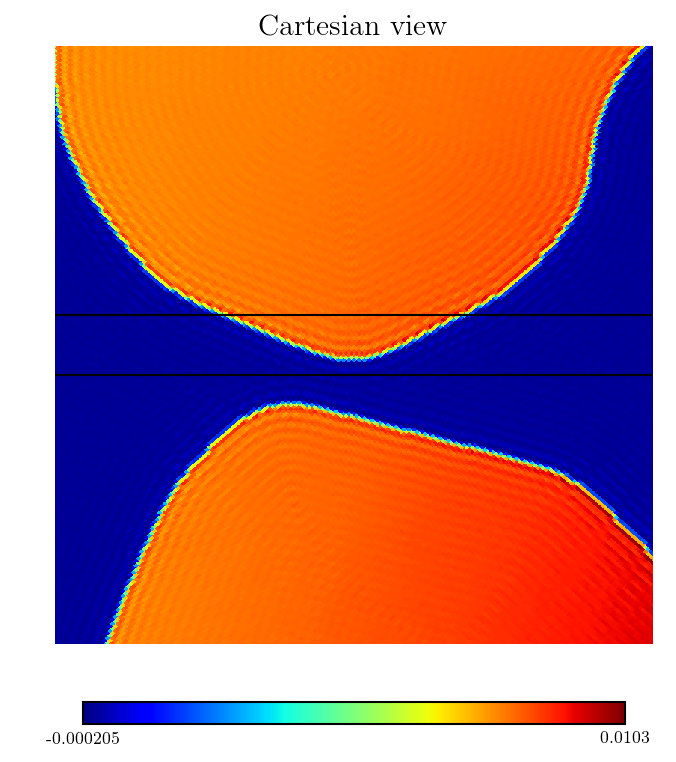

In [67]:
healpy.cartview(deepcopy(A.templateList['Bubbles'].healpixCube)[23], latra=[-20,20], lonra=[-20,20])
plt.hlines([-2,2],-40,40)



In [3]:
import h5py
import healpy
import sys
sys.path.append('../')
import Analysis
from scipy import ndimage




from matplotlib.colors import ListedColormap
import numpy as np
colombi1_cmap = ListedColormap(np.loadtxt("Planck_Parchment_RGB.txt")/255.)
colombi1_cmap.set_bad("gray") # color of missing pixels
#colombi1_cmap.set_under("white") # color of background, necessary if you want to use
# this colormap directly with hp.mollview(m, cmap=colombi1_cmap)
cmap = colombi1_cmap



A = Analysis.Analysis() 
mask = A.GenSquareMask(l_range=[-20,20], b_range=[-20,20], plane_mask=2)
psc_weights = A.CalculatePixelWeights(diffuse_model='../fermi_diffuse_'+A.tag+'.npy',psc_model='../PSC_3FGL_with_ext.npy',alpha_psc=5., f_psc=0.1)

def PlotResiduals(model, energy_range, text, grid):
    # Open the file and load the fit results of interest.
    h = h5py.File('../new/mod_s_%i_XCO_P8_stripped.hdf5'%model)
    residual = h['/fit_results/GC_no_dm/residual'][...]
    E = h['/fit_results/GC_no_dm'].attrs['energies']
    
    E_bin_1, E_bin_2 = np.argmin(np.abs(energy_range[0]-E)), np.argmin(np.abs(energy_range[1]-E))
    plt.figure(2)
    
    # TESTING 
#     print residual.shape
#     print residual[E_bin_1:E_bin_2].shape
#     print A.psc_weights[E_bin_1:E_bin_2].shape
    
    np.sum(residual[E_bin_1:E_bin_2]*A.psc_weights[E_bin_1:E_bin_2], axis=0)*mask
    #-----------------------------------
    
    m = healpy.cartview(np.sum(residual[E_bin_1:E_bin_2]*A.psc_weights[E_bin_1:E_bin_2], axis=0)*mask,latra=[-20,20], lonra=[-20,20],xsize=320, return_projected_map=True, hold=True, cbar=False)
    real_energies=(E[E_bin_1]/1e3,E[E_bin_2]/1e3) 
    plt.clf()
    plt.figure(1)
    multiplier = 1
    if energy_range[0] > 2e3: 
        multiplier = 2 
        grid.text(.08,.19, r'Counts $\times 2$', transform=grid.transAxes, fontsize=8,)
    im = grid.imshow(ndimage.gaussian_filter(m*multiplier,4), origin='lower', extent=[20,-20,-20,20], cmap=cmap, vmin=-10,vmax=10)
    #plt.imshow(ndimage.gaussian_filter(m,4), origin='lower', extent=[20,-20,-20,20], cmap='bwr', vmin=-3*np.std(m),vmax=3*np.std(m))
    
    grid.xaxis.set_ticks([-15,-10,-5,0,5,10,15])
    grid.yaxis.set_ticks([-15,-10,-5,0,5,10,15])
    grid.xaxis.set_ticklabels(["",-10,"",0,"",10,""])
    grid.yaxis.set_ticklabels(["",-10,"",0,"",10,""])
    grid.text(.08,.08,'%1.2f-%1.2f GeV'%(A.bin_edges[E_bin_1]/1e3,A.bin_edges[E_bin_2+1]/1e3), transform=grid.transAxes, fontsize=8)
    grid.text(.08,.82, text, transform=grid.transAxes, fontsize=8)
    #plt.colorbar(label='Residual Counts')
    return im 
    

from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure(1, figsize=(9.5,4.7))

grid = AxesGrid(fig, 121, # similar to subplot(142)
                        nrows_ncols = (3, 3),
                        axes_pad = 0,
                        share_all=True,
                        label_mode = "L",
                        cbar_location = "right",
                        cbar_mode=None,)
grid2 = AxesGrid(fig, 122, # similar to subplot(142)
                        nrows_ncols = (3, 3),
                        axes_pad = 0,
                        share_all=True,
                        label_mode = "L",
                        cbar_location = "right",
                        cbar_mode='single',)


for i_E, E_range in enumerate([[.3e3, .5e3],[1e3,2.5e3], [2.8e3,10e3]]):
    for i, model in enumerate([14,17,20]):
        im = PlotResiduals(model,energy_range=E_range, text=r'$f_{\rm H2}=%1.2f$'%((model-14)*0.05), grid=grid[i_E*3+ i])
        
    for i, model in enumerate([42,45,48]):
        im = PlotResiduals(model,energy_range=E_range, text=r'$f_{\rm H2}=%1.2f$'%((model-42)*0.05),grid=grid2[i_E*3+ i])
        cbar = grid2.cbar_axes[0].colorbar(im)
    #plt.show()
    
for cax in grid2.cbar_axes[1:]:
    cax.toggle_label(False)
    

for i in [6,7,8]:
    grid[i].set_xlabel('l [deg]')
    grid2[i].set_xlabel('l [deg]')
    
for i in [0,3,6]:
    grid[i].set_ylabel('b [deg]')
    grid2[i].yaxis.set_ticklabels([])
    

cbar.solids.set_edgecolor("face")
    
fig.subplots_adjust(left=0.00, wspace=-.15)
grid[1].text(.5, 1.05, r'PEB Gas Models', horizontalalignment='center', transform=grid[1].transAxes)
grid2[1].text(.5, 1.05, r'Galprop Gas Models', horizontalalignment='center', transform=grid2[1].transAxes)

grid2.cbar_axes[0].set_ylabel(r'Residual Counts') 

IOError: [Errno 2] No such file or directory: '../fermi_diffuse_P7REP_CLEAN_V15_calore.npy'

In [47]:
A = Analysis.Analysis(tag='P8R2_CLEAN_V6_calore', basepath='/data/GCE_sys/')
#############################################################
#  Need to calculate fermi bubbles area here.
# ##################################################################
A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False, fixNorm=False)


2 3.5


3.5 5


5 7


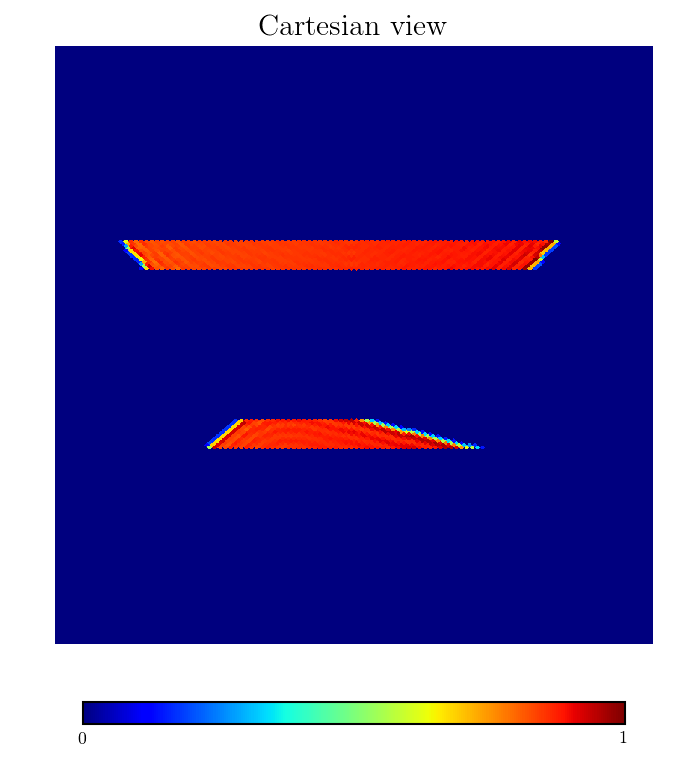

7 10


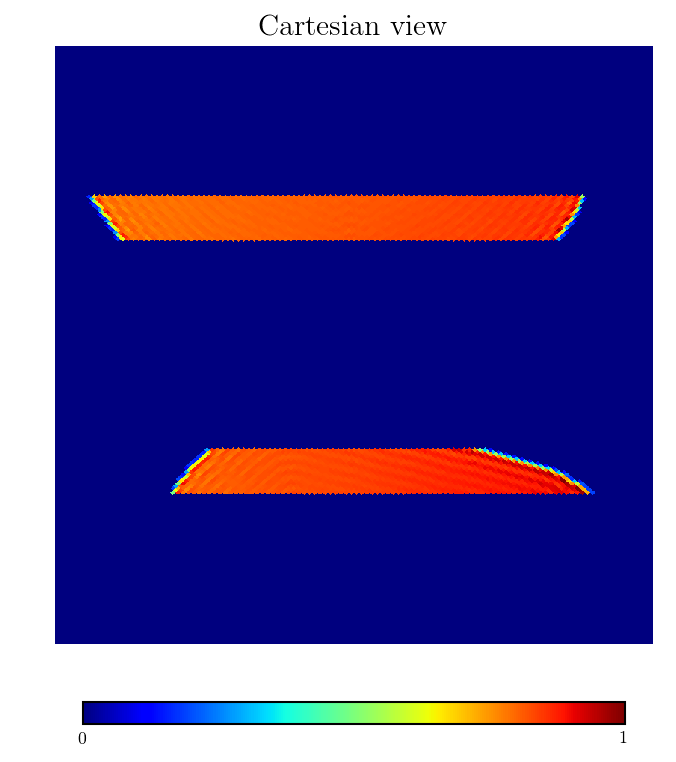

10 15


15 20


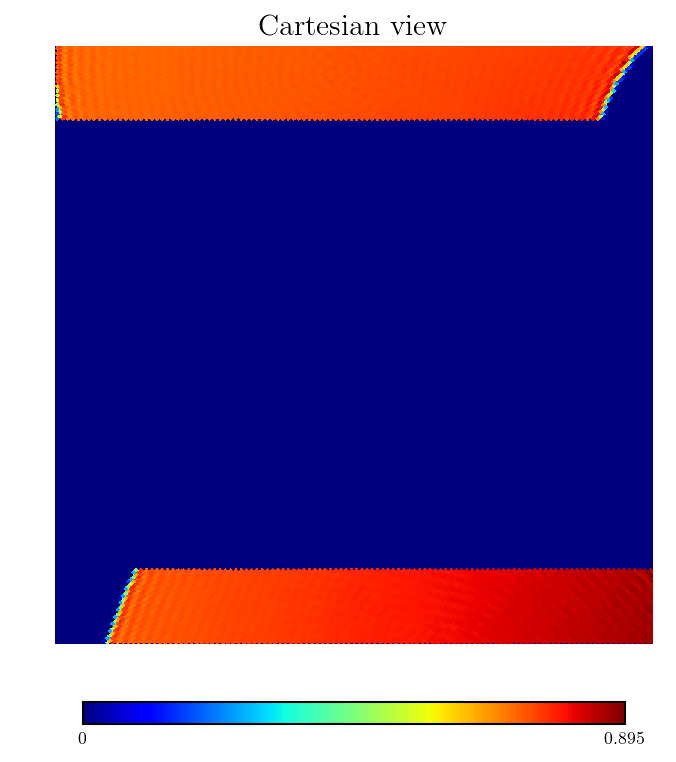

[46.584347826086955, 31.88809523809524, 17.061146496815287, 8.321217769493632, 4.222257250945775, 3.82384011420414]


In [53]:
boundaries = [2,3.5,5,7,10,15,20] 


mask_area_ratio = []

for i_b, bound in enumerate(boundaries[:-1]):
            
    print bound, boundaries[i_b+1]
    # Split ICS into rings
    #A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2)
    A.GenSquareMask(l_range=[-20,20],b_range=[bound,boundaries[i_b+1]])
    A.GenSquareMask(l_range=[-30,30],b_range=[-boundaries[i_b+1],-bound], merge=True)
    
    
    mask  = A.templateList['Bubbles'].healpixCube[20]*A.mask
    mask /= np.max(mask)
    mask[mask<.1]=0
    
    healpy.cartview(mask, latra=[-20,20], lonra=[-20,20])
    plt.show()
    mask_solid_angle = np.nonzero(mask)[0].shape[0]
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    mask_area_ratio.append(npix_roi/float(mask_solid_angle))
print mask_area_ratio

In [ ]:
boundaries = [2,3.5,5,7,10,15,20] 

mask_area_ratio = []

for i_b, bound in enumerate(boundaries[:-1]):
            
    print bound, boundaries[i_b+1]
    # Split ICS into rings
    A.GenSquareMask(l_range=[-30,30],b_range=[bound,boundaries[i_b+1]])
    A.GenSquareMask(l_range=[-30,30],b_range=[-boundaries[i_b+1],-bound], merge=True)
    #A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2, merge=True)
    
    mask  = A.templateList['Bubbles'].healpixCube[20]*A.mask
    #mask /= np.max(mask)
    #mask[mask<.1]=0
    
    healpy.cartview(mask, latra=[-20,20], lonra=[-20,20])
    plt.show()
    mask_solid_angle = np.nonzero(mask)[0].shape[0]
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    mask_area_ratio.append(npix_roi/float(mask_solid_angle))
print mask_area_ratio

In [52]:
# Restore back to normal mask
A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A.GenSquareMask(l_range=[-7.5,7.5], b_range=[-7.5,7.5], plane_mask=0.)
A.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]


A2.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=.4, 
              r_s=20.0, axesratio=2.3, offset=(0., 0.), spec_file=None,size=25)
    
print 'DM generated'
A2.GenSquareMask(l_range=[-7.5,7.5], b_range=[-7.5,7.5], plane_mask=0.)
A2.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]



A3.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A3.GenSquareMask(l_range=[-7.5,7.5], b_range=[-7.5,7.5], plane_mask=0.)
A3.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]



DM generated
Masking completed in 9.2072e-01 s
Write likelihood tempfile to  /tmp/tmpNMhCAR
Code generation completed in 3.4449e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -355500.313193 
 TOTAL NCALL = 156 
 NCALLS = 156 
 
 
 EDM = 4.01609561501e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -1.495243e+00 
 9.521022e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 7.962679e-01 
 8.053255e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 3.361514e-02 
 2.837366e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.816964e+00 
 4.053053e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 -8.789726e-02 
 3.497158e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -1.495e+00 & 9.521e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 7.963e-01 & 8.053e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 3.362e-02 & 2.837e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.817e+00 & 4.053e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & -8.790e-02 & 3.497e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.64e-02 s
Masking completed in 9.0251e-01 s
Write likelihood tempfile to  /tmp/tmpvD6X6z
Code generation completed in 4.2269e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -301097.132781 
 TOTAL NCALL = 147 
 NCALLS = 147 
 
 
 EDM = 0.00010195029732 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -1.958982e+00 
 1.237031e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 8.509501e-01 
 7.988484e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 -5.591859e-02 
 2.643278e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 1.806991e+00 
 4.058640e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 -4.284794e-01 
 3.282649e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -1.959e+00 & 1.237e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 8.510e-01 & 7.988e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & -5.592e-02 & 2.643e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 1.807e+00 & 4.059e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & -4.285e-01 & 3.283e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.40e-02 s
Masking completed in 8.9820e-01 s
Write likelihood tempfile to  /tmp/tmpsvJt3v
Code generation completed in 3.5229e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -256084.586755 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.0012546123012 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -1.907052e+00 
 1.475213e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.233184e-01 
 8.458657e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 2.158688e-01 
 2.403983e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 1.761499e+00 
 4.312903e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 -3.991280e-01 
 3.128704e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -1.907e+00 & 1.475e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.233e-01 & 8.459e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 2.159e-01 & 2.404e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 1.761e+00 & 4.313e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & -3.991e-01 & 3.129e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.18e-02 s
Masking completed in 9.0670e-01 s
Write likelihood tempfile to  /tmp/tmpYcxY6b
Code generation completed in 3.4699e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -213875.645402 
 TOTAL NCALL = 142 
 NCALLS = 142 
 
 
 EDM = 1.64157857128e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -1.827508e+00 
 1.488264e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.651671e-01 
 8.874182e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 4.818982e-01 
 2.185798e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 1.711549e+00 
 4.477116e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.456840e-02 
 2.970867e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -1.828e+00 & 1.488e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.652e-01 & 8.874e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 4.819e-01 & 2.186e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 1.712e+00 & 4.477e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.457e-02 & 2.971e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.29e-02 s
Masking completed in 9.0468e-01 s
Write likelihood tempfile to  /tmp/tmpQsP60h
Code generation completed in 2.5191e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -211447.005008 
 TOTAL NCALL = 142 
 NCALLS = 142 
 
 
 EDM = 1.22384948286e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.014164e+00 
 1.686514e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.941904e-01 
 8.863912e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 5.345275e-01 
 1.854036e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 1.700910e+00 
 4.455257e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 -2.879814e-01 
 2.818707e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.014e+00 & 1.687e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.942e-01 & 8.864e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 5.345e-01 & 1.854e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 1.701e+00 & 4.455e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & -2.880e-01 & 2.819e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.33e-02 s
Masking completed in 9.0717e-01 s
Write likelihood tempfile to  /tmp/tmpv5Ljln
Code generation completed in 3.5141e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -216031.656541 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.00731381810839 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.148482e+00 
 1.165726e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.041131e+00 
 9.079839e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 6.736112e-01 
 1.537520e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 1.681615e+00 
 4.513877e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 -2.468634e-01 
 2.669556e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.148e+00 & 1.166e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.041e+00 & 9.080e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 6.736e-01 & 1.538e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 1.682e+00 & 4.514e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & -2.469e-01 & 2.670e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.61e-02 s
Masking completed in 8.8666e-01 s
Write likelihood tempfile to  /tmp/tmpCXsCk9
Code generation completed in 5.0859e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -215602.183144 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 2.75233882211e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.094512e+00 
 1.360988e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.077871e+00 
 8.949262e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 7.917534e-01 
 1.276298e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 1.457517e+00 
 4.355669e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 -2.860763e-02 
 2.485572e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.095e+00 & 1.361e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.078e+00 & 8.949e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 7.918e-01 & 1.276e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 1.458e+00 & 4.356e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & -2.861e-02 & 2.486e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   7.31e-02 s
Masking completed in 9.2126e-01 s
Write likelihood tempfile to  /tmp/tmpW9VsSM
Code generation completed in 3.5629e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -207105.1298 
 TOTAL NCALL = 112 
 NCALLS = 112 
 
 
 EDM = 0.00267655538418 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -9.232534e-01 
 1.101269e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.119553e+00 
 9.311132e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 8.291528e-01 
 1.196717e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.514806e+00 
 4.545580e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 -1.087129e-02 
 2.405803e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -9.233e-01 & 1.101e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.120e+00 & 9.311e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 8.292e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.515e+00 & 4.546e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & -1.087e-02 & 2.406e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.65e-02 s
Masking completed in 8.7257e-01 s
Write likelihood tempfile to  /tmp/tmpLr2d5Q
Code generation completed in 3.2599e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -201584.40716 
 TOTAL NCALL = 125 
 NCALLS = 125 
 
 
 EDM = 0.000463996026184 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -5.671320e-01 
 1.119442e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.123689e+00 
 9.319068e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 8.611812e-01 
 1.159147e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 1.340807e+00 
 4.413328e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.004483e-01 
 2.362501e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -5.671e-01 & 1.119e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.124e+00 & 9.319e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 8.612e-01 & 1.159e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 1.341e+00 & 4.413e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.004e-01 & 2.363e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.92e-02 s
Masking completed in 8.8378e-01 s
Write likelihood tempfile to  /tmp/tmp6ykVbq
Code generation completed in 2.7399e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188020.077095 
 TOTAL NCALL = 125 
 NCALLS = 125 
 
 
 EDM = 0.000200704683481 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -5.429839e-01 
 1.051596e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.178684e+00 
 9.834928e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.891233e-01 
 1.138092e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 1.308794e+00 
 4.573223e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 2.829840e-01 
 2.374409e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -5.430e-01 & 1.052e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.179e+00 & 9.835e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.891e-01 & 1.138e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 1.309e+00 & 4.573e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 2.830e-01 & 2.374e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.91e-02 s
Masking completed in 8.6821e-01 s
Write likelihood tempfile to  /tmp/tmpafolj3
Code generation completed in 4.5812e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -185948.275816 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000659800921704 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 4.064767e-03 
 7.902393e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.210177e+00 
 1.006157e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 8.964849e-01 
 1.164613e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.116230e+00 
 4.478340e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 3.702198e-02 
 2.450650e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 4.065e-03 & 7.902e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.210e+00 & 1.006e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 8.965e-01 & 1.165e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.116e+00 & 4.478e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 3.702e-02 & 2.451e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.84e-02 s
Masking completed in 8.7119e-01 s
Write likelihood tempfile to  /tmp/tmpPrk0Dk
Code generation completed in 3.5381e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -161956.275652 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00119712820137 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.382278e-02 
 7.238666e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.234306e+00 
 1.079087e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 9.101079e-01 
 1.200638e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 1.080364e+00 
 4.652121e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 7.780515e-02 
 2.670472e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.382e-02 & 7.239e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.234e+00 & 1.079e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 9.101e-01 & 1.201e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 1.080e+00 & 4.652e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 7.781e-02 & 2.670e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.84e-02 s
Masking completed in 8.8998e-01 s
Write likelihood tempfile to  /tmp/tmp0yMHKw
Code generation completed in 3.4540e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -139060.478273 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00082372581753 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 2.228292e-01 
 7.348061e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.252358e+00 
 1.159488e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.247049e-01 
 1.271715e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 9.676348e-01 
 4.775017e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.300888e-02 
 2.595254e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 2.228e-01 & 7.348e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.252e+00 & 1.159e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.247e-01 & 1.272e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 9.676e-01 & 4.775e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.301e-02 & 2.595e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.87e-02 s
Masking completed in 8.8327e-01 s
Write likelihood tempfile to  /tmp/tmp7Ghfrk
Code generation completed in 3.5679e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -118662.538707 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00181526555444 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 2.997015e-01 
 6.326910e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.288197e+00 
 1.246786e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.365833e-01 
 1.321213e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.649763e-01 
 4.753009e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 2.460615e-01 
 2.452274e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 2.997e-01 & 6.327e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.288e+00 & 1.247e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.366e-01 & 1.321e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.650e-01 & 4.753e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 2.461e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.83e-02 s
Masking completed in 8.7678e-01 s
Write likelihood tempfile to  /tmp/tmpLB8p0s
Code generation completed in 3.2930e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -98470.6835947 
 TOTAL NCALL = 228 
 NCALLS = 228 
 
 
 EDM = 0.000109975215769 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 3.652989e-01 
 6.367054e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.353300e+00 
 1.347504e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.674024e-01 
 1.167556e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.938559e-01 
 4.785989e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 4.819692e-01 
 2.250405e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 3.653e-01 & 6.367e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.353e+00 & 1.348e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.674e-01 & 1.168e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.939e-01 & 4.786e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 4.820e-01 & 2.250e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.16e-02 s
Masking completed in 8.7789e-01 s
Write likelihood tempfile to  /tmp/tmpuH3UuY
Code generation completed in 2.7492e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -74839.9193125 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 7.98224874636e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 3.579881e-01 
 5.360566e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.390228e+00 
 1.588898e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 9.624692e-01 
 1.110579e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.512656e-01 
 4.913933e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 5.049597e-01 
 2.050672e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 3.580e-01 & 5.361e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.390e+00 & 1.589e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 9.625e-01 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.513e-01 & 4.914e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 5.050e-01 & 2.051e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.85e-02 s
Masking completed in 8.4666e-01 s
Write likelihood tempfile to  /tmp/tmplwGKVQ
Code generation completed in 3.5911e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -52852.7187145 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000120210070957 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 5.004278e-01 
 4.943698e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.461228e+00 
 1.891085e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.651349e-01 
 1.287090e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.704295e-01 
 5.345846e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 4.810424e-01 
 2.370660e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 5.004e-01 & 4.944e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.461e+00 & 1.891e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.651e-01 & 1.287e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.704e-01 & 5.346e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 4.810e-01 & 2.371e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.85e-02 s
Masking completed in 8.8631e-01 s
Write likelihood tempfile to  /tmp/tmpDJHrJP
Code generation completed in 3.4890e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -31234.1746474 
 TOTAL NCALL = 111 
 NCALLS = 111 
 
 
 EDM = 4.0190836591e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 4.651215e-01 
 5.090426e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.478594e+00 
 2.259521e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.729760e-01 
 1.534202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.146064e-01 
 5.766886e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.185357e-01 
 2.330510e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 4.651e-01 & 5.090e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.479e+00 & 2.260e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.730e-01 & 1.534e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.146e-01 & 5.767e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.185e-01 & 2.331e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.62e-02 s
Masking completed in 8.8515e-01 s
Write likelihood tempfile to  /tmp/tmpSZ2xFA
Code generation completed in 4.1299e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -16438.4527292 
 TOTAL NCALL = 126 
 NCALLS = 126 
 
 
 EDM = 1.80564392388e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 5.011677e-01 
 5.982436e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.608009e+00 
 2.766876e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.549614e-01 
 1.560532e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.514735e-01 
 5.946545e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 5.400078e-01 
 1.787202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 5.012e-01 & 5.982e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.608e+00 & 2.767e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.550e-01 & 1.561e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.515e-01 & 5.947e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 5.400e-01 & 1.787e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.94e-02 s
Masking completed in 8.6559e-01 s
Write likelihood tempfile to  /tmp/tmpw9yvWz
Code generation completed in 3.5429e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -5697.38820509 
 TOTAL NCALL = 95 
 NCALLS = 95 
 
 
 EDM = 2.96641956076e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 3.941994e-01 
 5.078181e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.526111e+00 
 3.495392e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.627624e-01 
 1.361449e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 8.325215e-01 
 6.677838e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.495363e-01 
 1.439045e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 3.942e-01 & 5.078e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.526e+00 & 3.495e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.628e-01 & 1.361e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 8.325e-01 & 6.678e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.495e-01 & 1.439e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.28e-02 s
Masking completed in 8.8928e-01 s
Write likelihood tempfile to  /tmp/tmpJujZ6u
Code generation completed in 3.5181e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 389.30671009 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.000838113230302 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.389733e-01 
 8.380374e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.629426e+00 
 4.770584e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.837161e-01 
 1.299573e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.202291e-01 
 7.637435e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.731732e-01 
 1.323551e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.390e-01 & 8.380e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.629e+00 & 4.771e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.837e-01 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.202e-01 & 7.637e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.732e-01 & 1.324e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.56e-02 s
Masking completed in 8.7636e-01 s
Write likelihood tempfile to  /tmp/tmp6urYgH
Code generation completed in 3.5300e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2679.51065668 
 TOTAL NCALL = 110 
 NCALLS = 110 
 
 
 EDM = 0.000230016891084 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 1.163969e-01 
 6.595374e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.820591e+00 
 6.947211e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.947867e-01 
 1.220154e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.596960e-01 
 9.740685e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.222370e-01 
 1.208105e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 1.164e-01 & 6.595e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.821e+00 & 6.947e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.948e-01 & 1.220e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.597e-01 & 9.741e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.222e-01 & 1.208e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.61e-02 s
Masking completed in 8.8398e-01 s
Write likelihood tempfile to  /tmp/tmpqBJPVu
Code generation completed in 4.1692e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2841.22846449 
 TOTAL NCALL = 118 
 NCALLS = 118 
 
 
 EDM = 4.87445217561e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.300107e-01 
 9.217627e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.422296e+00 
 1.343320e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.849773e-01 
 1.256032e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 1.033832e+00 
 1.726035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.241674e-01 
 1.054248e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.300e-01 & 9.218e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.422e+00 & 1.343e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.850e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 1.034e+00 & 1.726e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.242e-01 & 1.054e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.79e-02 s
Masking completed in 8.7233e-01 s
Write likelihood tempfile to  /tmp/tmpwU6CLK
Code generation completed in 3.4459e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -0.880541
             PSC = +1.000000
    Pi0_Brems_23 = +3.843379
    Isotropic_23 = +0.976019
          ICS_23 = +2.107667
      Bubbles_23 = +1.152189

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -nan
             PSC = +1.000000
    Pi0_Brems_23 = -nan
    Isotropic_23 = -nan
          ICS_23 = -nan
      Bubbles_23 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = +nan
             PSC = +1.000000
    Pi0_Brems_23 = +nan
    Isotropic_23 = +nan
          ICS_23 = +nan
      Bubbles_23 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
   

FCN = 1613.65966311 
 TOTAL NCALL = 169 
 NCALLS = 169 
 
 
 EDM = 0.00100539169698 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -2.216819e-01 
 1.892411e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 4.713668e+00 
 3.805895e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.951787e-01 
 2.221433e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 8.465462e-01 
 4.508740e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.587668e-01 
 1.555255e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -2.217e-01 & 1.892e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 4.714e+00 & 3.806e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.952e-01 & 2.221e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 8.465e-01 & 4.509e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.588e-01 & 1.555e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.85e-02 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -1.495243e+00 
 9.521072e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 7.962679e-01 
 8.052756e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 3.361514e-02 
 2.837365e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.816964e+00 
 4.052871e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 -8.789726e-02 
 3.496248e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -1.495e+00 & 9.521e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 7.963e-01 & 8.053e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 3.362e-02 & 2.837e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.817e+00 & 4.053e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & -8.790e-02 & 3.496e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 -0.05
 
 
 
 -0.36
 
 
 
 -0.10
 
 
 
 
 
 Pi0_Brems_0 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 0.32
 
 
 
 -0.64
 
 
 
 0.28
 
 
 
 
 
 Isotropic_0 
 
 
 -0.05
 
 
 
 0.32
 
 
 
 1.00
 
 
 
 -0.59
 
 
 
 -0.10
 
 
 
 
 
 ICS_0 
 
 
 -0.36
 
 
 
 -0.64
 
 
 
 -0.59
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 
 
 Bubbles_0 
 
 
 -0.10
 
 
 
 0.28
 
 
 
 -0.10
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{172,240,179} -0.10\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{189,216,167} 0.28\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} -0.27\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -1.958982e+00 
 1.237034e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 8.509501e-01 
 7.987958e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 -5.591859e-02 
 2.643269e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 1.806991e+00 
 4.058409e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 -4.284794e-01 
 3.281697e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -1.959e+00 & 1.237e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 8.510e-01 & 7.988e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & -5.592e-02 & 2.643e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 1.807e+00 & 4.058e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & -4.285e-01 & 3.282e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 -0.04
 
 
 
 -0.47
 
 
 
 -0.08
 
 
 
 
 
 Pi0_Brems_1 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 -0.56
 
 
 
 0.27
 
 
 
 
 
 Isotropic_1 
 
 
 -0.04
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.09
 
 
 
 
 
 ICS_1 
 
 
 -0.47
 
 
 
 -0.56
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 
 
 Bubbles_1 
 
 
 -0.08
 
 
 
 0.27
 
 
 
 -0.09
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{171,242,180} -0.08\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{188,217,167} 0.27\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,216,167} -0.28\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{171,242,180} -0.08 & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{189,216,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -1.907052e+00 
 1.475184e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.233184e-01 
 8.458173e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 2.158688e-01 
 2.403966e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 1.761499e+00 
 4.312591e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 -3.991280e-01 
 3.127906e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -1.907e+00 & 1.475e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.233e-01 & 8.458e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 2.159e-01 & 2.404e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 1.761e+00 & 4.313e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & -3.991e-01 & 3.128e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.03
 
 
 
 -0.57
 
 
 
 -0.07
 
 
 
 
 
 Pi0_Brems_2 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 0.24
 
 
 
 -0.51
 
 
 
 0.25
 
 
 
 
 
 Isotropic_2 
 
 
 -0.03
 
 
 
 0.24
 
 
 
 1.00
 
 
 
 -0.47
 
 
 
 -0.08
 
 
 
 
 
 ICS_2 
 
 
 -0.57
 
 
 
 -0.51
 
 
 
 -0.47
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 
 
 Bubbles_2 
 
 
 -0.07
 
 
 
 0.25
 
 
 
 -0.08
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{215,177,147} -0.57 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{210,185,151} -0.51 & \cellcolor[RGB]{186,219,168} 0.25\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{206,189,153} -0.47 & \cellcolor[RGB]{170,243,181} -0.08\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{215,177,147} -0.57 & \cellcolor[RGB]{210,185,151} -0.51 & \cellcolor[RGB]{206,189,153} -0.47 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,167} -0.28\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{186,219,168} 0.25 & \cellcolor[RGB]{170,243,181} -0.08 & \cellcolor[RGB]{189,215,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -1.827508e+00 
 1.488251e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.651671e-01 
 8.873939e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 4.818982e-01 
 2.185794e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 1.711549e+00 
 4.476942e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.456840e-02 
 2.970456e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -1.828e+00 & 1.488e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.652e-01 & 8.874e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 4.819e-01 & 2.186e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 1.712e+00 & 4.477e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.457e-02 & 2.970e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.02
 
 
 
 -0.62
 
 
 
 -0.05
 
 
 
 
 
 Pi0_Brems_3 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 0.20
 
 
 
 -0.47
 
 
 
 0.22
 
 
 
 
 
 Isotropic_3 
 
 
 -0.02
 
 
 
 0.20
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 -0.06
 
 
 
 
 
 ICS_3 
 
 
 -0.62
 
 
 
 -0.47
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 
 
 Bubbles_3 
 
 
 -0.05
 
 
 
 0.22
 
 
 
 -0.06
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.27\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{187,218,168} -0.27 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.014164e+00 
 1.686514e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.941904e-01 
 8.863672e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 5.345275e-01 
 1.854035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 1.700910e+00 
 4.455099e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 -2.879814e-01 
 2.818300e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.014e+00 & 1.687e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.942e-01 & 8.864e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 5.345e-01 & 1.854e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 1.701e+00 & 4.455e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & -2.880e-01 & 2.818e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.02
 
 
 
 -0.66
 
 
 
 -0.04
 
 
 
 
 
 Pi0_Brems_4 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.45
 
 
 
 0.22
 
 
 
 
 
 Isotropic_4 
 
 
 -0.02
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 -0.05
 
 
 
 
 
 ICS_4 
 
 
 -0.66
 
 
 
 -0.45
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 
 
 Bubbles_4 
 
 
 -0.04
 
 
 
 0.22
 
 
 
 -0.05
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{224,164,141} -0.66 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{224,164,141} -0.66 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} -0.28\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{188,216,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.148482e+00 
 1.165696e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.041131e+00 
 9.079393e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 6.736112e-01 
 1.537274e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 1.681615e+00 
 4.513342e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 -2.468634e-01 
 2.669147e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.148e+00 & 1.166e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.041e+00 & 9.079e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 6.736e-01 & 1.537e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 1.682e+00 & 4.513e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & -2.469e-01 & 2.669e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 -0.68
 
 
 
 -0.03
 
 
 
 
 
 Pi0_Brems_5 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.44
 
 
 
 0.21
 
 
 
 
 
 Isotropic_5 
 
 
 -0.01
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 -0.05
 
 
 
 
 
 ICS_5 
 
 
 -0.68
 
 
 
 -0.44
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 
 
 Bubbles_5 
 
 
 -0.03
 
 
 
 0.21
 
 
 
 -0.05
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{182,225,171} 0.21\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.094512e+00 
 1.360975e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.077871e+00 
 8.948986e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 7.917534e-01 
 1.276193e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 1.457517e+00 
 4.355351e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 -2.860763e-02 
 2.485257e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.095e+00 & 1.361e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.078e+00 & 8.949e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 7.918e-01 & 1.276e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 1.458e+00 & 4.355e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & -2.861e-02 & 2.485e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.00
 
 
 
 -0.70
 
 
 
 -0.01
 
 
 
 
 
 Pi0_Brems_6 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.44
 
 
 
 0.20
 
 
 
 
 
 Isotropic_6 
 
 
 -0.00
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 -0.04
 
 
 
 
 
 ICS_6 
 
 
 -0.70
 
 
 
 -0.44
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 
 
 Bubbles_6 
 
 
 -0.01
 
 
 
 0.20
 
 
 
 -0.04
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{181,227,172} 0.20\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -9.232534e-01 
 1.101286e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.119553e+00 
 9.310958e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 8.291528e-01 
 1.196659e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.514806e+00 
 4.545352e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 -1.087129e-02 
 2.405488e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -9.233e-01 & 1.101e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.120e+00 & 9.311e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 8.292e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.515e+00 & 4.545e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & -1.087e-02 & 2.405e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.00
 
 
 
 -0.71
 
 
 
 -0.01
 
 
 
 
 
 Pi0_Brems_7 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.44
 
 
 
 0.19
 
 
 
 
 
 Isotropic_7 
 
 
 -0.00
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.24
 
 
 
 -0.04
 
 
 
 
 
 ICS_7 
 
 
 -0.71
 
 
 
 -0.44
 
 
 
 -0.24
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 
 
 Bubbles_7 
 
 
 -0.01
 
 
 
 0.19
 
 
 
 -0.04
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{181,228,173} 0.19\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{166,249,183} -0.04\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} -0.30\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -5.671320e-01 
 1.119453e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.123689e+00 
 9.318871e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 8.611812e-01 
 1.159108e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 1.340807e+00 
 4.413120e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.004483e-01 
 2.362196e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -5.671e-01 & 1.119e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.124e+00 & 9.319e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 8.612e-01 & 1.159e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 1.341e+00 & 4.413e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.004e-01 & 2.362e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 0.00
 
 
 
 -0.71
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_8 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.44
 
 
 
 0.19
 
 
 
 
 
 Isotropic_8 
 
 
 0.00
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 -0.04
 
 
 
 
 
 ICS_8 
 
 
 -0.71
 
 
 
 -0.44
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 
 
 Bubbles_8 
 
 
 0.00
 
 
 
 0.19
 
 
 
 -0.04
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{180,229,173} 0.19\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} -0.23 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{184,223,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,165} -0.31\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{180,229,173} 0.19 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{192,211,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -5.429839e-01 
 1.051608e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.178684e+00 
 9.834771e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.891233e-01 
 1.138067e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 1.308794e+00 
 4.573063e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 2.829840e-01 
 2.374151e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -5.430e-01 & 1.052e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.179e+00 & 9.835e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.891e-01 & 1.138e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 1.309e+00 & 4.573e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 2.830e-01 & 2.374e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 0.00
 
 
 
 -0.71
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_9 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.44
 
 
 
 0.18
 
 
 
 
 
 Isotropic_9 
 
 
 0.00
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 -0.03
 
 
 
 
 
 ICS_9 
 
 
 -0.71
 
 
 
 -0.44
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 
 
 Bubbles_9 
 
 
 0.01
 
 
 
 0.18
 
 
 
 -0.03
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{179,230,174} 0.18\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} -0.31\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 4.064767e-03 
 7.902622e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.210177e+00 
 1.006136e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 8.964849e-01 
 1.164594e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.116230e+00 
 4.478125e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 3.702198e-02 
 2.450218e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 4.065e-03 & 7.903e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.210e+00 & 1.006e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 8.965e-01 & 1.165e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.116e+00 & 4.478e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 3.702e-02 & 2.450e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 0.00
 
 
 
 -0.69
 
 
 
 0.02
 
 
 
 
 
 Pi0_Brems_10 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.46
 
 
 
 0.19
 
 
 
 
 
 Isotropic_10 
 
 
 0.00
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.03
 
 
 
 
 
 ICS_10 
 
 
 -0.69
 
 
 
 -0.46
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_10 
 
 
 0.02
 
 
 
 0.19
 
 
 
 -0.03
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{165,252,185} 0.02\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{180,228,173} 0.19\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.382278e-02 
 7.238934e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.234306e+00 
 1.079055e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 9.101079e-01 
 1.200625e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 1.080364e+00 
 4.651765e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 7.780515e-02 
 2.669819e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.382e-02 & 7.239e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.234e+00 & 1.079e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 9.101e-01 & 1.201e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 1.080e+00 & 4.652e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 7.781e-02 & 2.670e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 0.01
 
 
 
 -0.68
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_11 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.47
 
 
 
 0.20
 
 
 
 
 
 Isotropic_11 
 
 
 0.01
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.03
 
 
 
 
 
 ICS_11 
 
 
 -0.68
 
 
 
 -0.47
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 
 
 Bubbles_11 
 
 
 0.03
 
 
 
 0.20
 
 
 
 -0.03
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{181,227,172} 0.20\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,201,159} -0.39\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 2.228292e-01 
 7.348296e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.252358e+00 
 1.159444e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.247049e-01 
 1.271704e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 9.676348e-01 
 4.774467e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.300888e-02 
 2.594472e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 2.228e-01 & 7.348e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.252e+00 & 1.159e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.247e-01 & 1.272e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 9.676e-01 & 4.774e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.301e-02 & 2.594e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 0.01
 
 
 
 -0.66
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_12 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.49
 
 
 
 0.21
 
 
 
 
 
 Isotropic_12 
 
 
 0.01
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.04
 
 
 
 
 
 ICS_12 
 
 
 -0.66
 
 
 
 -0.49
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 
 
 Bubbles_12 
 
 
 0.03
 
 
 
 0.21
 
 
 
 -0.04
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{182,226,172} 0.21\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{182,226,172} 0.21 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 2.997015e-01 
 6.327007e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.288197e+00 
 1.246745e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.365833e-01 
 1.321203e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.649763e-01 
 4.752449e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 2.460615e-01 
 2.451665e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 2.997e-01 & 6.327e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.288e+00 & 1.247e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.366e-01 & 1.321e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.650e-01 & 4.752e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 2.461e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 0.01
 
 
 
 -0.64
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_13 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.50
 
 
 
 0.19
 
 
 
 
 
 Isotropic_13 
 
 
 0.01
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.03
 
 
 
 
 
 ICS_13 
 
 
 -0.64
 
 
 
 -0.50
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 
 
 Bubbles_13 
 
 
 0.04
 
 
 
 0.19
 
 
 
 -0.03
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{181,227,173} 0.19\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{181,227,173} 0.19 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 3.652989e-01 
 6.317752e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.353300e+00 
 1.381406e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.674024e-01 
 1.166468e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.938559e-01 
 4.745036e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 4.819692e-01 
 2.212349e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 3.653e-01 & 6.318e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.353e+00 & 1.381e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.674e-01 & 1.166e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.939e-01 & 4.745e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 4.820e-01 & 2.212e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.61
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_14 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.51
 
 
 
 0.19
 
 
 
 
 
 Isotropic_14 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.03
 
 
 
 
 
 ICS_14 
 
 
 -0.61
 
 
 
 -0.51
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 
 
 Bubbles_14 
 
 
 0.04
 
 
 
 0.19
 
 
 
 -0.03
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{181,228,173} 0.19\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{165,250,184} -0.03\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 3.579881e-01 
 5.360573e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.390228e+00 
 1.588867e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 9.624692e-01 
 1.110577e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.512656e-01 
 4.913516e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 5.049597e-01 
 2.050376e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 3.580e-01 & 5.361e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.390e+00 & 1.589e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 9.625e-01 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.513e-01 & 4.914e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 5.050e-01 & 2.050e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 0.01
 
 
 
 -0.58
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_15 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.54
 
 
 
 0.17
 
 
 
 
 
 Isotropic_15 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.02
 
 
 
 
 
 ICS_15 
 
 
 -0.58
 
 
 
 -0.54
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 
 
 Bubbles_15 
 
 
 0.04
 
 
 
 0.17
 
 
 
 -0.02
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{179,230,174} 0.17\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 5.004278e-01 
 4.943713e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.461228e+00 
 1.891045e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.651349e-01 
 1.287088e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.704295e-01 
 5.345339e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 4.810424e-01 
 2.370265e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 5.004e-01 & 4.944e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.461e+00 & 1.891e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.651e-01 & 1.287e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.704e-01 & 5.345e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 4.810e-01 & 2.370e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.55
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_16 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.56
 
 
 
 0.18
 
 
 
 
 
 Isotropic_16 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.02
 
 
 
 
 
 ICS_16 
 
 
 -0.55
 
 
 
 -0.56
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 
 
 Bubbles_16 
 
 
 0.04
 
 
 
 0.18
 
 
 
 -0.02
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{180,229,173} 0.18\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} -0.43\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 4.651215e-01 
 5.085817e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.478594e+00 
 2.256396e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.729760e-01 
 1.534065e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.146064e-01 
 5.733158e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.185357e-01 
 2.326688e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 4.651e-01 & 5.086e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.479e+00 & 2.256e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.730e-01 & 1.534e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.146e-01 & 5.733e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.185e-01 & 2.327e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.52
 
 
 
 0.05
 
 
 
 
 
 Pi0_Brems_17 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.59
 
 
 
 0.18
 
 
 
 
 
 Isotropic_17 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 -0.03
 
 
 
 
 
 ICS_17 
 
 
 -0.52
 
 
 
 -0.59
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 
 
 Bubbles_17 
 
 
 0.05
 
 
 
 0.18
 
 
 
 -0.03
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{210,183,150} -0.52 & \cellcolor[RGB]{167,247,183} 0.05\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{180,229,174} 0.18\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,232,175} -0.16 & \cellcolor[RGB]{165,251,184} -0.03\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{210,183,150} -0.52 & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{177,232,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} -0.43\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{180,229,174} 0.18 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 5.011677e-01 
 5.982450e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.608009e+00 
 2.766861e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.549614e-01 
 1.560530e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.514735e-01 
 5.946357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 5.400078e-01 
 1.787105e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 5.012e-01 & 5.982e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.608e+00 & 2.767e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.550e-01 & 1.561e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.515e-01 & 5.946e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 5.400e-01 & 1.787e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.48
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_18 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.61
 
 
 
 0.14
 
 
 
 
 
 Isotropic_18 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 -0.02
 
 
 
 
 
 ICS_18 
 
 
 -0.48
 
 
 
 -0.61
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 -0.38
 
 
 
 
 
 Bubbles_18 
 
 
 0.04
 
 
 
 0.14
 
 
 
 -0.02
 
 
 
 -0.38
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} -0.14 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{176,235,177} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{176,234,176} 0.14\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{165,251,185} -0.02\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,202,160} -0.38\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 3.941994e-01 
 5.068029e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.526111e+00 
 3.488881e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.627624e-01 
 1.361476e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 8.325215e-01 
 6.660859e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.495363e-01 
 1.438824e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 3.942e-01 & 5.068e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.526e+00 & 3.489e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.628e-01 & 1.361e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 8.325e-01 & 6.661e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.495e-01 & 1.439e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 0.01
 
 
 
 -0.46
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_19 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.63
 
 
 
 0.13
 
 
 
 
 
 Isotropic_19 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.02
 
 
 
 
 
 ICS_19 
 
 
 -0.46
 
 
 
 -0.63
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 
 
 Bubbles_19 
 
 
 0.03
 
 
 
 0.13
 
 
 
 -0.02
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{165,252,185} -0.02\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} -0.33\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{194,208,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.389733e-01 
 8.380363e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.629426e+00 
 4.770579e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.837161e-01 
 1.299573e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.202291e-01 
 7.637412e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.731732e-01 
 1.323548e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.390e-01 & 8.380e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.629e+00 & 4.771e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.837e-01 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.202e-01 & 7.637e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.732e-01 & 1.324e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 0.01
 
 
 
 -0.38
 
 
 
 0.02
 
 
 
 
 
 Pi0_Brems_20 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.66
 
 
 
 0.11
 
 
 
 
 
 Isotropic_20 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.01
 
 
 
 
 
 ICS_20 
 
 
 -0.38
 
 
 
 -0.66
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 
 
 Bubbles_20 
 
 
 0.02
 
 
 
 0.11
 
 
 
 -0.01
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{165,251,185} 0.02\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{174,238,178} 0.11\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} -0.30\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{174,238,178} 0.11 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{191,212,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 1.163969e-01 
 6.595334e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.820591e+00 
 6.947200e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.947867e-01 
 1.220154e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.596960e-01 
 9.740639e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.222370e-01 
 1.208101e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 1.164e-01 & 6.595e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.821e+00 & 6.947e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.948e-01 & 1.220e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.597e-01 & 9.741e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.222e-01 & 1.208e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 0.01
 
 
 
 -0.36
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_21 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.67
 
 
 
 0.09
 
 
 
 
 
 Isotropic_21 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.10
 
 
 
 -0.01
 
 
 
 
 
 ICS_21 
 
 
 -0.36
 
 
 
 -0.67
 
 
 
 -0.10
 
 
 
 1.00
 
 
 
 -0.24
 
 
 
 
 
 Bubbles_21 
 
 
 0.01
 
 
 
 0.09
 
 
 
 -0.01
 
 
 
 -0.24
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,170} -0.24\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{185,221,170} -0.24 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.300107e-01 
 9.217593e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.422296e+00 
 1.343330e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.849773e-01 
 1.256032e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 1.033832e+00 
 1.726048e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.241674e-01 
 1.054247e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.300e-01 & 9.218e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.422e+00 & 1.343e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.850e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 1.034e+00 & 1.726e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.242e-01 & 1.054e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 0.01
 
 
 
 -0.39
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_22 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.70
 
 
 
 0.06
 
 
 
 
 
 Isotropic_22 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 -0.00
 
 
 
 
 
 ICS_22 
 
 
 -0.39
 
 
 
 -0.70
 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 
 
 Bubbles_22 
 
 
 0.01
 
 
 
 0.06
 
 
 
 -0.00
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,244,181} -0.07 & \cellcolor[RGB]{163,253,186} -0.00\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{169,244,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,175} -0.17\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{178,231,175} -0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -2.216819e-01 
 1.892482e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 4.713668e+00 
 3.805718e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.951787e-01 
 2.221433e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 8.465462e-01 
 4.508534e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.587668e-01 
 1.555254e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -2.217e-01 & 1.892e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 4.714e+00 & 3.806e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.952e-01 & 2.221e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 8.465e-01 & 4.509e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.588e-01 & 1.555e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.22
 
 
 
 0.00
 
 
 
 -0.30
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.22
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.71
 
 
 
 0.04
 
 
 
 
 
 Isotropic_23 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 -0.00
 
 
 
 
 
 ICS_23 
 
 
 -0.30
 
 
 
 -0.71
 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 
 
 Bubbles_23 
 
 
 0.01
 
 
 
 0.04
 
 
 
 -0.00
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 8.8277e-01 s
Write likelihood tempfile to  /tmp/tmpdJ01YV
Code generation completed in 4.9760e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -355467.440135 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 7.34664229101e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.508006e+00 
 2.396830e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.010358e+00 
 1.376932e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.510158e+00 
 2.919954e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.502968e-01 
 4.762366e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 3.863659e-01 
 3.622333e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.508e+00 & 2.397e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.010e+00 & 1.377e-02 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.510e+00 & 2.920e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.503e-01 & 4.762e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 3.864e-01 & 3.622e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   7.81e-02 s
Masking completed in 9.3630e-01 s
Write likelihood tempfile to  /tmp/tmptB7q5p
Code generation completed in 3.5679e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -301110.102896 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 0.000109564032594 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.904402e+00 
 2.746604e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.025697e+00 
 1.406465e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.383917e+00 
 2.682795e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 2.819925e-01 
 4.997933e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 3.261088e-01 
 3.396833e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.904e+00 & 2.747e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.026e+00 & 1.406e-02 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.384e+00 & 2.683e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 2.820e-01 & 4.998e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 3.261e-01 & 3.397e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.07e-02 s
Masking completed in 8.9304e-01 s
Write likelihood tempfile to  /tmp/tmpIAfjg4
Code generation completed in 2.7850e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -256143.649807 
 TOTAL NCALL = 140 
 NCALLS = 140 
 
 
 EDM = 7.51980600144e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.863277e+00 
 2.971669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.094724e+00 
 1.499980e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.240868e+00 
 2.429743e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 2.863710e-01 
 5.432057e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 3.328265e-01 
 3.236541e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.863e+00 & 2.972e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.095e+00 & 1.500e-02 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.241e+00 & 2.430e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 2.864e-01 & 5.432e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 3.328e-01 & 3.237e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.23e-02 s
Masking completed in 8.9294e-01 s
Write likelihood tempfile to  /tmp/tmpB7rn4E
Code generation completed in 3.5021e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -213943.777488 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 3.73173122614e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.950797e+00 
 2.854101e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.148470e+00 
 1.578503e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.179300e+00 
 2.203874e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 2.029978e-01 
 5.779797e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 5.623843e-01 
 3.054431e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.951e+00 & 2.854e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.148e+00 & 1.579e-02 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.179e+00 & 2.204e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 2.030e-01 & 5.780e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 5.624e-01 & 3.054e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.15e-02 s
Masking completed in 8.9733e-01 s
Write likelihood tempfile to  /tmp/tmp1tO4dV
Code generation completed in 3.3510e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -211549.802378 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 6.89643527113e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 1.631112e+00 
 3.128897e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.161244e+00 
 1.558652e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.118027e+00 
 1.865133e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 2.811017e-01 
 5.750315e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 3.995021e-01 
 2.904067e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 1.631e+00 & 3.129e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.161e+00 & 1.559e-02 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.118e+00 & 1.865e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 2.811e-01 & 5.750e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 3.995e-01 & 2.904e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.12e-02 s
Masking completed in 9.0501e-01 s
Write likelihood tempfile to  /tmp/tmpDor0BW
Code generation completed in 3.3879e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -216187.317852 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.000114826211231 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 1.137751e+00 
 2.118568e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.210476e+00 
 1.561406e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.073357e+00 
 1.544257e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 2.955713e-01 
 5.769666e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 4.209324e-01 
 2.757868e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 1.138e+00 & 2.119e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.210e+00 & 1.561e-02 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.073e+00 & 1.544e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 2.956e-01 & 5.770e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 4.209e-01 & 2.758e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.10e-02 s
Masking completed in 8.8185e-01 s
Write likelihood tempfile to  /tmp/tmpbeqXlw
Code generation completed in 3.4580e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -215796.174542 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 2.60995580774e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.185064e+00 
 2.434962e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.242628e+00 
 1.508030e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.043587e+00 
 1.280398e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 2.236010e-01 
 5.533413e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 5.543939e-01 
 2.566493e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.185e+00 & 2.435e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.243e+00 & 1.508e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.044e+00 & 1.280e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 2.236e-01 & 5.533e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 5.544e-01 & 2.566e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.08e-02 s
Masking completed in 8.9799e-01 s
Write likelihood tempfile to  /tmp/tmpCjB9yn
Code generation completed in 2.6200e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -207233.314384 
 TOTAL NCALL = 144 
 NCALLS = 144 
 
 
 EDM = 1.90694763641e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.265338e+00 
 1.964187e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.309181e+00 
 1.544487e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.032712e+00 
 1.199849e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.299432e-01 
 5.717606e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 4.648260e-01 
 2.487909e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.265e+00 & 1.964e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.309e+00 & 1.544e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.033e+00 & 1.200e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.299e-01 & 5.718e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 4.648e-01 & 2.488e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.30e-02 s
Masking completed in 8.8314e-01 s
Write likelihood tempfile to  /tmp/tmprviMiE
Code generation completed in 4.0519e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -201740.51177 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 3.60910730954e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 9.517517e-01 
 2.007971e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.284649e+00 
 1.509943e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.025978e+00 
 1.161776e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 2.147254e-01 
 5.498281e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 5.897797e-01 
 2.447735e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 9.518e-01 & 2.008e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.285e+00 & 1.510e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.026e+00 & 1.162e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 2.147e-01 & 5.498e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 5.898e-01 & 2.448e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.19e-02 s
Masking completed in 8.8702e-01 s
Write likelihood tempfile to  /tmp/tmpm2KFpu
Code generation completed in 3.6430e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188138.385025 
 TOTAL NCALL = 141 
 NCALLS = 141 
 
 
 EDM = 1.9611990483e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.086877e+00 
 1.878174e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.361925e+00 
 1.571132e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.023311e+00 
 1.140316e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 9.937840e-02 
 5.672569e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 6.822641e-01 
 2.452216e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.087e+00 & 1.878e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.362e+00 & 1.571e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.023e+00 & 1.140e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 9.938e-02 & 5.673e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 6.823e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.23e-02 s
Masking completed in 9.0437e-01 s
Write likelihood tempfile to  /tmp/tmpi6lwav
Code generation completed in 3.5758e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -186097.558078 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 0.000294667996173 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 6.414977e-01 
 1.472490e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.369514e+00 
 1.547320e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 9.996900e-01 
 1.166488e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.919704e-01 
 5.399132e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 4.454349e-01 
 2.555058e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 6.415e-01 & 1.472e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.370e+00 & 1.547e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 9.997e-01 & 1.166e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.920e-01 & 5.399e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 4.454e-01 & 2.555e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.21e-02 s
Masking completed in 8.9610e-01 s
Write likelihood tempfile to  /tmp/tmpyEMD_Z
Code generation completed in 4.3561e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -162028.496188 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 0.000490542100593 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.408097e-01 
 1.399642e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.388987e+00 
 1.619485e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.003384e+00 
 1.202268e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 2.022066e-01 
 5.500663e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.489991e-01 
 2.805201e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.408e-01 & 1.400e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.389e+00 & 1.619e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.003e+00 & 1.202e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 2.022e-01 & 5.501e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.490e-01 & 2.805e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.18e-02 s
Masking completed in 9.0011e-01 s
Write likelihood tempfile to  /tmp/tmpNtE4Y0
Code generation completed in 1.2867e-02 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -139181.851934 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 0.000309031186797 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 6.576076e-01 
 1.455843e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.422887e+00 
 1.700496e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.975066e-01 
 1.273278e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 1.353048e-01 
 5.513719e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.668968e-01 
 2.741420e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 6.576e-01 & 1.456e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.423e+00 & 1.700e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.975e-01 & 1.273e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 1.353e-01 & 5.514e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.669e-01 & 2.741e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.20e-02 s
Masking completed in 8.8491e-01 s
Write likelihood tempfile to  /tmp/tmpDG9O2L
Code generation completed in 2.7330e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -118746.313714 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 0.000180383946942 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 4.981366e-01 
 1.299954e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.449053e+00 
 1.791822e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.930297e-01 
 1.322669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 1.601033e-01 
 5.450373e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 4.842318e-01 
 2.579379e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 4.981e-01 & 1.300e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.449e+00 & 1.792e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.930e-01 & 1.323e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 1.601e-01 & 5.450e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 4.842e-01 & 2.579e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.19e-02 s
Masking completed in 8.8316e-01 s
Write likelihood tempfile to  /tmp/tmp570Ewj
Code generation completed in 3.6578e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -98495.9052738 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00378933325178 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 4.490863e-01 
 1.376575e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.507743e+00 
 1.942357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.984311e-01 
 1.167417e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 1.792889e-01 
 5.412269e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 6.565256e-01 
 2.327246e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 4.491e-01 & 1.377e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.508e+00 & 1.942e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.984e-01 & 1.167e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 1.793e-01 & 5.412e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 6.565e-01 & 2.327e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.88e-02 s
Masking completed in 9.0554e-01 s
Write likelihood tempfile to  /tmp/tmpeW1LqV
Code generation completed in 1.6470e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -74852.2470859 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.000634611235893 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.499656e-01 
 1.233948e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.536555e+00 
 2.181475e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.003061e+00 
 1.111351e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.060648e-01 
 5.528941e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 7.550613e-01 
 2.137064e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.500e-01 & 1.234e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.537e+00 & 2.181e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.003e+00 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.061e-01 & 5.529e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 7.551e-01 & 2.137e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.87e-02 s
Masking completed in 8.9936e-01 s
Write likelihood tempfile to  /tmp/tmphpcCpE
Code generation completed in 2.4240e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -52862.5466309 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 7.57678377817e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 2.199447e-01 
 1.197526e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.608848e+00 
 2.506729e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.905517e-01 
 1.288037e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 3.676861e-01 
 5.665139e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 6.481232e-01 
 2.483998e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 2.199e-01 & 1.198e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.609e+00 & 2.507e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.906e-01 & 1.288e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 3.677e-01 & 5.665e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 6.481e-01 & 2.484e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.88e-02 s
Masking completed in 8.9588e-01 s
Write likelihood tempfile to  /tmp/tmpH4e_Vh
Code generation completed in 3.5381e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -31245.5337532 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000153593001316 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.850814e-01 
 1.341432e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.645255e+00 
 2.884351e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.938719e-01 
 1.535497e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 3.399681e-01 
 5.708617e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.986960e-01 
 2.433516e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.851e-01 & 1.341e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.645e+00 & 2.884e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.939e-01 & 1.535e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 3.400e-01 & 5.709e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.987e-01 & 2.434e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.86e-02 s
Masking completed in 9.0101e-01 s
Write likelihood tempfile to  /tmp/tmp4x5EVj
Code generation completed in 2.4981e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -16438.891507 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00100485164911 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 -4.090520e-02 
 1.663989e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.743190e+00 
 3.438514e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.853297e-01 
 1.562068e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 3.917316e-01 
 5.782500e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.599595e-01 
 1.849094e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & -4.091e-02 & 1.664e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.743e+00 & 3.439e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.853e-01 & 1.562e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 3.917e-01 & 5.782e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.600e-01 & 1.849e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.89e-02 s
Masking completed in 9.0247e-01 s
Write likelihood tempfile to  /tmp/tmpipBHQL
Code generation completed in 3.5939e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -5710.68389191 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 0.000237389911559 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.858926e-01 
 1.492182e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.686090e+00 
 4.256706e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.951413e-01 
 1.362719e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 4.625476e-01 
 6.227340e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 8.368368e-01 
 1.475185e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.859e-01 & 1.492e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.686e+00 & 4.257e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.951e-01 & 1.363e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 4.625e-01 & 6.227e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 8.368e-01 & 1.475e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.79e-02 s
Masking completed in 8.8751e-01 s
Write likelihood tempfile to  /tmp/tmpT3tUPx
Code generation completed in 3.4862e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 388.434810975 
 TOTAL NCALL = 110 
 NCALLS = 110 
 
 
 EDM = 0.00475692814298 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.393013e-01 
 2.706897e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.855602e+00 
 5.733069e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.006141e+00 
 1.300466e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 3.449685e-01 
 6.991334e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.317286e-01 
 1.350023e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.393e-01 & 2.707e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.856e+00 & 5.733e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.006e+00 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 3.450e-01 & 6.991e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.317e-01 & 1.350e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.60e-02 s
Masking completed in 8.5416e-01 s
Write likelihood tempfile to  /tmp/tmptHcU4z
Code generation completed in 3.5839e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2678.39018938 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 9.40514123953e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 8.981237e-01 
 2.203362e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.253498e+00 
 8.052316e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.956276e-01 
 1.220746e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.747033e-02 
 8.174221e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.134019e-01 
 1.224439e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 8.981e-01 & 2.203e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.253e+00 & 8.052e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.956e-01 & 1.221e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.747e-02 & 8.174e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.134e-01 & 1.224e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.82e-02 s
Masking completed in 8.8795e-01 s
Write likelihood tempfile to  /tmp/tmpLOmpwQ
Code generation completed in 3.4301e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2838.31194248 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.000615409465921 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.645485e-01 
 2.946626e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.853499e+00 
 1.553975e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.944819e-01 
 1.256415e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 3.306949e-01 
 1.414467e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.456448e-01 
 1.060840e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.645e-01 & 2.947e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.853e+00 & 1.554e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.945e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 3.307e-01 & 1.414e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.456e-01 & 1.061e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.60e-02 s
Masking completed in 9.0607e-01 s
Write likelihood tempfile to  /tmp/tmpe8LAPp
Code generation completed in 2.4991e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 1614.01544558 
 TOTAL NCALL = 130 
 NCALLS = 130 
 
 
 EDM = 0.00140685773508 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -3.562114e-01 
 5.554998e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.665759e+00 
 4.399603e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 1.000085e+00 
 2.221766e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 -4.058023e-01 
 3.793714e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.723170e-01 
 1.560203e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -3.562e-01 & 5.555e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.666e+00 & 4.400e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 1.000e+00 & 2.222e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & -4.058e-01 & 3.794e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.723e-01 & 1.560e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.06e-02 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.508006e+00 
 2.382680e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.010358e+00 
 1.377770e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.510158e+00 
 2.895297e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.502968e-01 
 4.764049e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 3.863659e-01 
 3.613886e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.508e+00 & 2.383e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.010e+00 & 1.378e-02 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.510e+00 & 2.895e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.503e-01 & 4.764e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 3.864e-01 & 3.614e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.59
 
 
 
 -0.44
 
 
 
 -0.76
 
 
 
 -0.31
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.59
 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 -0.92
 
 
 
 0.03
 
 
 
 
 
 Isotropic_0 
 
 
 -0.44
 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_0 
 
 
 -0.76
 
 
 
 -0.92
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_0 
 
 
 -0.31
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{191,212,165} -0.31\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{247,128,123} -0.92 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{247,128,123} -0.92 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.904402e+00 
 2.746656e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.025697e+00 
 1.406455e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.383917e+00 
 2.682817e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 2.819925e-01 
 4.997931e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 3.261088e-01 
 3.396850e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.904e+00 & 2.747e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.026e+00 & 1.406e-02 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.384e+00 & 2.683e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 2.820e-01 & 4.998e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 3.261e-01 & 3.397e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.62
 
 
 
 -0.38
 
 
 
 -0.80
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.62
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.91
 
 
 
 0.01
 
 
 
 
 
 Isotropic_1 
 
 
 -0.38
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.02
 
 
 
 
 
 ICS_1 
 
 
 -0.80
 
 
 
 -0.91
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_1 
 
 
 -0.32
 
 
 
 0.01
 
 
 
 -0.02
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{198,201,160} -0.38 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{192,211,164} -0.32\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{247,129,123} -0.91 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{198,201,160} -0.38 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{164,252,185} -0.02\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{247,129,123} -0.91 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.863277e+00 
 2.970693e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.094724e+00 
 1.499677e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.240868e+00 
 2.429635e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 2.863710e-01 
 5.430476e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 3.328265e-01 
 3.236426e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.863e+00 & 2.971e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.095e+00 & 1.500e-02 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.241e+00 & 2.430e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 2.864e-01 & 5.430e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 3.328e-01 & 3.236e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.64
 
 
 
 -0.33
 
 
 
 -0.83
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.64
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.90
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_2 
 
 
 -0.33
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_2 
 
 
 -0.83
 
 
 
 -0.90
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_2 
 
 
 -0.32
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{222,166,142} 0.64 & \cellcolor[RGB]{194,209,163} -0.33 & \cellcolor[RGB]{239,141,129} -0.83 & \cellcolor[RGB]{192,211,164} -0.32\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{222,166,142} 0.64 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{246,130,124} -0.90 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{194,209,163} -0.33 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{239,141,129} -0.83 & \cellcolor[RGB]{246,130,124} -0.90 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.950797e+00 
 2.853265e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.148470e+00 
 1.578295e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.179300e+00 
 2.203823e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 2.029978e-01 
 5.778612e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 5.623843e-01 
 3.053611e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.951e+00 & 2.853e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.148e+00 & 1.578e-02 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.179e+00 & 2.204e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 2.030e-01 & 5.779e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 5.624e-01 & 3.054e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.65
 
 
 
 -0.29
 
 
 
 -0.85
 
 
 
 -0.29
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.65
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.90
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_3 
 
 
 -0.29
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_3 
 
 
 -0.85
 
 
 
 -0.90
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_3 
 
 
 -0.29
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 1.631112e+00 
 3.128023e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.161244e+00 
 1.558484e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.118027e+00 
 1.865104e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 2.811017e-01 
 5.749276e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 3.995021e-01 
 2.903202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 1.631e+00 & 3.128e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.161e+00 & 1.558e-02 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.118e+00 & 1.865e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 2.811e-01 & 5.749e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 3.995e-01 & 2.903e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.65
 
 
 
 -0.25
 
 
 
 -0.86
 
 
 
 -0.30
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.65
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.89
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_4 
 
 
 -0.25
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_4 
 
 
 -0.86
 
 
 
 -0.89
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_4 
 
 
 -0.30
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{191,212,165} -0.30\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{245,132,124} -0.89 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{245,132,124} -0.89 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{191,212,165} -0.30 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 1.137751e+00 
 2.118039e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.210476e+00 
 1.561310e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.073357e+00 
 1.543912e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 2.955713e-01 
 5.769002e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 4.209324e-01 
 2.757018e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 1.138e+00 & 2.118e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.210e+00 & 1.561e-02 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.073e+00 & 1.544e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 2.956e-01 & 5.769e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 4.209e-01 & 2.757e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.64
 
 
 
 -0.22
 
 
 
 -0.86
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.64
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.89
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_5 
 
 
 -0.22
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_5 
 
 
 -0.86
 
 
 
 -0.89
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 
 
 Bubbles_5 
 
 
 -0.32
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{222,167,142} 0.64 & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{192,210,164} -0.32\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{222,167,142} 0.64 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{244,133,125} -0.89 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{244,133,125} -0.89 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,243,180} 0.08\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.185064e+00 
 2.434570e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.242628e+00 
 1.507990e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.043587e+00 
 1.280250e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 2.236010e-01 
 5.533083e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 5.543939e-01 
 2.565821e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.185e+00 & 2.435e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.243e+00 & 1.508e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.044e+00 & 1.280e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 2.236e-01 & 5.533e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 5.544e-01 & 2.566e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.63
 
 
 
 -0.19
 
 
 
 -0.87
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.63
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.88
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_6 
 
 
 -0.19
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_6 
 
 
 -0.87
 
 
 
 -0.88
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 
 
 Bubbles_6 
 
 
 -0.32
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{221,168,143} 0.63 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{192,210,164} -0.32\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{221,168,143} 0.63 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{244,134,125} -0.88 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{244,134,125} -0.88 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.265338e+00 
 1.963992e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.309181e+00 
 1.544485e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.032712e+00 
 1.199770e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.299432e-01 
 5.717543e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 4.648260e-01 
 2.487256e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.265e+00 & 1.964e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.309e+00 & 1.544e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.033e+00 & 1.200e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.299e-01 & 5.718e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 4.648e-01 & 2.487e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.62
 
 
 
 -0.17
 
 
 
 -0.87
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.62
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.87
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_7 
 
 
 -0.17
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_7 
 
 
 -0.87
 
 
 
 -0.87
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_7 
 
 
 -0.33
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 9.517517e-01 
 2.007787e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.284649e+00 
 1.509951e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.025978e+00 
 1.161723e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 2.147254e-01 
 5.498276e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 5.897797e-01 
 2.447077e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 9.518e-01 & 2.008e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.285e+00 & 1.510e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.026e+00 & 1.162e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 2.147e-01 & 5.498e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 5.898e-01 & 2.447e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.60
 
 
 
 -0.16
 
 
 
 -0.86
 
 
 
 -0.34
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.60
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.87
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_8 
 
 
 -0.16
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_8 
 
 
 -0.86
 
 
 
 -0.87
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_8 
 
 
 -0.34
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{218,172,145} 0.60 & \cellcolor[RGB]{178,231,175} -0.16 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{194,207,163} -0.34\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{218,172,145} 0.60 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{178,231,175} -0.16 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{194,207,163} -0.34 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.086877e+00 
 1.877969e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.361925e+00 
 1.571103e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.023311e+00 
 1.140280e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 9.937840e-02 
 5.672366e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 6.822641e-01 
 2.451662e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.087e+00 & 1.878e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.362e+00 & 1.571e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.023e+00 & 1.140e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 9.938e-02 & 5.672e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 6.823e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.59
 
 
 
 -0.15
 
 
 
 -0.86
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.59
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.86
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_9 
 
 
 -0.15
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_9 
 
 
 -0.86
 
 
 
 -0.86
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_9 
 
 
 -0.33
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{166,249,183} -0.04\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 6.414977e-01 
 1.472314e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.369514e+00 
 1.547367e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 9.996900e-01 
 1.166462e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.919704e-01 
 5.399271e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 4.454349e-01 
 2.554090e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 6.415e-01 & 1.472e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.370e+00 & 1.547e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 9.997e-01 & 1.166e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.920e-01 & 5.399e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 4.454e-01 & 2.554e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.56
 
 
 
 -0.15
 
 
 
 -0.85
 
 
 
 -0.38
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.56
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.85
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_10 
 
 
 -0.15
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_10 
 
 
 -0.85
 
 
 
 -0.85
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_10 
 
 
 -0.38
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{214,178,148} 0.56 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{198,202,160} -0.38\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{214,178,148} 0.56 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{241,138,127} -0.85 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{241,138,127} -0.85 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.408097e-01 
 1.399723e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.388987e+00 
 1.619566e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.003384e+00 
 1.202251e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 2.022066e-01 
 5.501053e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.489991e-01 
 2.805218e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.408e-01 & 1.400e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.389e+00 & 1.620e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.003e+00 & 1.202e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 2.022e-01 & 5.501e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.490e-01 & 2.805e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.53
 
 
 
 -0.14
 
 
 
 -0.84
 
 
 
 -0.41
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.53
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.84
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_11 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_11 
 
 
 -0.84
 
 
 
 -0.84
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_11 
 
 
 -0.41
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{212,181,149} 0.53 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{201,197,157} -0.41\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{212,181,149} 0.53 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{241,138,128} -0.84 & \cellcolor[RGB]{167,248,183} -0.05\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{241,138,128} -0.84 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} 0.13\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 6.576076e-01 
 1.455878e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.422887e+00 
 1.700538e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.975066e-01 
 1.273263e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 1.353048e-01 
 5.513905e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.668968e-01 
 2.741426e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 6.576e-01 & 1.456e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.423e+00 & 1.701e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.975e-01 & 1.273e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 1.353e-01 & 5.514e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.669e-01 & 2.741e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.50
 
 
 
 -0.14
 
 
 
 -0.82
 
 
 
 -0.44
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.50
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.84
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_12 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_12 
 
 
 -0.82
 
 
 
 -0.84
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 
 
 Bubbles_12 
 
 
 -0.44
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,185,151} 0.50 & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{204,194,156} -0.44\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{209,185,151} 0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} 0.14\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{204,194,156} -0.44 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 4.981366e-01 
 1.299973e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.449053e+00 
 1.791851e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.930297e-01 
 1.322658e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 1.601033e-01 
 5.450490e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 4.842318e-01 
 2.579381e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 4.981e-01 & 1.300e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.449e+00 & 1.792e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.930e-01 & 1.323e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 1.601e-01 & 5.450e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 4.842e-01 & 2.579e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.48
 
 
 
 -0.13
 
 
 
 -0.81
 
 
 
 -0.43
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.48
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.83
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_13 
 
 
 -0.13
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_13 
 
 
 -0.81
 
 
 
 -0.83
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_13 
 
 
 -0.43
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,189,153} 0.48 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{238,142,130} -0.81 & \cellcolor[RGB]{203,194,156} -0.43\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{207,189,153} 0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{238,142,130} -0.81 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{203,194,156} -0.43 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 4.490863e-01 
 1.376126e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.507743e+00 
 1.941996e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.984311e-01 
 1.167409e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 1.792889e-01 
 5.410478e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 6.565256e-01 
 2.327104e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 4.491e-01 & 1.376e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.508e+00 & 1.942e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.984e-01 & 1.167e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 1.793e-01 & 5.410e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 6.565e-01 & 2.327e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.44
 
 
 
 -0.12
 
 
 
 -0.80
 
 
 
 -0.44
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.44
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.82
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_14 
 
 
 -0.12
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_14 
 
 
 -0.80
 
 
 
 -0.82
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_14 
 
 
 -0.44
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.499656e-01 
 1.233672e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.536555e+00 
 2.181411e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.003061e+00 
 1.111348e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.060648e-01 
 5.528509e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 7.550613e-01 
 2.136384e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.500e-01 & 1.234e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.537e+00 & 2.181e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.003e+00 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.061e-01 & 5.529e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 7.551e-01 & 2.136e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.40
 
 
 
 -0.11
 
 
 
 -0.78
 
 
 
 -0.42
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.40
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.81
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_15 
 
 
 -0.11
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_15 
 
 
 -0.78
 
 
 
 -0.81
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_15 
 
 
 -0.42
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} 0.40 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{200,199,158} 0.40 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{238,143,130} -0.81 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,253,186} -0.01\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{238,143,130} -0.81 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 2.199447e-01 
 1.197519e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.608848e+00 
 2.506756e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.905517e-01 
 1.288035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 3.676861e-01 
 5.665173e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 6.481232e-01 
 2.483990e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 2.199e-01 & 1.198e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.609e+00 & 2.507e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.906e-01 & 1.288e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 3.677e-01 & 5.665e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 6.481e-01 & 2.484e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.35
 
 
 
 -0.12
 
 
 
 -0.75
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.35
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.80
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_16 
 
 
 -0.12
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_16 
 
 
 -0.75
 
 
 
 -0.80
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_16 
 
 
 -0.45
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{204,192,155} -0.45\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.850814e-01 
 1.341218e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.645255e+00 
 2.884336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.938719e-01 
 1.535494e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 3.399681e-01 
 5.708484e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.986960e-01 
 2.432882e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.851e-01 & 1.341e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.645e+00 & 2.884e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.939e-01 & 1.535e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 3.400e-01 & 5.708e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.987e-01 & 2.433e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.28
 
 
 
 -0.13
 
 
 
 -0.72
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.28
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.78
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_17 
 
 
 -0.13
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.01
 
 
 
 
 
 ICS_17 
 
 
 -0.72
 
 
 
 -0.78
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_17 
 
 
 -0.45
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{205,192,155} -0.45\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 -4.090520e-02 
 1.663700e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.743190e+00 
 3.438336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.853297e-01 
 1.562063e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 3.917316e-01 
 5.781855e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.599595e-01 
 1.848831e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & -4.091e-02 & 1.664e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.743e+00 & 3.438e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.853e-01 & 1.562e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 3.917e-01 & 5.782e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.600e-01 & 1.849e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.23
 
 
 
 -0.14
 
 
 
 -0.69
 
 
 
 -0.41
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.23
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.76
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_18 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 
 
 ICS_18 
 
 
 -0.69
 
 
 
 -0.76
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 
 
 Bubbles_18 
 
 
 -0.41
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{201,197,158} -0.41\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{163,253,186} -0.00\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.11\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{201,197,158} -0.41 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{173,240,179} 0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.858926e-01 
 1.492178e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.686090e+00 
 4.256761e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.951413e-01 
 1.362719e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 4.625476e-01 
 6.227480e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 8.368368e-01 
 1.475137e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.859e-01 & 1.492e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.686e+00 & 4.257e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.951e-01 & 1.363e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 4.625e-01 & 6.227e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 8.368e-01 & 1.475e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.18
 
 
 
 -0.13
 
 
 
 -0.67
 
 
 
 -0.37
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.18
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.75
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_19 
 
 
 -0.13
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 
 
 ICS_19 
 
 
 -0.67
 
 
 
 -0.75
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 
 
 Bubbles_19 
 
 
 -0.37
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{197,204,161} -0.37\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.393013e-01 
 2.706859e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.855602e+00 
 5.733039e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.006141e+00 
 1.300466e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 3.449685e-01 
 6.991258e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.317286e-01 
 1.350012e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.393e-01 & 2.707e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.856e+00 & 5.733e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.006e+00 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 3.450e-01 & 6.991e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.317e-01 & 1.350e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.11
 
 
 
 -0.62
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.74
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_20 
 
 
 -0.11
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_20 
 
 
 -0.62
 
 
 
 -0.74
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_20 
 
 
 -0.33
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{194,208,163} -0.33\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{163,253,186} -0.00\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{194,208,163} -0.33 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 8.981237e-01 
 2.203358e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.253498e+00 
 8.052357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.956276e-01 
 1.220746e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.747033e-02 
 8.174280e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.134019e-01 
 1.224433e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 8.981e-01 & 2.203e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.253e+00 & 8.052e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.956e-01 & 1.221e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.747e-02 & 8.174e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.134e-01 & 1.224e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.09
 
 
 
 -0.57
 
 
 
 -0.27
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.72
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_21 
 
 
 -0.09
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_21 
 
 
 -0.57
 
 
 
 -0.72
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 Bubbles_21 
 
 
 -0.27
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{188,217,168} -0.27\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{188,217,168} -0.27 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.645485e-01 
 2.946640e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.853499e+00 
 1.554064e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.944819e-01 
 1.256415e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 3.306949e-01 
 1.414550e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.456448e-01 
 1.060838e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.645e-01 & 2.947e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.853e+00 & 1.554e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.945e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 3.307e-01 & 1.415e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.456e-01 & 1.061e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 -0.04
 
 
 
 -0.07
 
 
 
 -0.51
 
 
 
 -0.20
 
 
 
 
 
 Pi0_Brems_22 
 
 
 -0.04
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.73
 
 
 
 0.00
 
 
 
 
 
 Isotropic_22 
 
 
 -0.07
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_22 
 
 
 -0.51
 
 
 
 -0.73
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_22 
 
 
 -0.20
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{182,226,172} -0.20\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -3.562114e-01 
 5.554968e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.665759e+00 
 4.399633e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 1.000085e+00 
 2.221766e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 -4.058023e-01 
 3.793683e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.723170e-01 
 1.560202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -3.562e-01 & 5.555e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.666e+00 & 4.400e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 1.000e+00 & 2.222e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & -4.058e-01 & 3.794e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.723e-01 & 1.560e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.05
 
 
 
 -0.39
 
 
 
 -0.15
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.77
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_23 
 
 
 -0.05
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_23 
 
 
 -0.39
 
 
 
 -0.77
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 
 
 Bubbles_23 
 
 
 -0.15
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{198,201,159} -0.39 & \cellcolor[RGB]{177,233,175} -0.15\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{198,201,159} -0.39 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.02\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 8.3549e-01 s
Write likelihood tempfile to  /tmp/tmpN3iRjL
Code generation completed in 5.4679e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -2.140120
            PSC = +1.000000
    Pi0_Brems_0 = +0.749384
    Isotropic_0 = -2.848167
          ICS_0 = +0.349902
      Bubbles_0 = -4.149610

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -2.297126
            PSC = +1.000000
    Pi0_Brems_0 = +0.740440
    Isotropic_0 = -3.098734
          ICS_0 = +0.326866
      Bubbles_0 = -4.400858

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -2.304976
            PSC = +1.000000
    Pi0_Brems_0 = +0.739992
    Isotropic_0 = -3.111262
          ICS_0 = +0.325715
      Bubbles_0 = -4.413420

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -354440.129515 
 TOTAL NCALL = 78 
 NCALLS = 65 
 
 
 EDM = 1291.31230953 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 1.000000e+00 
 1.964133e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.282666e-01 
 1.351750e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.163161e+00 
 2.697403e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.106087e-01 
 5.569552e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 8.753446e-01 
 3.513612e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 1.000e+00 & 1.964e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.283e-01 & 1.352e-02 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.163e+00 & 2.697e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.106e-01 & 5.570e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 8.753e-01 & 3.514e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.50e-02 s
Masking completed in 8.9925e-01 s
Write likelihood tempfile to  /tmp/tmp5MXRyS
Code generation completed in 1.3093e-02 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -2.183653
            PSC = +1.000000
    Pi0_Brems_1 = +0.799111
    Isotropic_1 = -2.422511
          ICS_1 = +0.402821
      Bubbles_1 = -4.091598

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -2.342836
            PSC = +1.000000
    Pi0_Brems_1 = +0.791645
    Isotropic_1 = -2.651113
          ICS_1 = +0.382488
      Bubbles_1 = -4.339513

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -2.350795
            PSC = +1.000000
    Pi0_Brems_1 = +0.791272
    Isotropic_1 = -2.662543
          ICS_1 = +0.381471
      Bubbles_1 = -4.351908

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -300374.462914 
 TOTAL NCALL = 78 
 NCALLS = 65 
 
 
 EDM = 972.241205322 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.000000e+00 
 2.482847e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.484276e-01 
 1.345714e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.149523e+00 
 2.543365e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.094868e-01 
 5.821243e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 8.666916e-01 
 3.303656e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.000e+00 & 2.483e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.484e-01 & 1.346e-02 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.150e+00 & 2.543e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.095e-01 & 5.821e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 8.667e-01 & 3.304e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.04e-02 s
Masking completed in 8.5447e-01 s
Write likelihood tempfile to  /tmp/tmpiaMY0C
Code generation completed in 3.2961e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -2.662642
            PSC = +1.000000
    Pi0_Brems_2 = +0.964347
    Isotropic_2 = +1.412114
          ICS_2 = +1.114332
      Bubbles_2 = +0.584769

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -2.678607
            PSC = +1.000000
    Pi0_Brems_2 = +0.963626
    Isotropic_2 = +1.409496
          ICS_2 = +1.117410
      Bubbles_2 = +0.598049

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -2.679405
            PSC = +1.000000
    Pi0_Brems_2 = +0.963590
    Isotropic_2 = +1.409365
          ICS_2 = +1.117564
      Bubbles_2 = +0.598713

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -256196.573898 
 TOTAL NCALL = 138 
 NCALLS = 125 
 
 
 EDM = 4.722509543 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -2.343344e+00 
 2.015739e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.787716e-01 
 1.252896e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.464474e+00 
 2.305494e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 1.052762e+00 
 5.044673e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 3.191608e-01 
 3.072529e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -2.343e+00 & 2.016e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.788e-01 & 1.253e-02 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.464e+00 & 2.305e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 1.053e+00 & 5.045e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 3.192e-01 & 3.073e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.32e-02 s
Masking completed in 8.5508e-01 s
Write likelihood tempfile to  /tmp/tmprVuwgL
Code generation completed in 3.5090e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -2.586269
            PSC = +1.000000
    Pi0_Brems_3 = +1.008103
    Isotropic_3 = +1.372489
          ICS_3 = +1.097802
      Bubbles_3 = +0.771596

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -nan
            PSC = +1.000000
    Pi0_Brems_3 = -nan
    Isotropic_3 = -nan
          ICS_3 = -nan
      Bubbles_3 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = +nan
            PSC = +1.000000
    Pi0_Brems_3 = +nan
    Isotropic_3 = +nan
          ICS_3 = +nan
      Bubbles_3 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -2.

FCN = -213980.654401 
 TOTAL NCALL = 161 
 NCALLS = 148 
 
 
 EDM = 3.69542040402 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -2.150099e+00 
 2.016582e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.024872e+00 
 1.297363e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.798877e+00 
 2.117351e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 9.723217e-01 
 5.264288e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 9.116899e-01 
 2.922729e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -2.150e+00 & 2.017e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.025e+00 & 1.297e-02 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.799e+00 & 2.117e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 9.723e-01 & 5.264e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 9.117e-01 & 2.923e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.66e-02 s
Masking completed in 8.5125e-01 s
Write likelihood tempfile to  /tmp/tmpDVug5Y
Code generation completed in 2.7201e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -2.992224
            PSC = +1.000000
    Pi0_Brems_4 = +1.043565
    Isotropic_4 = +1.292693
          ICS_4 = +1.102123
      Bubbles_4 = +0.394170

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -nan
            PSC = +1.000000
    Pi0_Brems_4 = -nan
    Isotropic_4 = -nan
          ICS_4 = -nan
      Bubbles_4 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = +nan
            PSC = +1.000000
    Pi0_Brems_4 = +nan
    Isotropic_4 = +nan
          ICS_4 = +nan
      Bubbles_4 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -3.

FCN = -211597.863297 
 TOTAL NCALL = 161 
 NCALLS = 148 
 
 
 EDM = 4.88099765411 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.355740e+00 
 2.393724e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.059981e+00 
 1.297065e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.517668e+00 
 1.810417e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 9.577638e-01 
 5.422940e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 7.142012e-01 
 2.766341e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.356e+00 & 2.394e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.060e+00 & 1.297e-02 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.518e+00 & 1.810e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 9.578e-01 & 5.423e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 7.142e-01 & 2.766e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.69e-02 s
Masking completed in 8.0749e-01 s
Write likelihood tempfile to  /tmp/tmpLT_Wmk
Code generation completed in 3.3240e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -1.929640
            PSC = +1.000000
    Pi0_Brems_5 = +1.089380
    Isotropic_5 = +1.190923
          ICS_5 = +1.115455
      Bubbles_5 = +0.548736

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -nan
            PSC = +1.000000
    Pi0_Brems_5 = -nan
    Isotropic_5 = -nan
          ICS_5 = -nan
      Bubbles_5 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = +nan
            PSC = +1.000000
    Pi0_Brems_5 = +nan
    Isotropic_5 = +nan
          ICS_5 = +nan
      Bubbles_5 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -1.

FCN = -216224.85113 
 TOTAL NCALL = 161 
 NCALLS = 148 
 
 
 EDM = 2.81176319884 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.581956e+00 
 1.717165e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.099132e+00 
 1.326388e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.357834e+00 
 1.510680e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 1.005064e+00 
 5.678570e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 7.478121e-01 
 2.613397e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.582e+00 & 1.717e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.099e+00 & 1.326e-02 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.358e+00 & 1.511e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 1.005e+00 & 5.679e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 7.478e-01 & 2.613e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.67e-02 s
Masking completed in 8.2454e-01 s
Write likelihood tempfile to  /tmp/tmpX2VvTE
Code generation completed in 3.5260e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -215821.876789 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.000500593584251 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.874193e+00 
 2.028915e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.139152e+00 
 1.295637e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.065403e+00 
 1.259504e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 9.121379e-01 
 5.550375e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 7.701495e-01 
 2.434795e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.874e+00 & 2.029e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.139e+00 & 1.296e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.065e+00 & 1.260e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 9.121e-01 & 5.550e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 7.701e-01 & 2.435e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.10e-02 s
Masking completed in 8.3527e-01 s
Write likelihood tempfile to  /tmp/tmpUtn2Iw
Code generation completed in 3.3970e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -207248.307264 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00021312772246 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -1.475886e+00 
 1.671969e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.189107e+00 
 1.346087e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.084613e+00 
 1.183828e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 9.152865e-01 
 5.867306e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.126791e-01 
 2.351447e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -1.476e+00 & 1.672e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.189e+00 & 1.346e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.085e+00 & 1.184e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 9.153e-01 & 5.867e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.127e-01 & 2.351e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.13e-02 s
Masking completed in 8.4148e-01 s
Write likelihood tempfile to  /tmp/tmp0gEvfO
Code generation completed in 3.5090e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -201753.673793 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 4.25697880517e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -1.247231e+00 
 1.801002e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.194940e+00 
 1.375256e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.054187e+00 
 1.149771e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.141270e-01 
 6.066189e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.246445e-01 
 2.312766e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -1.247e+00 & 1.801e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.195e+00 & 1.375e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.054e+00 & 1.150e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.141e-01 & 6.066e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.246e-01 & 2.313e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.83e-02 s
Masking completed in 8.4341e-01 s
Write likelihood tempfile to  /tmp/tmp6tdgJL
Code generation completed in 3.5431e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188138.74582 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 5.82052211789e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -9.673966e-01 
 1.632756e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.266679e+00 
 1.405053e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.076083e+00 
 1.128487e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.071760e-01 
 6.017936e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.009017e+00 
 2.318578e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -9.674e-01 & 1.633e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.267e+00 & 1.405e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.076e+00 & 1.128e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.072e-01 & 6.018e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.009e+00 & 2.319e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.12e-02 s
Masking completed in 8.0018e-01 s
Write likelihood tempfile to  /tmp/tmpg4wZK6
Code generation completed in 3.3832e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -186092.588738 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00047731780603 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 -3.517096e-01 
 1.231111e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.311745e+00 
 1.418670e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.048433e+00 
 1.155666e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 5.451292e-01 
 5.855310e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.676772e-01 
 2.374553e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & -3.517e-01 & 1.231e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.312e+00 & 1.419e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.048e+00 & 1.156e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 5.451e-01 & 5.855e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.677e-01 & 2.375e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.10e-02 s
Masking completed in 8.4436e-01 s
Write likelihood tempfile to  /tmp/tmpnw_Tt7
Code generation completed in 3.3071e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -162024.282527 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000382262253874 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 -2.764505e-01 
 1.145955e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.337058e+00 
 1.519928e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.045258e+00 
 1.192627e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 5.161609e-01 
 6.128894e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 8.888190e-01 
 2.571749e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & -2.765e-01 & 1.146e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.337e+00 & 1.520e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.045e+00 & 1.193e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 5.162e-01 & 6.129e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 8.888e-01 & 2.572e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.09e-02 s
Masking completed in 8.4265e-01 s
Write likelihood tempfile to  /tmp/tmplk9fO4
Code generation completed in 3.2830e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -139172.470742 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.000201476663064 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 4.244096e-02 
 1.174742e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.384787e+00 
 1.625739e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.074347e+00 
 1.263566e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 3.262890e-01 
 6.298191e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 9.126079e-01 
 2.479418e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 4.244e-02 & 1.175e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.385e+00 & 1.626e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.074e+00 & 1.264e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 3.263e-01 & 6.298e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 9.126e-01 & 2.479e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.11e-02 s
Masking completed in 8.3963e-01 s
Write likelihood tempfile to  /tmp/tmpmrdYya
Code generation completed in 4.5440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -118740.273891 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 3.30555894595e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.361096e-01 
 1.018020e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.424807e+00 
 1.736564e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.070536e+00 
 1.313139e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 2.607704e-01 
 6.289533e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 9.611747e-01 
 2.345240e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.361e-01 & 1.018e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.425e+00 & 1.737e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.071e+00 & 1.313e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 2.608e-01 & 6.290e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 9.612e-01 & 2.345e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.14e-02 s
Masking completed in 8.5022e-01 s
Write likelihood tempfile to  /tmp/tmpOdi6fy
Code generation completed in 1.0879e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -98491.5316976 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 4.88743078809e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.431464e-01 
 1.026983e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.489511e+00 
 1.914844e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.053671e+00 
 1.160977e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 2.477874e-01 
 6.329674e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 1.040363e+00 
 2.115820e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.431e-01 & 1.027e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.490e+00 & 1.915e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.054e+00 & 1.161e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 2.478e-01 & 6.330e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 1.040e+00 & 2.116e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.28e-02 s
Masking completed in 8.5564e-01 s
Write likelihood tempfile to  /tmp/tmpqFmHxt
Code generation completed in 1.5800e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -74850.7276422 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 5.20282301016e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 8.589674e-02 
 8.830185e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.527618e+00 
 2.206957e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.036037e+00 
 1.106060e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.389978e-01 
 6.609284e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 9.784667e-01 
 1.965740e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 8.590e-02 & 8.830e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.528e+00 & 2.207e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.036e+00 & 1.106e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.390e-01 & 6.609e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 9.785e-01 & 1.966e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.12e-02 s
Masking completed in 8.3688e-01 s
Write likelihood tempfile to  /tmp/tmplcOPqH
Code generation completed in 4.0131e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -52873.4559338 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 9.78179188892e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 4.260755e-01 
 8.386252e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.656995e+00 
 2.649824e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.060297e+00 
 1.281452e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 1.241049e-01 
 7.250299e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.103346e+00 
 2.253591e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 4.261e-01 & 8.386e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.657e+00 & 2.650e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.060e+00 & 1.281e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 1.241e-01 & 7.250e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.103e+00 & 2.254e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.15e-02 s
Masking completed in 8.6007e-01 s
Write likelihood tempfile to  /tmp/tmp31saP7
Code generation completed in 3.4158e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -31249.230156 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.00516561438334 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.552369e-01 
 8.844660e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.683531e+00 
 3.176027e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.106879e+00 
 1.525419e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 1.878428e-01 
 7.750683e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.425859e+00 
 2.204085e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.552e-01 & 8.845e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.684e+00 & 3.176e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.107e+00 & 1.525e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 1.878e-01 & 7.751e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.426e+00 & 2.204e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.90e-02 s
Masking completed in 8.2804e-01 s
Write likelihood tempfile to  /tmp/tmpX38VwL
Code generation completed in 3.5560e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -16449.4864764 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.00491446365237 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 4.794581e-01 
 1.037749e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.840509e+00 
 3.908996e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.034560e+00 
 1.550901e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 5.256880e-02 
 8.062801e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.072495e-01 
 1.709134e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 4.795e-01 & 1.038e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.841e+00 & 3.909e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.035e+00 & 1.551e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 5.257e-02 & 8.063e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.072e-01 & 1.709e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.90e-02 s
Masking completed in 8.5000e-01 s
Write likelihood tempfile to  /tmp/tmp_S6AKF
Code generation completed in 3.3369e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -5713.6110256 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000598359891242 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 2.379406e-01 
 8.834980e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.747933e+00 
 4.964258e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.048057e+00 
 1.353703e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 3.042686e-01 
 9.010886e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 9.657370e-01 
 1.385575e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 2.379e-01 & 8.835e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.748e+00 & 4.964e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.048e+00 & 1.354e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 3.043e-01 & 9.011e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 9.657e-01 & 1.386e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.85e-02 s
Masking completed in 8.5562e-01 s
Write likelihood tempfile to  /tmp/tmp_g4OAg
Code generation completed in 4.3631e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 385.840121519 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 0.000473585877071 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 3.834162e-01 
 1.430484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.943629e+00 
 6.736712e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.050434e+00 
 1.293853e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 1.810752e-01 
 1.012827e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 1.053726e+00 
 1.277020e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 3.834e-01 & 1.430e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.944e+00 & 6.737e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.050e+00 & 1.294e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 1.811e-01 & 1.013e-01 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 1.054e+00 & 1.277e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.83e-02 s
Masking completed in 8.4736e-01 s
Write likelihood tempfile to  /tmp/tmpXRJl7d
Code generation completed in 2.6481e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_21 = -0.482057
             PSC = +1.000000
    Pi0_Brems_21 = +1.657118
    Isotropic_21 = +1.058966
          ICS_21 = +0.832861
      Bubbles_21 = +0.977152

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_21 = -nan
             PSC = +1.000000
    Pi0_Brems_21 = -nan
    Isotropic_21 = -nan
          ICS_21 = -nan
      Bubbles_21 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_21 = +nan
             PSC = +1.000000
    Pi0_Brems_21 = +nan
    Isotropic_21 = +nan
          ICS_21 = +nan
      Bubbles_21 = +nan

  m.migrad(ncall=2500)#, precision=precision)


FCN = 2685.12341157 
 TOTAL NCALL = 146 
 NCALLS = 146 
 
 
 EDM = 0.000770021472756 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 2.149567e-01 
 1.177681e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.331703e+00 
 9.800434e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.052091e+00 
 1.216198e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.822246e-02 
 1.308382e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 1.077567e+00 
 1.172607e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 2.150e-01 & 1.178e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.332e+00 & 9.800e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.052e+00 & 1.216e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.822e-02 & 1.308e-01 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 1.078e+00 & 1.173e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.31e-02 s
Masking completed in 8.4026e-01 s
Write likelihood tempfile to  /tmp/tmplina6N
Code generation completed in 3.4850e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.361300
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = +nan
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
             PSC = +1.000000
    Pi0_Brems_22 = +2.274112
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Na

FCN = 2848.65896614 
 TOTAL NCALL = 55 
 NCALLS = 55 
 
 
 EDM = nan 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 -3.584953e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.276391e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 1.064334e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 9.174884e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 1.106754e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & -3.585e-01 & nan & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.276e+00 & nan & & & & & \\
\hline
4 & $Isotropic_{22}$ & 1.064e+00 & nan & & & & & \\
\hline
5 & $ICS_{22}$ & 9.175e-01 & nan & & & & & \\
\hline
6 & $Bubbles_{22}$ & 1.107e+00 & nan & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.38e-02 s
Masking completed in 8.3328e-01 s
Write likelihood tempfile to  /tmp/tmpSVN7f_
Code generation completed in 3.4611e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -0.911814
             PSC = +1.000000
    Pi0_Brems_23 = +3.527019
    Isotropic_23 = +1.108461
          ICS_23 = +2.154077
      Bubbles_23 = +1.273383

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -1.884253
             PSC = +1.000000
    Pi0_Brems_23 = +3.769887
    Isotropic_23 = +1.007780
          ICS_23 = +1.778361
      Bubbles_23 = +1.049480

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -1.989738
             PSC = +1.000000
    Pi0_Brems_23 = +3.832748
    Isotropic_23 = +1.007764
          ICS_23 = +1.767334
      Bubbles_23 = +1.054184

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = 1641.95067132 
 TOTAL NCALL = 102 
 NCALLS = 89 
 
 
 EDM = 26.9396825851 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 2.254468e-01 
 4.191925e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 2.512668e+00 
 4.961870e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 1.008093e+00 
 2.219684e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.998898e+00 
 7.356744e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.553952e-01 
 1.549131e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 2.254e-01 & 4.192e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 2.513e+00 & 4.962e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 1.008e+00 & 2.220e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.999e+00 & 7.357e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.554e-01 & 1.549e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.45e-02 s
Masking completed in 8.5781e-01 s
Write likelihood tempfile to  /tmp/tmpWHpg9V
Code generation completed in 1.4164e-02 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -355418.141734 
 TOTAL NCALL = 203 
 NCALLS = 203 
 
 
 EDM = 4.91802525193e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.650479e-08 
 5.233853e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.185566e-01 
 1.122658e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_0 
 2.787192e+00 
 2.635801e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_0 
 5.523602e-01 
 3.150887e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_0 
 1.516999e+00 
 3.466846e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.650e-08 & 5.234e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.186e-01 & 1.123e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{0}$ & 2.787e+00 & 2.636e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{0}$ & 5.524e-01 & 3.151e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{0}$ & 1.517e+00 & 3.467e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.57e-02 s
Masking completed in 8.5712e-01 s
Write likelihood tempfile to  /tmp/tmpy8wesS
Code generation completed in 3.3672e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -301088.909998 
 TOTAL NCALL = 193 
 NCALLS = 193 
 
 
 EDM = 0.00344789461839 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 4.328692e-05 
 6.861331e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.611329e-01 
 1.111530e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_1 
 2.056467e+00 
 2.511752e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_1 
 5.707469e-01 
 3.070578e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_1 
 1.040708e+00 
 3.259120e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 4.329e-05 & 6.861e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.611e-01 & 1.112e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{1}$ & 2.056e+00 & 2.512e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{1}$ & 5.707e-01 & 3.071e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{1}$ & 1.041e+00 & 3.259e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.32e-02 s
Masking completed in 8.4372e-01 s
Write likelihood tempfile to  /tmp/tmpF73_ps
Code generation completed in 3.2539e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -256126.292588 
 TOTAL NCALL = 206 
 NCALLS = 206 
 
 
 EDM = 0.000251379242008 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.115505e-07 
 9.892594e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.031128e+00 
 1.161886e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_2 
 1.715518e+00 
 2.321298e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_2 
 5.782322e-01 
 3.120888e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_2 
 9.468126e-01 
 3.108238e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.116e-07 & 9.893e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.031e+00 & 1.162e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{2}$ & 1.716e+00 & 2.321e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{2}$ & 5.782e-01 & 3.121e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{2}$ & 9.468e-01 & 3.108e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.70e-02 s
Masking completed in 8.3972e-01 s
Write likelihood tempfile to  /tmp/tmpPMJAEL
Code generation completed in 2.7440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -213923.033122 
 TOTAL NCALL = 196 
 NCALLS = 196 
 
 
 EDM = 0.00304588382875 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 5.233142e-05 
 1.097702e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.074577e+00 
 1.203787e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_3 
 1.589697e+00 
 2.126170e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_3 
 5.490352e-01 
 3.116578e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_3 
 1.148802e+00 
 2.934901e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 5.233e-05 & 1.098e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.075e+00 & 1.204e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{3}$ & 1.590e+00 & 2.126e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{3}$ & 5.490e-01 & 3.117e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{3}$ & 1.149e+00 & 2.935e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.39e-02 s
Masking completed in 8.4334e-01 s
Write likelihood tempfile to  /tmp/tmpOZ_RTv
Code generation completed in 3.4509e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -211537.761449 
 TOTAL NCALL = 227 
 NCALLS = 227 
 
 
 EDM = 0.000230460110831 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 4.691128e-07 
 1.212612e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.106055e+00 
 1.191921e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_4 
 1.348737e+00 
 1.817489e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_4 
 5.456097e-01 
 3.005599e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_4 
 8.370881e-01 
 2.791951e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 4.691e-07 & 1.213e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.106e+00 & 1.192e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{4}$ & 1.349e+00 & 1.817e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{4}$ & 5.456e-01 & 3.006e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{4}$ & 8.371e-01 & 2.792e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   5.06e-02 s
Masking completed in 8.3453e-01 s
Write likelihood tempfile to  /tmp/tmpx8iWe_
Code generation completed in 3.4940e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -216174.481701 
 TOTAL NCALL = 193 
 NCALLS = 193 
 
 
 EDM = 4.84421621932e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 5.558823e-09 
 9.280428e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.154520e+00 
 1.204819e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_5 
 1.244279e+00 
 1.520952e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_5 
 5.695806e-01 
 2.929310e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_5 
 8.791251e-01 
 2.639434e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 5.559e-09 & 9.280e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.155e+00 & 1.205e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{5}$ & 1.244e+00 & 1.521e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{5}$ & 5.696e-01 & 2.929e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{5}$ & 8.791e-01 & 2.639e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.36e-02 s
Masking completed in 8.3831e-01 s
Write likelihood tempfile to  /tmp/tmpNNKKQU
Code generation completed in 3.2411e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 1615.20661393 
 TOTAL NCALL = 174 
 NCALLS = 174 
 
 
 EDM = 0.000159028526931 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 1.316984e-06 
 1.176452e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.095688e+00 
 2.107053e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_23 
 9.882712e-01 
 2.214413e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_23 
 1.388315e-06 
 1.258795e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_23 
 9.485111e-01 
 1.531039e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 1.317e-06 & 1.176e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.096e+00 & 2.107e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{23}$ & 9.883e-01 & 2.214e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{23}$ & 1.388e-06 & 1.259e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{23}$ & 9.485e-01 & 1.531e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.01e-02 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 9.536740e-06 
 5.236620e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.185566e-01 
 1.123192e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_0 
 2.787192e+00 
 2.636224e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_0 
 5.523602e-01 
 3.152951e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_0 
 1.516999e+00 
 3.474092e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 9.537e-06 & 5.237e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.186e-01 & 1.123e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{0}$ & 2.787e+00 & 2.636e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{0}$ & 5.524e-01 & 3.153e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{0}$ & 1.517e+00 & 3.474e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.35
 
 
 
 -0.90
 
 
 
 0.30
 
 
 
 
 
 Isotropic_0 
 
 
 0.00
 
 
 
 0.35
 
 
 
 1.00
 
 
 
 -0.58
 
 
 
 -0.17
 
 
 
 
 
 ICS_0 
 
 
 -0.02
 
 
 
 -0.90
 
 
 
 -0.58
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 
 
 Bubbles_0 
 
 
 0.00
 
 
 
 0.30
 
 
 
 -0.17
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{190,213,165} 0.30\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{179,230,174} -0.17\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,209,163} -0.33\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,213,165} 0.30 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{194,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 4.328692e-05 
 6.879094e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.611329e-01 
 1.112432e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_1 
 2.056467e+00 
 2.512202e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_1 
 5.707469e-01 
 3.074813e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_1 
 1.040708e+00 
 3.270345e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 4.329e-05 & 6.879e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.611e-01 & 1.112e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{1}$ & 2.056e+00 & 2.512e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{1}$ & 5.707e-01 & 3.075e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{1}$ & 1.041e+00 & 3.270e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.33
 
 
 
 -0.88
 
 
 
 0.30
 
 
 
 
 
 Isotropic_1 
 
 
 0.00
 
 
 
 0.33
 
 
 
 1.00
 
 
 
 -0.57
 
 
 
 -0.16
 
 
 
 
 
 ICS_1 
 
 
 -0.02
 
 
 
 -0.88
 
 
 
 -0.57
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 
 
 Bubbles_1 
 
 
 0.00
 
 
 
 0.30
 
 
 
 -0.16
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{191,213,165} 0.30\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{178,232,175} -0.16\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,204,161} -0.36\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{191,213,165} 0.30 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 9.536740e-06 
 9.899312e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.031128e+00 
 1.162739e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_2 
 1.715518e+00 
 2.321523e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_2 
 5.782322e-01 
 3.124998e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_2 
 9.468126e-01 
 3.118331e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 9.537e-06 & 9.899e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.031e+00 & 1.163e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{2}$ & 1.716e+00 & 2.322e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{2}$ & 5.782e-01 & 3.125e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{2}$ & 9.468e-01 & 3.118e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.29
 
 
 
 -0.87
 
 
 
 0.30
 
 
 
 
 
 Isotropic_2 
 
 
 0.00
 
 
 
 0.29
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.14
 
 
 
 
 
 ICS_2 
 
 
 -0.03
 
 
 
 -0.87
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 
 
 Bubbles_2 
 
 
 0.00
 
 
 
 0.30
 
 
 
 -0.14
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{190,213,165} 0.30\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{176,235,177} -0.14\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,201,159} -0.39\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,213,165} 0.30 & \cellcolor[RGB]{176,235,177} -0.14 & \cellcolor[RGB]{198,201,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 5.233142e-05 
 1.102254e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.074577e+00 
 1.204209e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_3 
 1.589697e+00 
 2.126115e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_3 
 5.490352e-01 
 3.119918e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_3 
 1.148802e+00 
 2.939048e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 5.233e-05 & 1.102e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.075e+00 & 1.204e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{3}$ & 1.590e+00 & 2.126e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{3}$ & 5.490e-01 & 3.120e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{3}$ & 1.149e+00 & 2.939e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.26
 
 
 
 -0.86
 
 
 
 0.27
 
 
 
 
 
 Isotropic_3 
 
 
 0.00
 
 
 
 0.26
 
 
 
 1.00
 
 
 
 -0.50
 
 
 
 -0.10
 
 
 
 
 
 ICS_3 
 
 
 -0.03
 
 
 
 -0.86
 
 
 
 -0.50
 
 
 
 1.00
 
 
 
 -0.37
 
 
 
 
 
 Bubbles_3 
 
 
 0.00
 
 
 
 0.27
 
 
 
 -0.10
 
 
 
 -0.37
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{242,136,126} -0.86 & \cellcolor[RGB]{187,218,168} 0.27\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{173,240,179} -0.10\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{242,136,126} -0.86 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{187,218,168} 0.27 & \cellcolor[RGB]{173,240,179} -0.10 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 4.691128e-07 
 1.213052e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.106055e+00 
 1.192431e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_4 
 1.348737e+00 
 1.817549e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_4 
 5.456097e-01 
 3.008599e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_4 
 8.370881e-01 
 2.797311e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 4.691e-07 & 1.213e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.106e+00 & 1.192e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{4}$ & 1.349e+00 & 1.818e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{4}$ & 5.456e-01 & 3.009e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{4}$ & 8.371e-01 & 2.797e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.22
 
 
 
 -0.86
 
 
 
 0.27
 
 
 
 
 
 Isotropic_4 
 
 
 0.00
 
 
 
 0.22
 
 
 
 1.00
 
 
 
 -0.45
 
 
 
 -0.10
 
 
 
 
 
 ICS_4 
 
 
 -0.03
 
 
 
 -0.86
 
 
 
 -0.45
 
 
 
 1.00
 
 
 
 -0.40
 
 
 
 
 
 Bubbles_4 
 
 
 0.00
 
 
 
 0.27
 
 
 
 -0.10
 
 
 
 -0.40
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{188,217,167} 0.27\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 9.536740e-06 
 9.300077e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.154520e+00 
 1.209872e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_5 
 1.244279e+00 
 1.515999e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_5 
 5.695806e-01 
 2.986914e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_5 
 8.791251e-01 
 2.636448e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 9.537e-06 & 9.300e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.155e+00 & 1.210e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{5}$ & 1.244e+00 & 1.516e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{5}$ & 5.696e-01 & 2.987e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{5}$ & 8.791e-01 & 2.636e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.19
 
 
 
 -0.86
 
 
 
 0.26
 
 
 
 
 
 Isotropic_5 
 
 
 0.00
 
 
 
 0.19
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 -0.09
 
 
 
 
 
 ICS_5 
 
 
 -0.03
 
 
 
 -0.86
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 
 
 Bubbles_5 
 
 
 0.00
 
 
 
 0.26
 
 
 
 -0.09
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{187,218,168} 0.26\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.42\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.874193e+00 
 2.028978e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.139152e+00 
 1.295598e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.065403e+00 
 1.259390e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 9.121379e-01 
 5.550281e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 7.701495e-01 
 2.434462e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.874e+00 & 2.029e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.139e+00 & 1.296e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.065e+00 & 1.259e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 9.121e-01 & 5.550e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 7.701e-01 & 2.434e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.07
 
 
 
 -0.87
 
 
 
 0.07
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.76
 
 
 
 0.24
 
 
 
 
 
 Isotropic_6 
 
 
 0.07
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 -0.07
 
 
 
 
 
 ICS_6 
 
 
 -0.87
 
 
 
 -0.76
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 
 
 Bubbles_6 
 
 
 0.07
 
 
 
 0.24
 
 
 
 -0.07
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{185,222,170} 0.24\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{170,244,181} -0.07\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,219,169} -0.25\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{186,219,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -1.475886e+00 
 1.671938e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.189107e+00 
 1.346022e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.084613e+00 
 1.183761e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 9.152865e-01 
 5.866941e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.126791e-01 
 2.351113e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -1.476e+00 & 1.672e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.189e+00 & 1.346e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.085e+00 & 1.184e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 9.153e-01 & 5.867e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.127e-01 & 2.351e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.88
 
 
 
 0.07
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 -0.76
 
 
 
 0.23
 
 
 
 
 
 Isotropic_7 
 
 
 0.06
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.07
 
 
 
 
 
 ICS_7 
 
 
 -0.88
 
 
 
 -0.76
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_7 
 
 
 0.07
 
 
 
 0.23
 
 
 
 -0.07
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{244,134,126} -0.88 & \cellcolor[RGB]{169,244,181} 0.07\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{185,222,170} 0.23\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{244,134,126} -0.88 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,219,168} -0.26\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{187,219,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -1.247231e+00 
 1.710945e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.194940e+00 
 1.335459e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.054187e+00 
 1.147982e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.141270e-01 
 5.729866e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.246445e-01 
 2.305810e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -1.247e+00 & 1.711e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.195e+00 & 1.335e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.054e+00 & 1.148e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.141e-01 & 5.730e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.246e-01 & 2.306e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.08
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.75
 
 
 
 0.23
 
 
 
 
 
 Isotropic_8 
 
 
 0.06
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.19
 
 
 
 -0.06
 
 
 
 
 
 ICS_8 
 
 
 -0.87
 
 
 
 -0.75
 
 
 
 -0.19
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_8 
 
 
 0.08
 
 
 
 0.23
 
 
 
 -0.06
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{243,134,126} -0.87 & \cellcolor[RGB]{170,243,180} 0.08\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{184,222,170} 0.23\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{243,134,126} -0.87 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -9.673966e-01 
 1.632736e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.266679e+00 
 1.405009e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.076083e+00 
 1.128457e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.071760e-01 
 6.017671e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.009017e+00 
 2.318305e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -9.674e-01 & 1.633e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.267e+00 & 1.405e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.076e+00 & 1.128e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.072e-01 & 6.018e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.009e+00 & 2.318e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.88
 
 
 
 0.08
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.76
 
 
 
 0.22
 
 
 
 
 
 Isotropic_9 
 
 
 0.06
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.06
 
 
 
 
 
 ICS_9 
 
 
 -0.88
 
 
 
 -0.76
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_9 
 
 
 0.08
 
 
 
 0.22
 
 
 
 -0.06
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{171,242,180} 0.08\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{232,151,134} -0.76 & \cellcolor[RGB]{184,223,171} 0.22\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{232,151,134} -0.76 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 -3.517096e-01 
 1.231047e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.311745e+00 
 1.418581e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.048433e+00 
 1.155640e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 5.451292e-01 
 5.854693e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.676772e-01 
 2.374115e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & -3.517e-01 & 1.231e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.312e+00 & 1.419e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.048e+00 & 1.156e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 5.451e-01 & 5.855e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.677e-01 & 2.374e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.11
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.75
 
 
 
 0.24
 
 
 
 
 
 Isotropic_10 
 
 
 0.06
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.06
 
 
 
 
 
 ICS_10 
 
 
 -0.87
 
 
 
 -0.75
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 
 
 Bubbles_10 
 
 
 0.11
 
 
 
 0.24
 
 
 
 -0.06
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{173,239,178} 0.11\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{185,221,169} 0.24\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} -0.30\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 -2.764505e-01 
 1.145885e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.337058e+00 
 1.519806e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.045258e+00 
 1.192607e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 5.161609e-01 
 6.128070e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 8.888190e-01 
 2.571119e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & -2.765e-01 & 1.146e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.337e+00 & 1.520e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.045e+00 & 1.193e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 5.162e-01 & 6.128e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 8.888e-01 & 2.571e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.13
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.76
 
 
 
 0.26
 
 
 
 
 
 Isotropic_11 
 
 
 0.06
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.06
 
 
 
 
 
 ICS_11 
 
 
 -0.87
 
 
 
 -0.76
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 
 
 Bubbles_11 
 
 
 0.13
 
 
 
 0.26
 
 
 
 -0.06
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{187,219,168} 0.26\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{187,219,168} 0.26 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 4.244096e-02 
 1.174685e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.384787e+00 
 1.625602e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.074347e+00 
 1.263547e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 3.262890e-01 
 6.297316e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 9.126079e-01 
 2.478696e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 4.244e-02 & 1.175e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.385e+00 & 1.626e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.074e+00 & 1.264e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 3.263e-01 & 6.297e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 9.126e-01 & 2.479e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.15
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.76
 
 
 
 0.27
 
 
 
 
 
 Isotropic_12 
 
 
 0.06
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.07
 
 
 
 
 
 ICS_12 
 
 
 -0.87
 
 
 
 -0.76
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_12 
 
 
 0.15
 
 
 
 0.27
 
 
 
 -0.07
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{177,234,176} 0.15\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{203,194,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{188,217,168} 0.27\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{188,217,168} 0.27 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.361096e-01 
 1.017981e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.424807e+00 
 1.736446e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.070536e+00 
 1.313125e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 2.607704e-01 
 6.288809e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 9.611747e-01 
 2.344696e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.361e-01 & 1.018e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.425e+00 & 1.736e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.071e+00 & 1.313e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 2.608e-01 & 6.289e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 9.612e-01 & 2.345e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.86
 
 
 
 0.16
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.76
 
 
 
 0.25
 
 
 
 
 
 Isotropic_13 
 
 
 0.06
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.06
 
 
 
 
 
 ICS_13 
 
 
 -0.86
 
 
 
 -0.76
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_13 
 
 
 0.16
 
 
 
 0.25
 
 
 
 -0.06
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,136,126} -0.86 & \cellcolor[RGB]{178,232,175} 0.16\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{186,219,168} 0.25\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{243,136,126} -0.86 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{186,219,168} 0.25 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.431464e-01 
 1.026948e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.489511e+00 
 1.914725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.053671e+00 
 1.160971e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 2.477874e-01 
 6.328993e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 1.040363e+00 
 2.115389e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.431e-01 & 1.027e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.490e+00 & 1.915e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.054e+00 & 1.161e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 2.478e-01 & 6.329e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 1.040e+00 & 2.115e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.42
 
 
 
 0.06
 
 
 
 -0.86
 
 
 
 0.17
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.42
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.77
 
 
 
 0.25
 
 
 
 
 
 Isotropic_14 
 
 
 0.06
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 -0.05
 
 
 
 
 
 ICS_14 
 
 
 -0.86
 
 
 
 -0.77
 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 
 
 Bubbles_14 
 
 
 0.17
 
 
 
 0.25
 
 
 
 -0.05
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{179,230,174} 0.17\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{186,219,169} 0.25\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} -0.13 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{175,237,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,204,161} -0.36\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{186,219,169} 0.25 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 8.589674e-02 
 8.829931e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.527618e+00 
 2.206862e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.036037e+00 
 1.106057e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.389978e-01 
 6.608774e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 9.784667e-01 
 1.965489e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 8.590e-02 & 8.830e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.528e+00 & 2.207e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.036e+00 & 1.106e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.390e-01 & 6.609e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 9.785e-01 & 1.965e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.85
 
 
 
 0.18
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.78
 
 
 
 0.23
 
 
 
 
 
 Isotropic_15 
 
 
 0.06
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.05
 
 
 
 
 
 ICS_15 
 
 
 -0.85
 
 
 
 -0.78
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_15 
 
 
 0.18
 
 
 
 0.23
 
 
 
 -0.05
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{180,229,174} 0.18\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{203,195,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{184,223,170} 0.23\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{167,248,183} -0.05\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{180,229,174} 0.18 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 4.260755e-01 
 8.385923e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.656995e+00 
 2.649686e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.060297e+00 
 1.281448e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 1.241049e-01 
 7.249604e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.103346e+00 
 2.253257e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 4.261e-01 & 8.386e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.657e+00 & 2.650e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.060e+00 & 1.281e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 1.241e-01 & 7.250e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.103e+00 & 2.253e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.45
 
 
 
 0.06
 
 
 
 -0.85
 
 
 
 0.20
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.45
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.79
 
 
 
 0.24
 
 
 
 
 
 Isotropic_16 
 
 
 0.06
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.05
 
 
 
 
 
 ICS_16 
 
 
 -0.85
 
 
 
 -0.79
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.37
 
 
 
 
 
 Bubbles_16 
 
 
 0.20
 
 
 
 0.24
 
 
 
 -0.05
 
 
 
 -0.37
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{205,192,155} 0.45 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{242,137,127} -0.85 & \cellcolor[RGB]{181,227,172} 0.20\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{205,192,155} 0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{185,222,170} 0.24\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{242,137,127} -0.85 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,204,161} -0.37\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.552369e-01 
 8.844697e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.683531e+00 
 3.175960e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.106879e+00 
 1.525415e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 1.878428e-01 
 7.750425e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.425859e+00 
 2.203867e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.552e-01 & 8.845e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.684e+00 & 3.176e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.107e+00 & 1.525e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 1.878e-01 & 7.750e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.426e+00 & 2.204e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.48
 
 
 
 0.07
 
 
 
 -0.86
 
 
 
 0.21
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.48
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.80
 
 
 
 0.22
 
 
 
 
 
 Isotropic_17 
 
 
 0.07
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.06
 
 
 
 
 
 ICS_17 
 
 
 -0.86
 
 
 
 -0.80
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 
 
 Bubbles_17 
 
 
 0.21
 
 
 
 0.22
 
 
 
 -0.06
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,188,153} 0.48 & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{182,225,171} 0.21\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{207,188,153} 0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,205,161} -0.36\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 4.794581e-01 
 1.037832e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.840509e+00 
 3.909209e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.034560e+00 
 1.550901e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 5.256880e-02 
 8.063449e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.072495e-01 
 1.709077e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 4.795e-01 & 1.038e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.841e+00 & 3.909e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.035e+00 & 1.551e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 5.257e-02 & 8.063e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.072e-01 & 1.709e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.50
 
 
 
 0.07
 
 
 
 -0.85
 
 
 
 0.19
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.50
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.82
 
 
 
 0.17
 
 
 
 
 
 Isotropic_18 
 
 
 0.07
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.05
 
 
 
 
 
 ICS_18 
 
 
 -0.85
 
 
 
 -0.82
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 
 
 Bubbles_18 
 
 
 0.19
 
 
 
 0.17
 
 
 
 -0.05
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,186,152} 0.50 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{180,228,173} 0.19\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{209,186,152} 0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{238,142,130} -0.82 & \cellcolor[RGB]{179,230,174} 0.17\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{238,142,130} -0.82 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,165} -0.31\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{192,211,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 2.379406e-01 
 8.834909e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.747933e+00 
 4.964236e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.048057e+00 
 1.353702e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 3.042686e-01 
 9.010784e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 9.657370e-01 
 1.385556e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 2.379e-01 & 8.835e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.748e+00 & 4.964e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.048e+00 & 1.354e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 3.043e-01 & 9.011e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 9.657e-01 & 1.386e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.52
 
 
 
 0.07
 
 
 
 -0.85
 
 
 
 0.16
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.52
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.83
 
 
 
 0.15
 
 
 
 
 
 Isotropic_19 
 
 
 0.07
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.04
 
 
 
 
 
 ICS_19 
 
 
 -0.85
 
 
 
 -0.83
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 
 
 Bubbles_19 
 
 
 0.16
 
 
 
 0.15
 
 
 
 -0.04
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{211,183,150} 0.52 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{178,231,175} 0.16\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{211,183,150} 0.52 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{176,234,176} 0.15\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.27\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{178,231,175} 0.16 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{187,218,168} -0.27 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 3.834162e-01 
 1.430484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.943629e+00 
 6.736725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.050434e+00 
 1.293853e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 1.810752e-01 
 1.012828e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 1.053726e+00 
 1.277017e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 3.834e-01 & 1.430e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.944e+00 & 6.737e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.050e+00 & 1.294e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 1.811e-01 & 1.013e-01 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 1.054e+00 & 1.277e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.51
 
 
 
 0.06
 
 
 
 -0.83
 
 
 
 0.14
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.51
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.84
 
 
 
 0.12
 
 
 
 
 
 Isotropic_20 
 
 
 0.06
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.09
 
 
 
 -0.04
 
 
 
 
 
 ICS_20 
 
 
 -0.83
 
 
 
 -0.84
 
 
 
 -0.09
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 
 
 Bubbles_20 
 
 
 0.14
 
 
 
 0.12
 
 
 
 -0.04
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,185,151} 0.51 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{240,140,129} -0.83 & \cellcolor[RGB]{176,234,176} 0.14\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{210,185,151} 0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{240,140,129} -0.83 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} -0.23\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 2.149567e-01 
 1.177652e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.331703e+00 
 9.800348e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.052091e+00 
 1.216198e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.822246e-02 
 1.308353e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 1.077567e+00 
 1.172603e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 2.150e-01 & 1.178e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.332e+00 & 9.800e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.052e+00 & 1.216e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.822e-02 & 1.308e-01 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 1.078e+00 & 1.173e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.51
 
 
 
 0.04
 
 
 
 -0.84
 
 
 
 0.10
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.51
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.84
 
 
 
 0.07
 
 
 
 
 
 Isotropic_21 
 
 
 0.04
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 -0.03
 
 
 
 
 
 ICS_21 
 
 
 -0.84
 
 
 
 -0.84
 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 
 
 Bubbles_21 
 
 
 0.10
 
 
 
 0.07
 
 
 
 -0.03
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,183,150} 0.51 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{173,240,179} 0.10\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{210,183,150} 0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{170,244,181} 0.07\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{165,251,184} -0.03\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.17\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = +nan
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  hesseList.append(m.hesse())
Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
             PSC = +1.000000
    Pi0_Brems_22 = +nan
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  hesseList.append(m.hesse())
Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +nan
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  hesseList.append(m.hesse())
Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
           

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 -3.584953e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.276391e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 1.064334e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 9.174884e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 1.106754e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & -3.585e-01 & nan & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.276e+00 & nan & & & & & \\
\hline
4 & $Isotropic_{22}$ & 1.064e+00 & nan & & & & & \\
\hline
5 & $ICS_{22}$ & 9.175e-01 & nan & & & & & \\
\hline
6 & $Bubbles_{22}$ & 1.107e+00 & nan & & & & & \\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 1.316984e-06 
 1.232751e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.095688e+00 
 2.043677e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_23 
 9.882712e-01 
 2.216874e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_23 
 1.388315e-06 
 1.302451e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_23 
 9.485111e-01 
 1.544065e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 1.317e-06 & 1.233e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.096e+00 & 2.044e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{23}$ & 9.883e-01 & 2.217e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{23}$ & 1.388e-06 & 1.302e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{23}$ & 9.485e-01 & 1.544e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 -0.02
 
 
 
 -0.11
 
 
 
 
 
 Isotropic_23 
 
 
 -0.00
 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_23 
 
 
 -0.00
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 
 
 Bubbles_23 
 
 
 -0.00
 
 
 
 -0.11
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{173,239,179} -0.11\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

In [53]:
import Template
import Tools, healpy
reload(Tools)


#print np.array(A.m.matrix()).shape

#print A.templateList['DM'].valueError/A.templateList['DM'].value


def PlotComponent(A, name, color, mult=1, ls='-', err=True, label=None,**kwargs):
    E, flux, stat = A.GetSpectrum(name)
    #if stat

  
    if name is 'Data':
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=name.replace('_','+'),
                     capthick=1, capsize=2, ls='-',c='k')
    elif err==True:
        plt.errorbar(E/1e3,E**2*flux*mult/1e3,E**2*stat.T/1e3*mult, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs)
    else: 
        plt.errorbar(E/1e3,E**2*flux*mult/1e3, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs)
        
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')

    

plt.figure(figsize=(5,6))
#PlotComponent('Data')    
#PlotComponent('PSC')
#PlotComponent('Pi0_Brems')



faint_alpha = 0.5 

colors = {'ICS':'violet','Bubbles':'firebrick', 'Isotropic':'darkseagreen','DM':'steelblue','Pi0_Brems':'goldenrod'}
PlotComponent(A, 'Pi0_Brems', colors, err=False, label=r'$\pi^0$+Brems 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'ICS', colors, err=False, label=r'ICS 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Bubbles', colors, err=False, label=r'Bubbles 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Isotropic', colors, err=False, label=r'Isotropic 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'DM', colors, err=False, label=r'DM 0, .1.25, 1',alpha=1)
linthresh=1e-7
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,1e-5)


#PlotComponent('AqRift',mult=10)


#plt.ylim(1e-8,4e-4)
plt.xlim(.3,500)


#plt.figure(figsize=(5,6))

PlotComponent(A2, 'Pi0_Brems', colors, err=True, label=r'$\pi^0$+Brems .4, 2.3',alpha=faint_alpha)
PlotComponent(A2, 'ICS', colors,ls='-', err=True, label=r'ICS 0.25, .4, 2.3',alpha=faint_alpha)
PlotComponent(A2, 'Bubbles', colors, ls='-', err=True, label=r'Bubbles 0.25, .4, 2.3',alpha=faint_alpha)
PlotComponent(A2, 'Isotropic', colors,ls='-', err=True, label=r'Isotropic 0.25, .4, 2.3',alpha=1)
PlotComponent(A2, 'DM', colors,ls='-', err=True, label=r'DM 0.25, .4, 2.3')

#PlotComponent(A3, 'Isotropic', colors,ls=':', err=False, label=r'Isotropic 0.25, 1.25, 1')
PlotComponent(A3, 'DM', colors,ls='--', err=False, label=r'DM 0.25, 1.25, 1')


plt.text(3,-5e-7, r'Legend Numbers indicate $f_{\rm H2},\alpha$, AR', fontsize=10)
#plt.text(3,-7e-7, 'With error bars NFW alpha=0.4, AR=2.4', fontsize=10)

#PlotComponent('AqRift',mult=10)
plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3)

linthresh=1e-7
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,5e-5)
#plt.legend(frameon=False, fontsize=8,ncol=2)
#plt.ylim(1e-8,4e-4)
plt.xlim(.3,250)


#plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/change_NFW_axis_mod_s_46.pdf', bbox_inches='tight')

#A.SaveSpectra('./mod_c/spec_mod_s_P8_PSF3.pickle') # 3FGL with ext XCO fitted 
#A.SaveSpectra('./mod_c/spec_mod_s_42_40x40_noDM.pickle') # 3FGL with ext XCO fitted 



(0.3, 250)